# **Statystyczna analiza danych treningowych użytkowników siłowni**


# 1 Charakterystyka danych źródłowych oraz określenie celu analizy.

Niniejszy projekt opiera się na zbiorze danych zawierającym **informacje o użytkownikach siłowni** – ich cechach demograficznych, parametrach fizjologicznych oraz nawykach treningowych. Dane obejmują 973 obserwacje, zawierające m.in. wiek, płeć, wagę, wzrost, poziom doświadczenia, częstotliwość i typ treningów, a także takie wskaźniki wydolności jak tętno, spalone kalorie czy czas trwania sesji, zgodnie z poniższa tabela.

| Nazwa pola                  | Opis                                                                 |
|----------------------------|----------------------------------------------------------------------|
| Wiek                       | Wiek użytkownika siłowni                                             |
| Płeć                       | Płeć użytkownika siłowni (mężczyzna lub kobieta)                     |
| Waga (kg)                  | Waga członka w kilogramach                                           |
| Wzrost (m)                 | Wzrost użytkownika w metrach                                         |
| Max_BPM                    | Maksymalne tętno (uderzenia na minutę) podczas sesji treningowych   |
| Avg_BPM                    | Średnie tętno podczas sesji treningowych                            |
| Resting_BPM                | Tętno w spoczynku przed treningiem                                  |
| Session_Duration (hours)   | Czas trwania każdej sesji treningowej w godzinach                   |
| Calories_Burned            | Całkowita liczba kalorii spalonych podczas każdej sesji             |
| Workout_Type               | Rodzaj wykonanego treningu (np. kardio, siłowy, joga, HIIT)         |
| Fat_Percentage             | Procent tkanki tłuszczowej użytkownika                              |
| Water_Intake (liters)      | Dzienne spożycie wody podczas treningu                              |
| Workout_Frequency (days/week) | Liczba sesji treningowych w tygodniu                           |
| Experience_Level           | Poziom doświadczenia, od początkującego (1) do eksperta (3)         |
| BMI                        | Wskaźnik masy ciała, obliczany na podstawie wzrostu i wagi          |

**Celem analizy** jest **identyfikacja wzorców zachowań i zależności** pomiędzy cechami fizycznymi, demograficznymi oraz parametrami treningowymi użytkowników siłowni. W szczególności analiza ma na celu odpowiedź na następujące pytania:
- Czy bardziej doświadczeni użytkownicy mają niższe tętno spoczynkowe?
- Co najbardziej wpływa na liczbę spalanych kalorii?
- Czy kobiety częściej wybierają jogę?
- Czy picie większej ilości wody oznacza dłuższy trening?
- Jakie są typowe profile użytkowników siłowni – i czym się różnią?

# 2 Przegląd danych

## 2.1 Wczystanie oraz zapoznanie się z danymi

In [11]:
# Importowanie bibliotek
import numpy as np            # Obsługa operacji numerycznych i macierzy
import pandas as pd           # Praca z danymi tabelarycznymi w formie DataFrame
import seaborn as sns         # Wizualizacje statystyczne oparte na matplotlib
import plotly.express as px
import missingno as msno
import matplotlib.pyplot as plt  # Tworzenie wykresów i rysunków

In [12]:
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'

In [13]:
# wczytanie danych
df = pd.read_csv('silownia_new.csv')
df.head()

Age  Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
0   NaN    Male         88.3        1.71      180      157           60   
1  46.0  Female         74.9        1.53      179      151           66   
2  32.0  Female         68.1        1.66      167      122           54   
3  25.0    Male         53.2        1.70      190      164           56   
4  38.0    Male         46.1        1.79      188      158           68   

   Session_Duration (hours)  Calories_Burned Workout_Type  Fat_Percentage  \
0                      1.69             1313         Yoga            12.6   
1                      1.30              883          NaN            33.9   
2                      1.11              677       Cardio            33.4   
3                      0.59              532     Strength            28.8   
4                      0.64              556     Strength            29.2   

   Water_Intake (liters)  Workout_Frequency (days/week)  Experience_Level  \
0                    3.5                              4                 3   
1                    2.1                              4                 2   
2                    2.3                              4                 2   
3                    2.1                              3                 1   
4                    2.8                              3                 1   

     BMI  
0    NaN  
1  32.00  
2    NaN  
3  18.41  
4  14.39

In [14]:
# kształt DataFrame
df.shape

(973, 15)

In [15]:
# typy danych
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            873 non-null    float64
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    int64  
 9   Workout_Type                   823 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int

In [16]:
# sprawdzenie brakujcych wartości w każdej kolumnie
df.isna().sum()

Age                              100
Gender                             0
Weight (kg)                        0
Height (m)                         0
Max_BPM                            0
Avg_BPM                            0
Resting_BPM                        0
Session_Duration (hours)           0
Calories_Burned                    0
Workout_Type                     150
Fat_Percentage                     0
Water_Intake (liters)              0
Workout_Frequency (days/week)      0
Experience_Level                   0
BMI                              150
dtype: int64

Zbiór danych składa się z 973 obserwacji oraz 15 zmiennych, obejmujących zarówno **cechy ilościowe** (float64, int64), jak i **jakościowe** (object). Zmienne kategoryczne to Gender (płeć) oraz Workout_Type (rodzaj treningu). Większość zmiennych nie zawiera braków, z wyjątkiem Age, Workout_Type, BMI. Pozostałe kolumny są kompletne

## 2.2 Diagnostyka danych

### 2.2.1 Braki danych (missing values)

In [17]:
# braki danych procentowo w każdej kolumnie
(df.isna().sum() / len(df)) * 100

Age                              10.277492
Gender                            0.000000
Weight (kg)                       0.000000
Height (m)                        0.000000
Max_BPM                           0.000000
Avg_BPM                           0.000000
Resting_BPM                       0.000000
Session_Duration (hours)          0.000000
Calories_Burned                   0.000000
Workout_Type                     15.416238
Fat_Percentage                    0.000000
Water_Intake (liters)             0.000000
Workout_Frequency (days/week)     0.000000
Experience_Level                  0.000000
BMI                              15.416238
dtype: float64

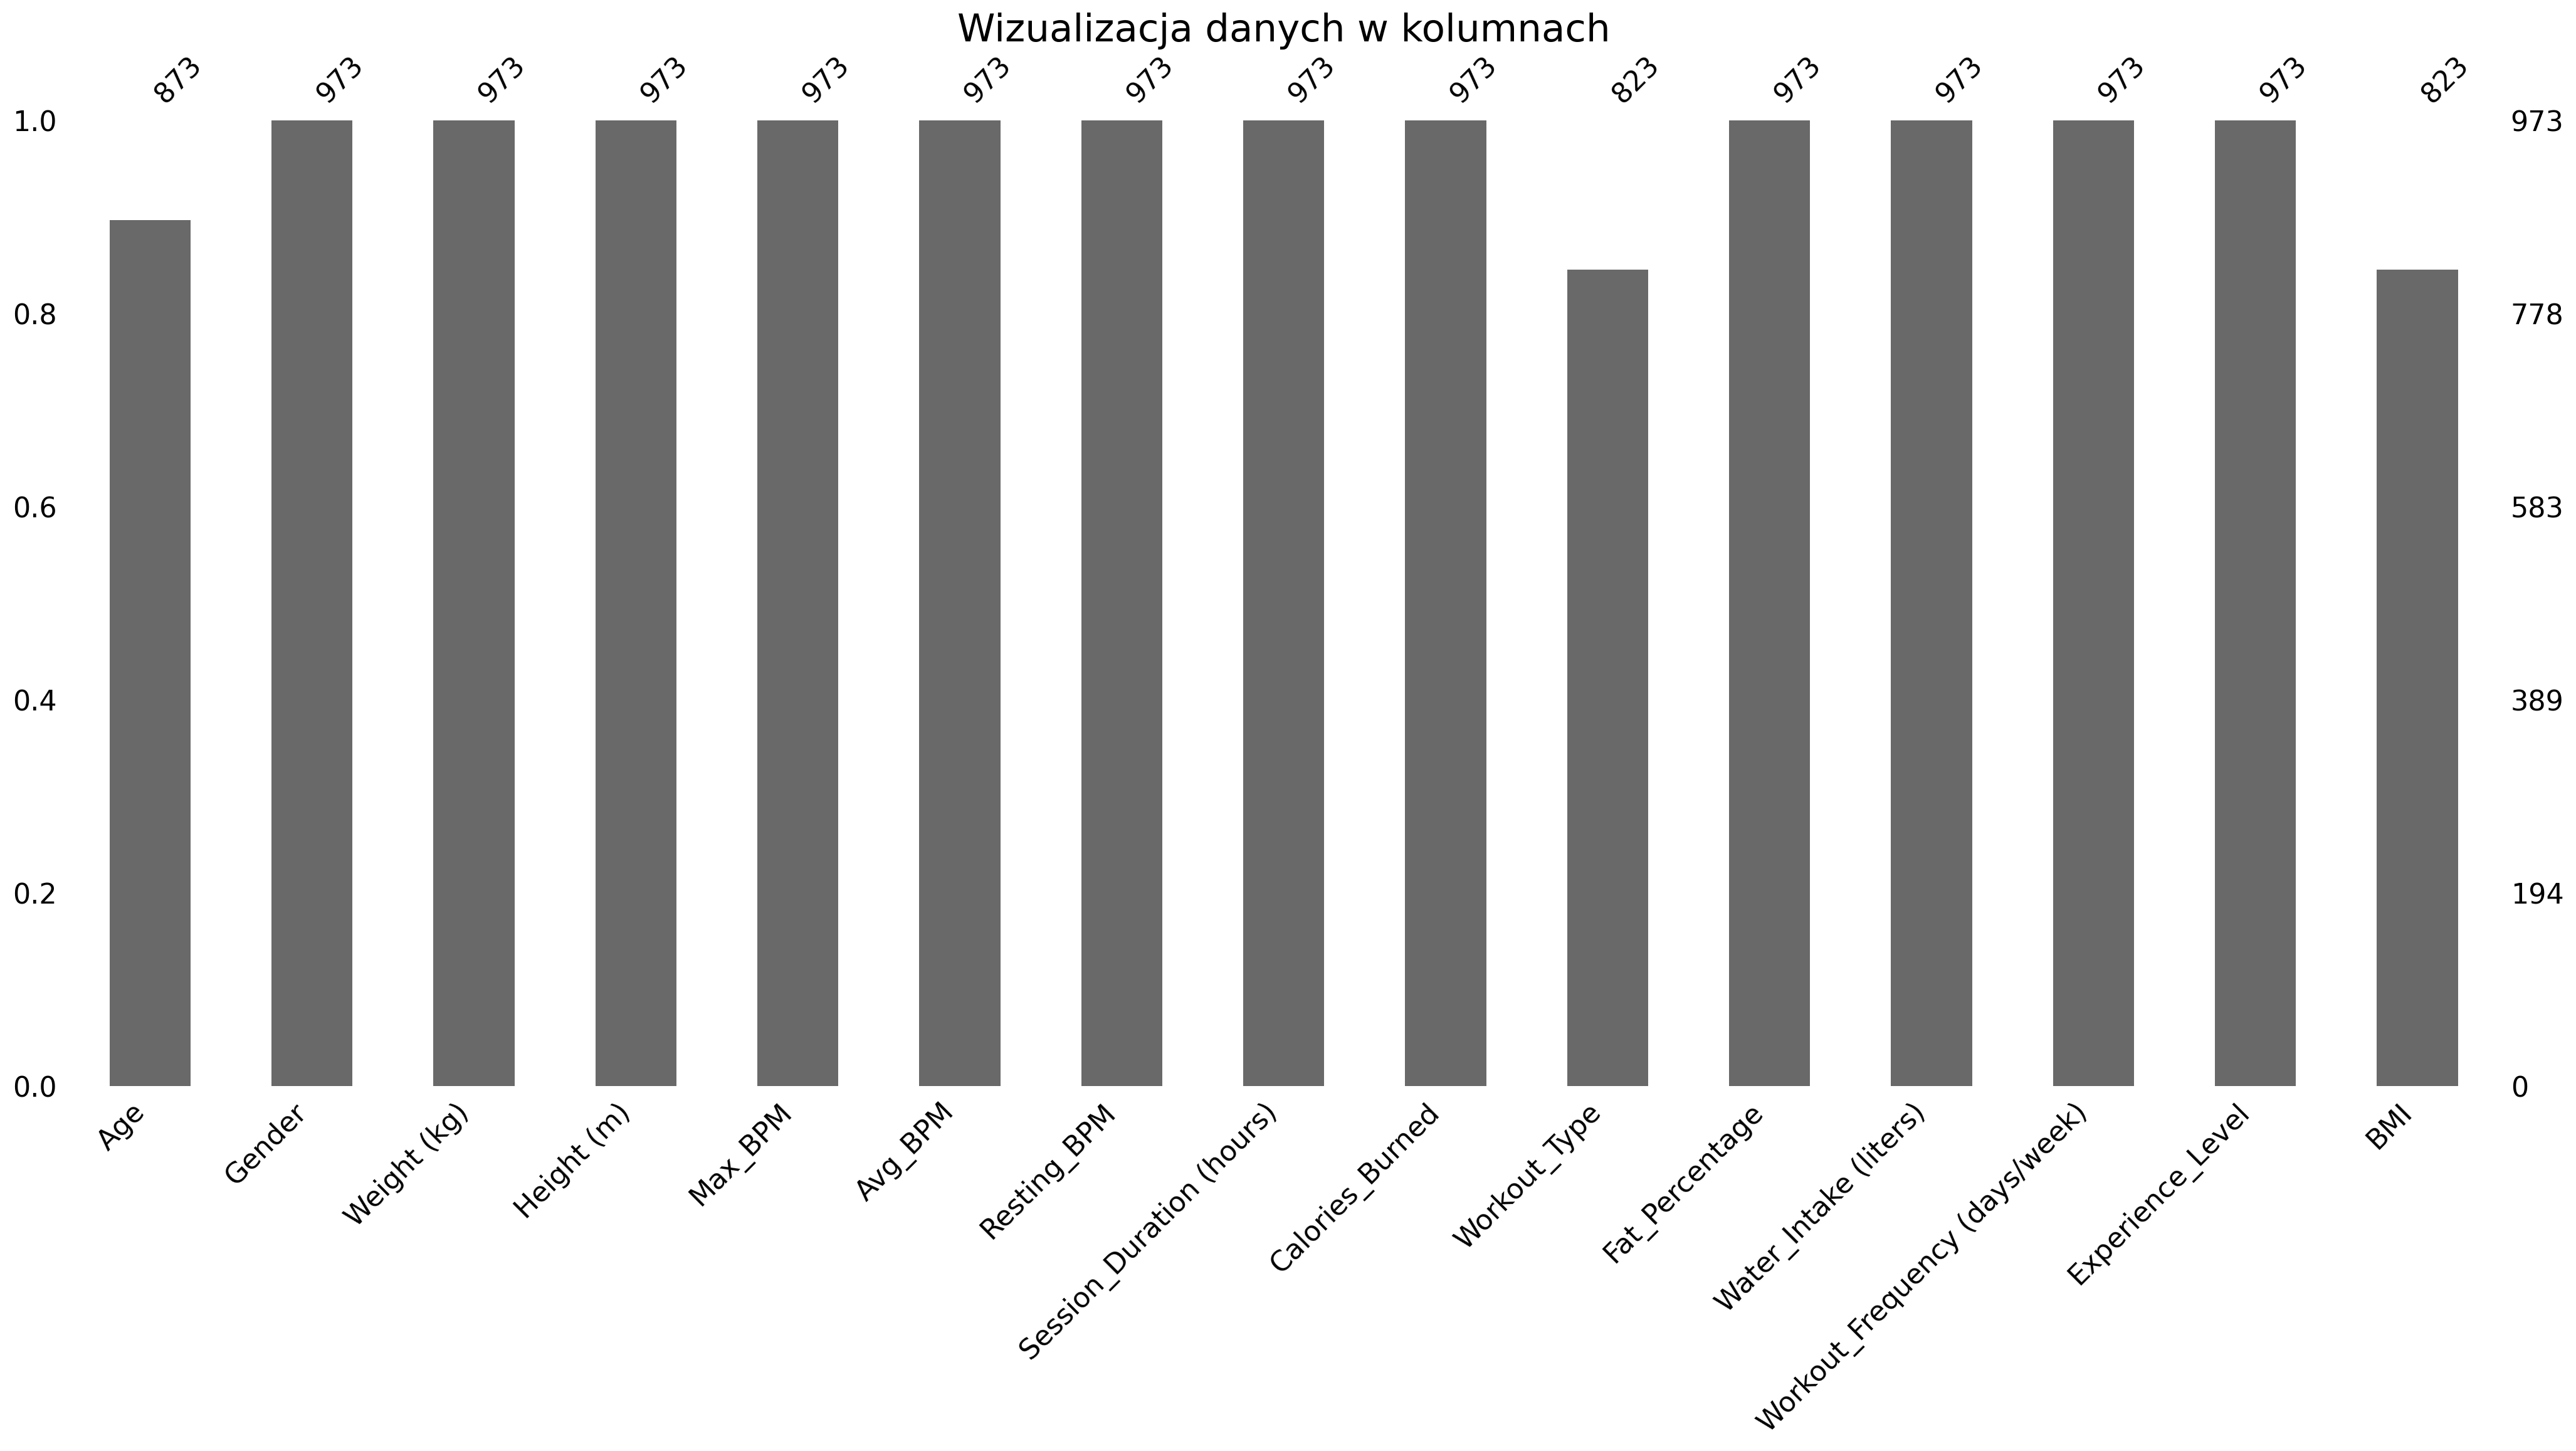

In [18]:

# plt.figure(figsize=(12, 8))
msno.bar(df)
plt.title("Wizualizacja danych w kolumnach", size=22)
plt.show()

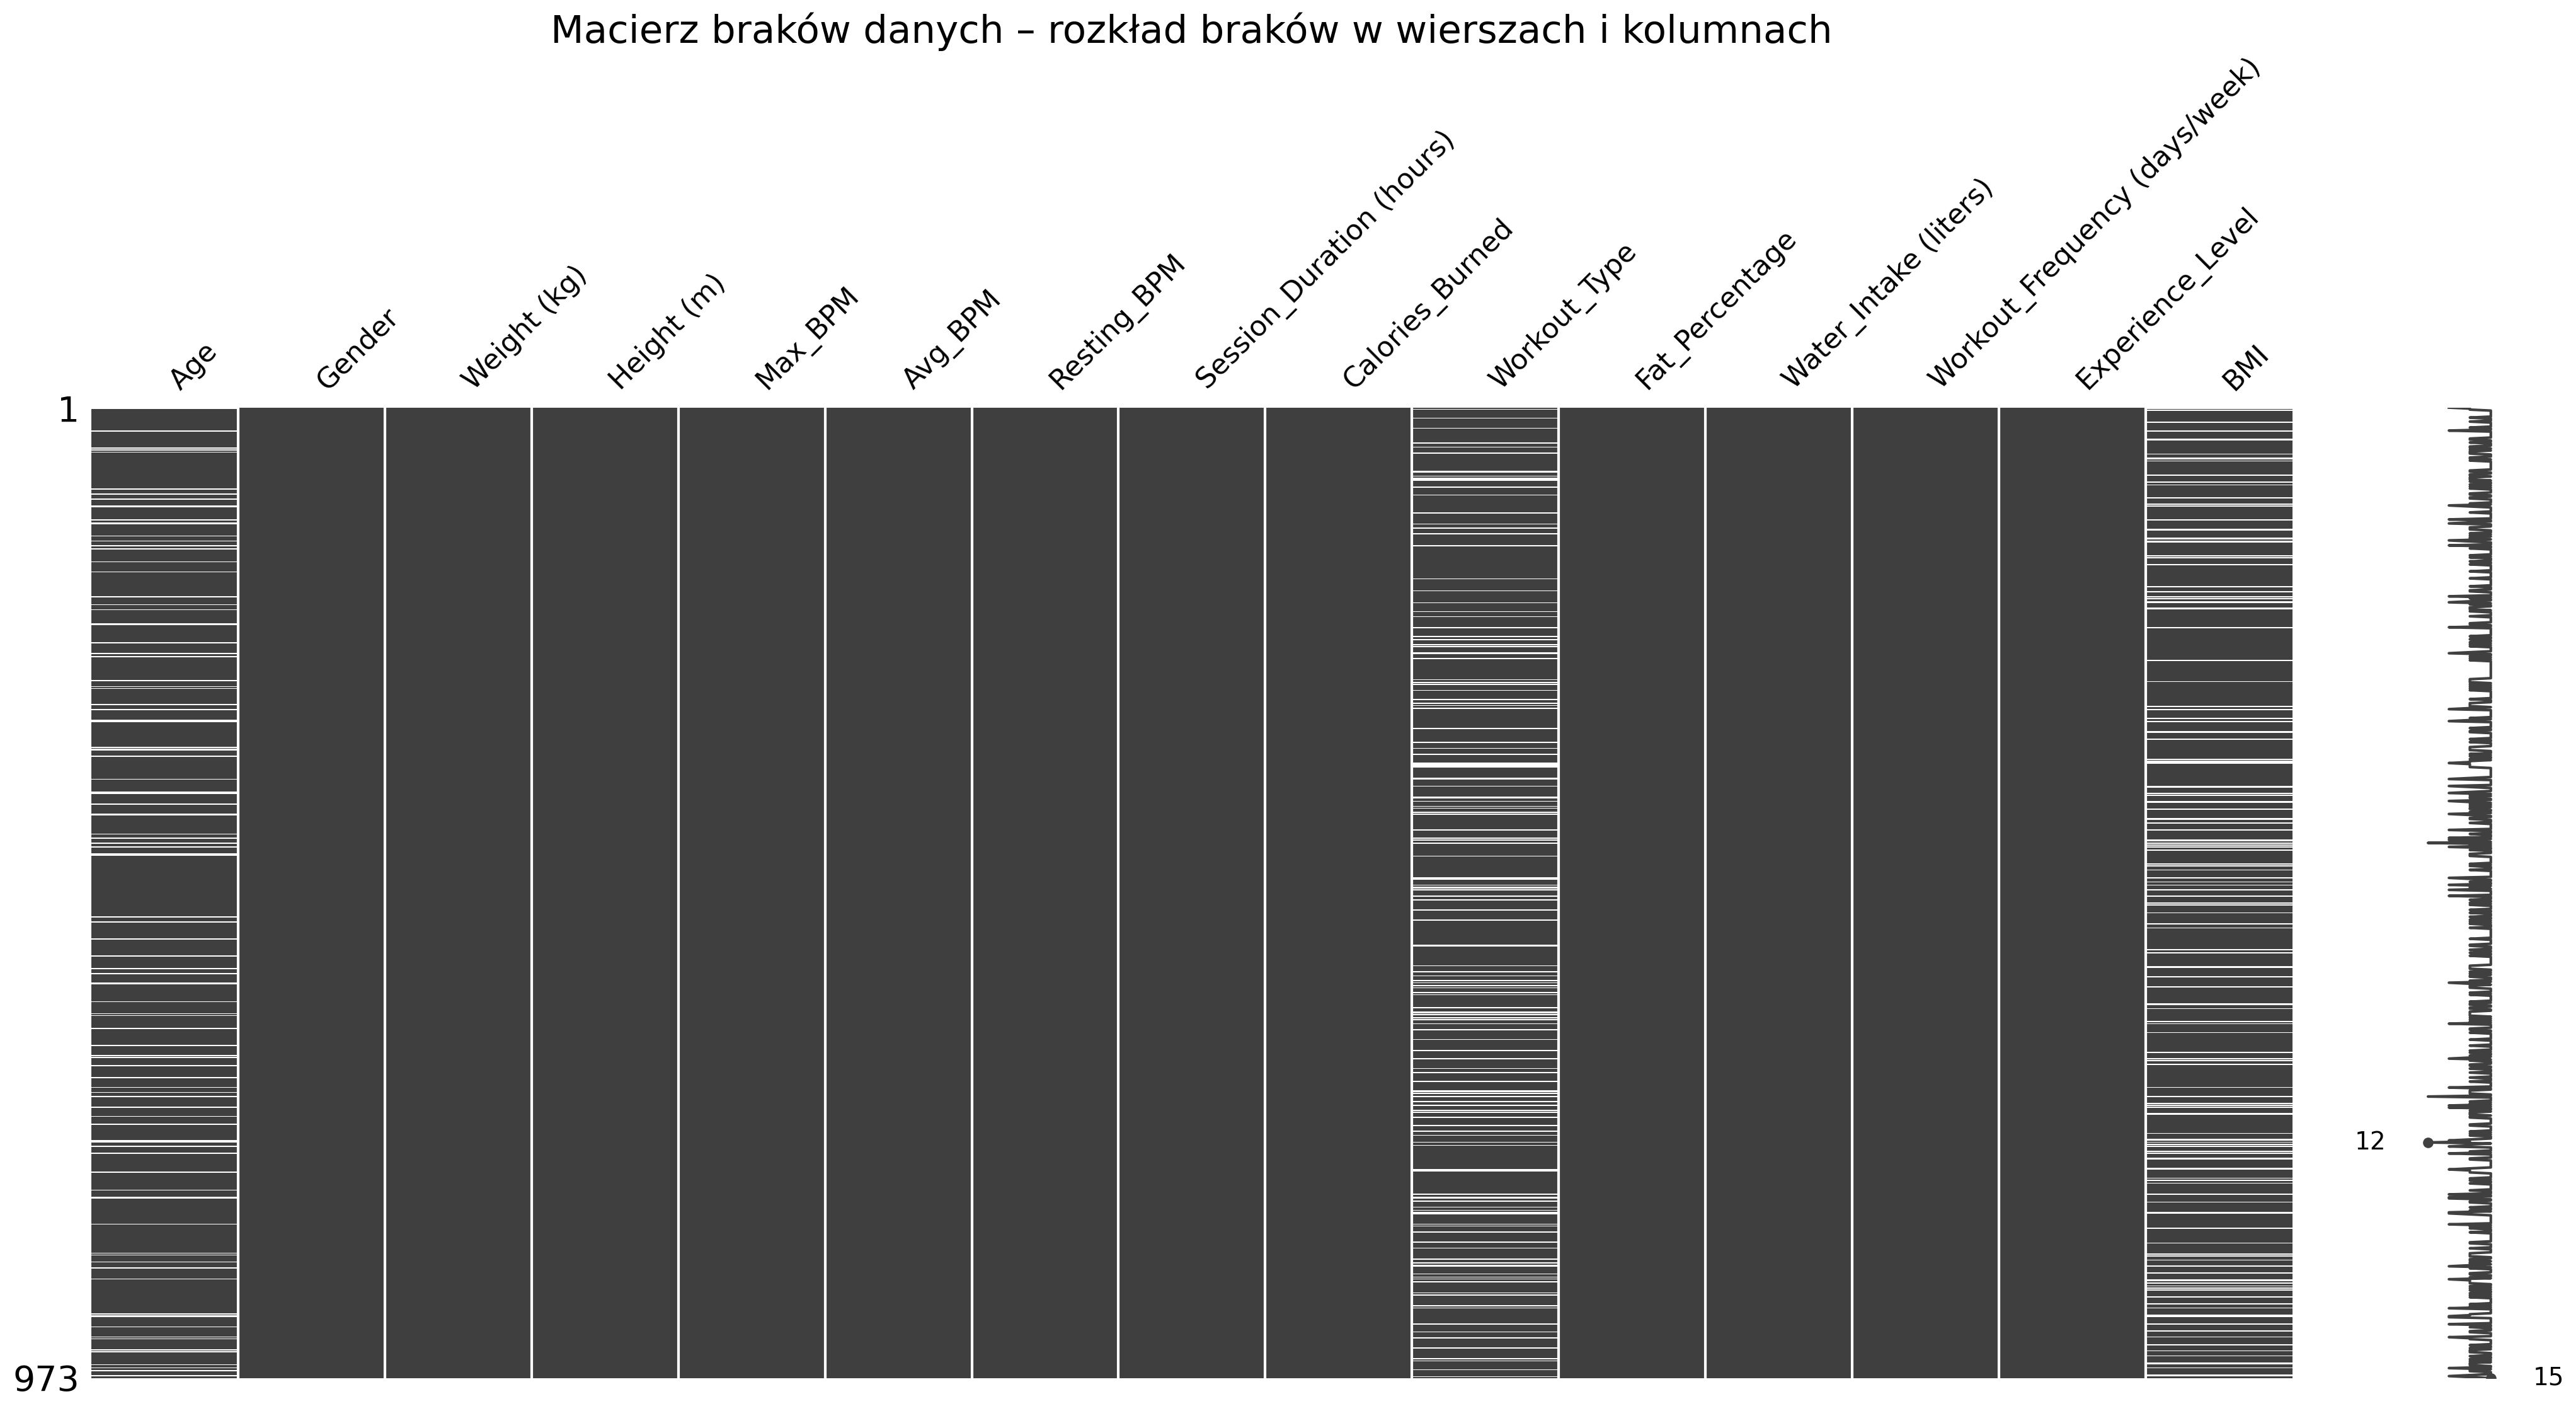

In [19]:
# Rozkład braków na poziomie wierszy
msno.matrix(df)
plt.title('Macierz braków danych – rozkład braków w wierszach i kolumnach', size=22);

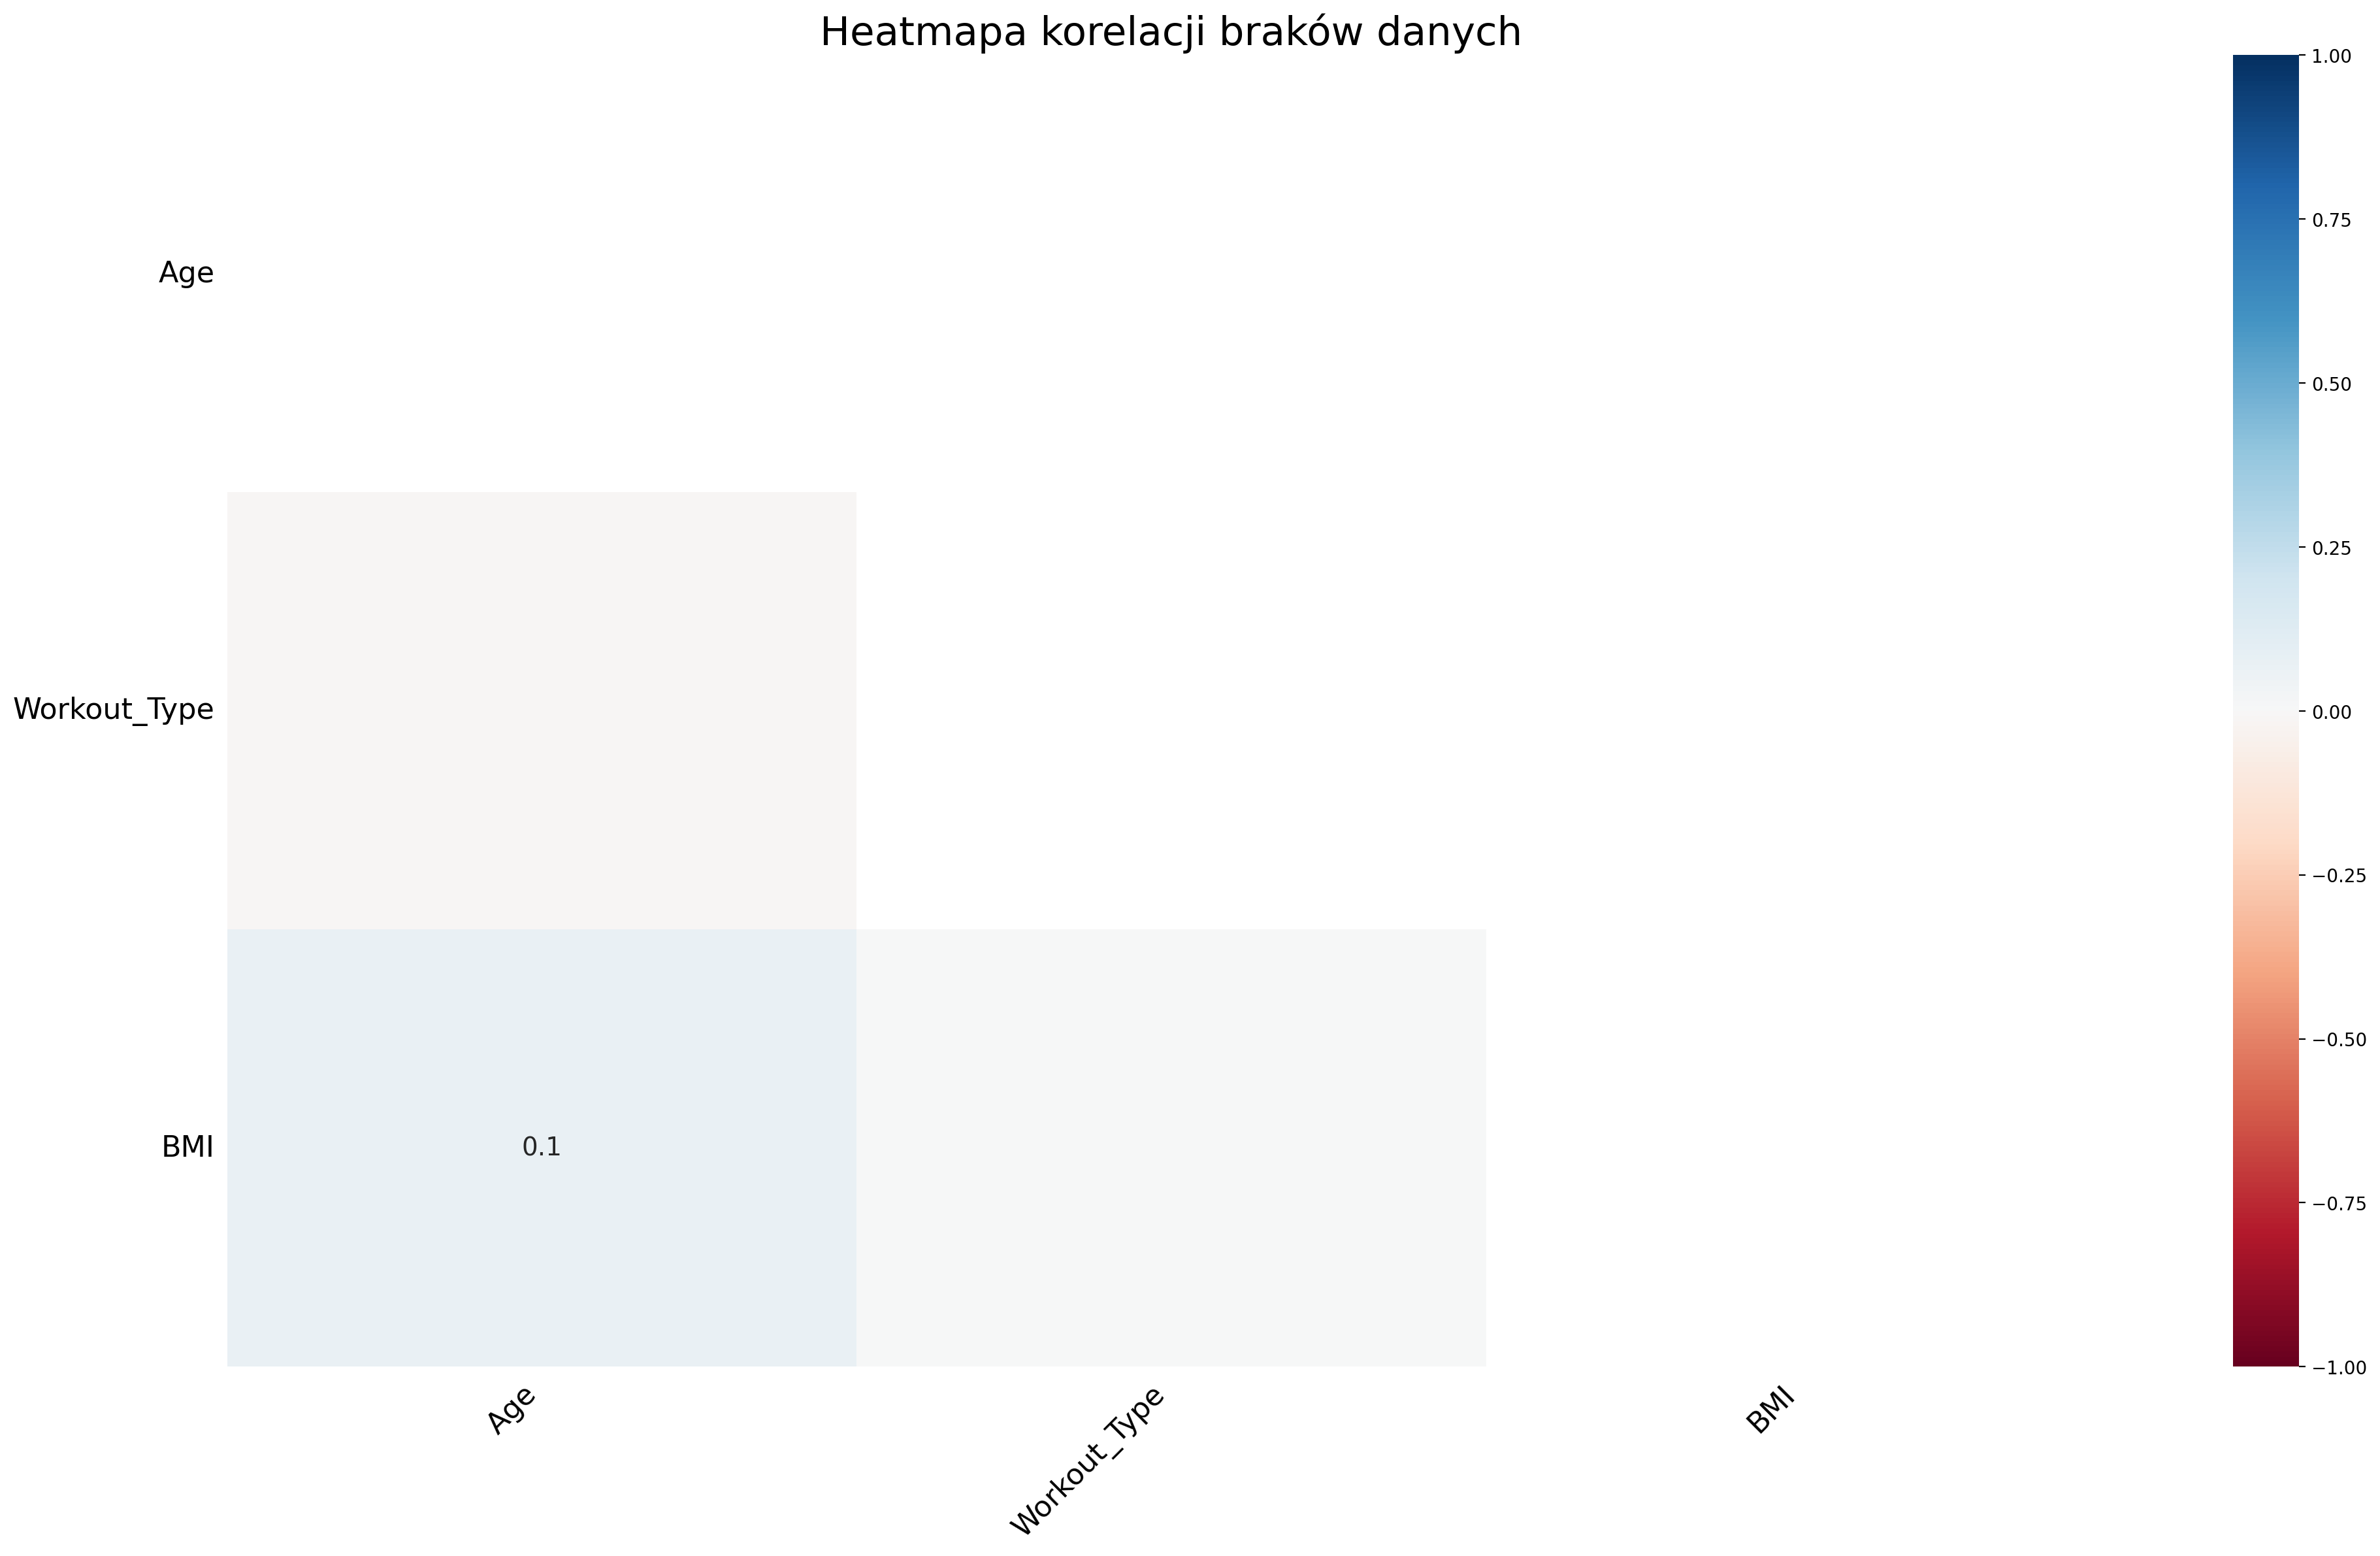

In [20]:
# Mapa korelacji braków
msno.heatmap(df)
plt.title("Heatmapa korelacji braków danych", size=22)
plt.tight_layout()
plt.show()

Tabela korelacji braków:

In [21]:
# Wybieramy tylko kolumny zawierające braki danych
cols_with_nan = df.columns[df.isnull().any()]
df_with_nan = df[cols_with_nan]

# Zamieniamy NaN na 1 (brak) i 0 (brak braków), obliczamy korelację
missing_corr = df_with_nan.isnull().astype(int).corr()

# Wyświetlenie tabeli korelacji braków
print("Tabela korelacji braków między kolumnami:")
print(missing_corr)

Tabela korelacji braków między kolumnami:
                   Age  Workout_Type       BMI
Age           1.000000     -0.013274  0.071080
Workout_Type -0.013274      1.000000  0.006902
BMI           0.071080      0.006902  1.000000


**Słaba dodatnia korelacja braków pomiędzy Age oraz BMI.**
Braki są bardzo słabo skorelowane między kolumnami (wszystkie wartości bliskie zera) co oznacza, że braki w nich są niezależne od siebie.
* wartość dodatnia - braki występują razem
* wartość ujemna - braki nie występują razem

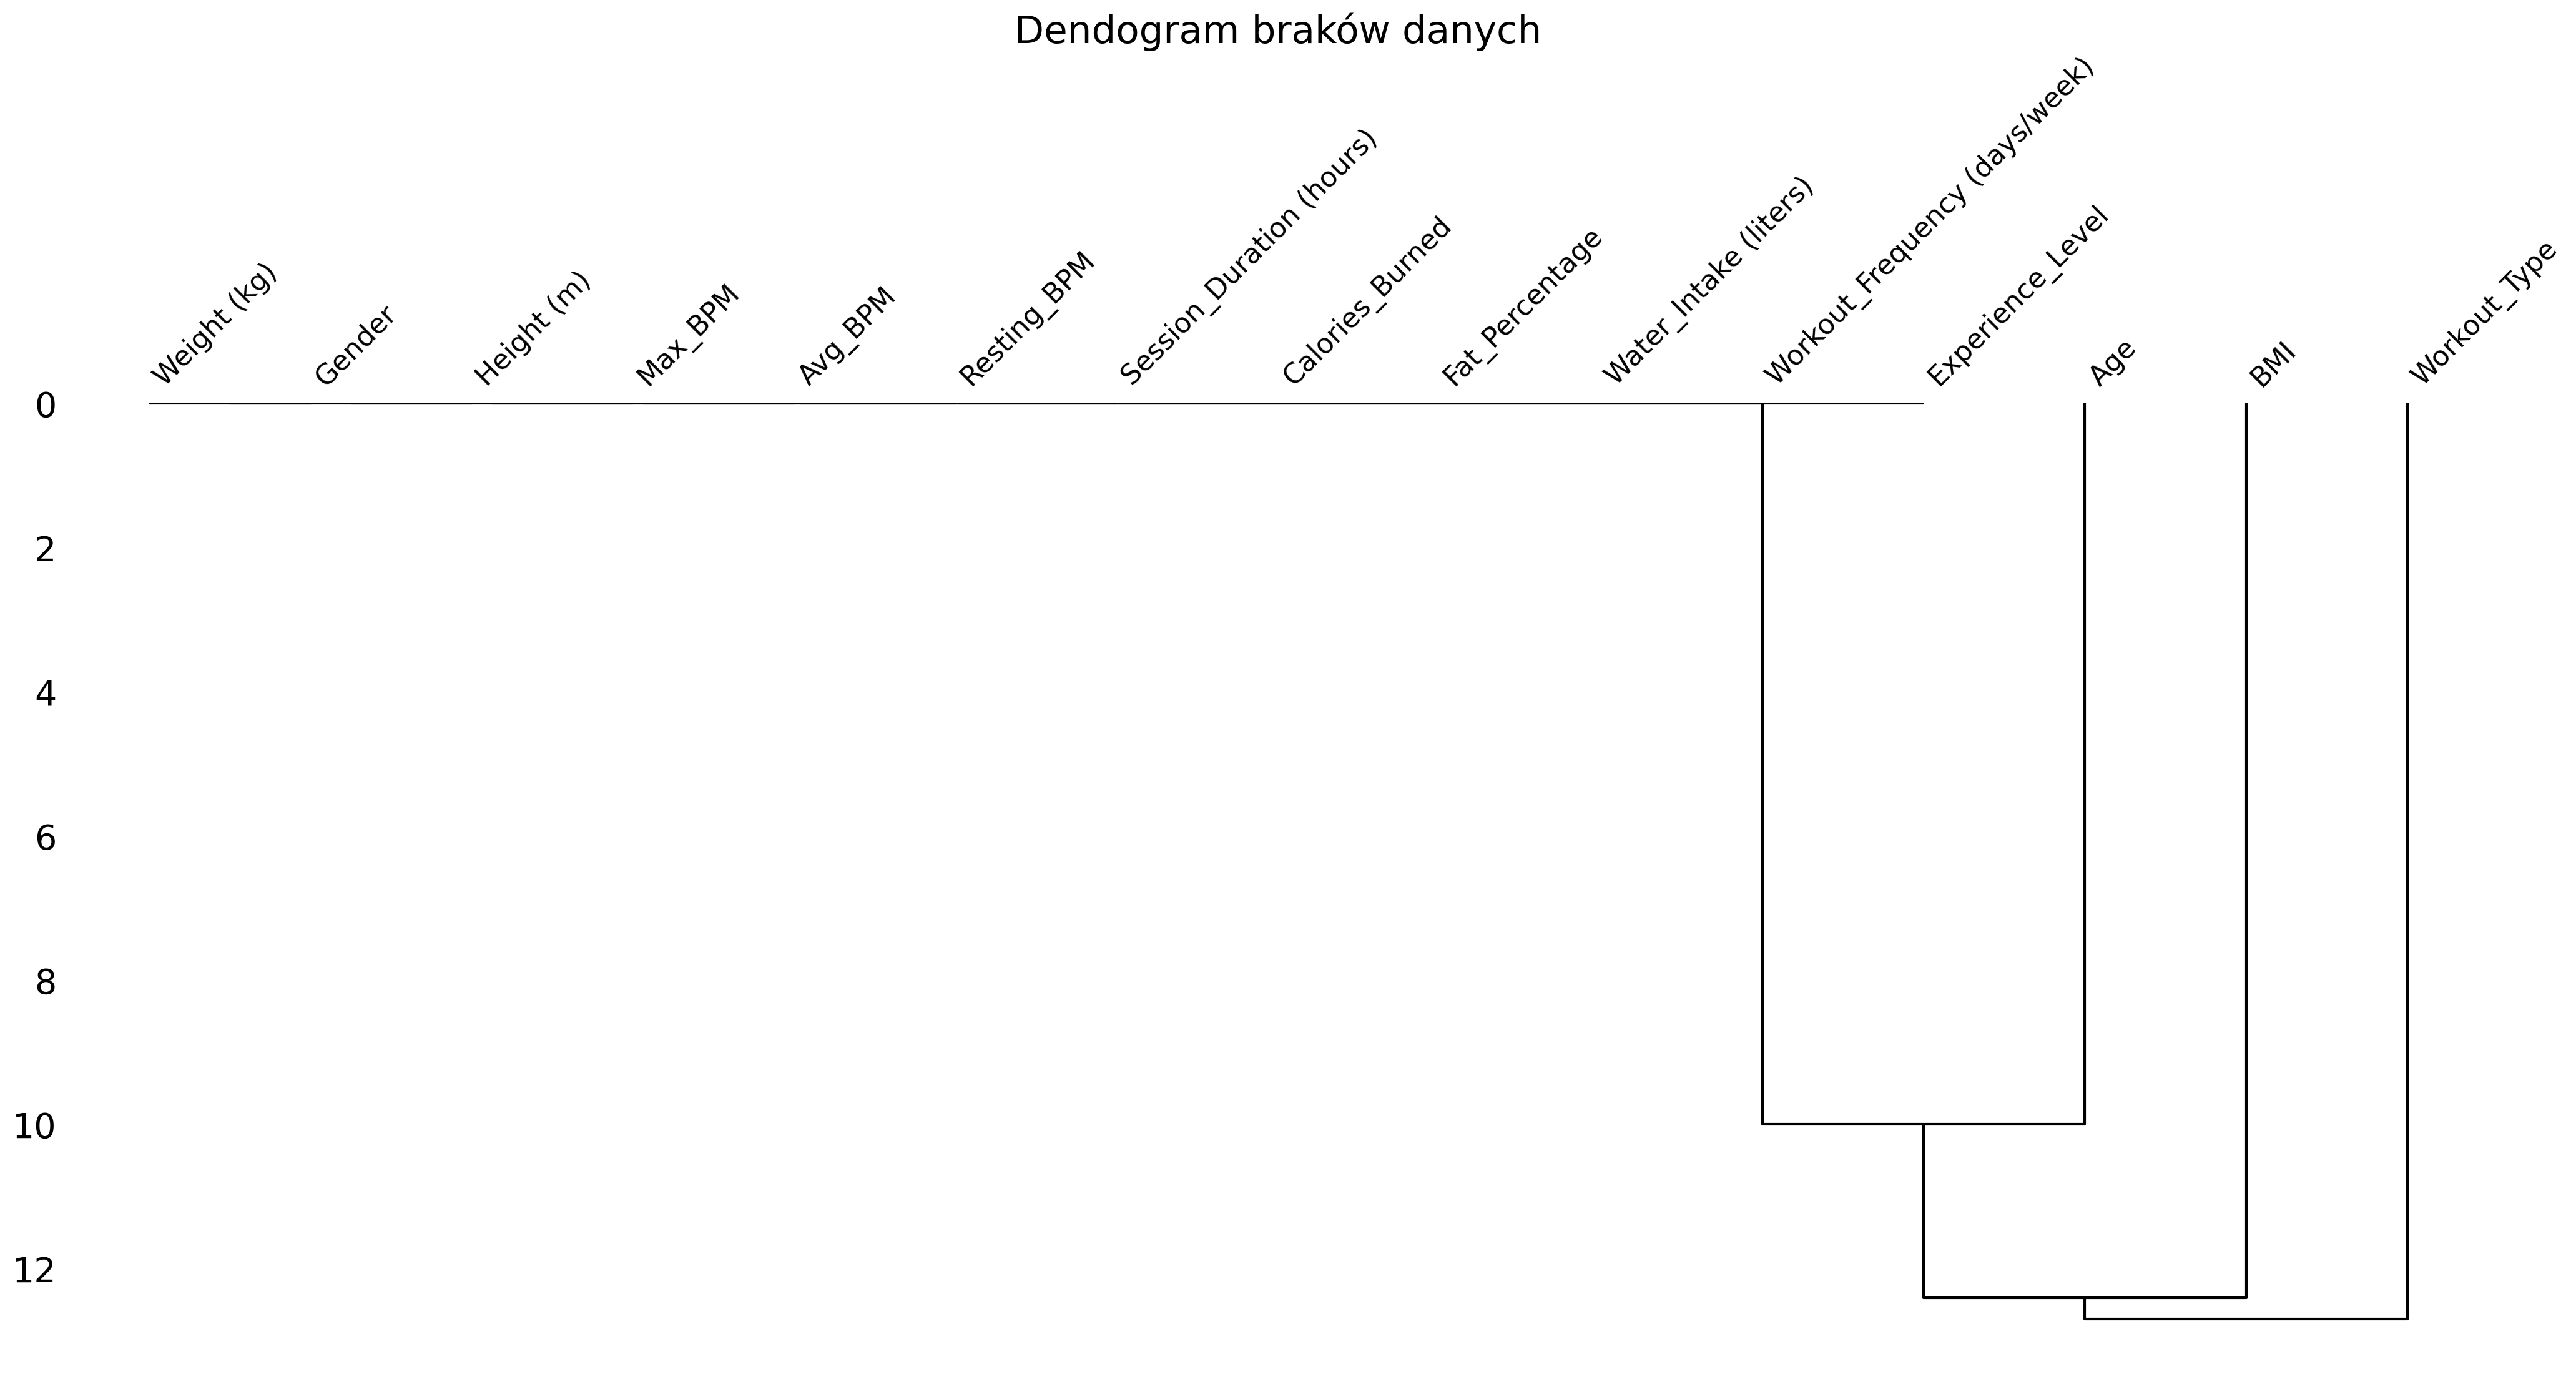

In [22]:
msno.dendrogram(df)
plt.title('Dendogram braków danych', size=22);

Linie łączące kolumny pokazują, **jak podobne są wzorce braków** między nimi.
Im niżej (w pionie) łączą się kolumny, tym bardziej podobne są ich wzorce braków.
**Dystans bliski zeru** oznacza, że kolumny mają identyczny wzorzec braków (w naszym przypadku nie mają braków).
**Age, BMI, Workout_Type** mają zbliżony rozkład braków – często brakuje ich w tych samych wierszach.

### 2.2.2 Podstawowe statystyki opisowe

In [23]:
# Liczba duplikatów
df.duplicated().sum()

np.int64(0)

In [24]:
# statystyki opisowe, rozkłd i liczność danych, describe() domyślnie ignoruje wartości NaN
df.describe()

Age  Weight (kg)  Height (m)     Max_BPM     Avg_BPM  \
count  873.000000   973.000000   973.00000  973.000000  973.000000   
mean    38.626575    73.854676     1.72258  179.883864  143.766701   
std     12.273464    21.207500     0.12772   11.525686   14.345101   
min     18.000000    40.000000     1.50000  160.000000  120.000000   
25%     28.000000    58.100000     1.62000  170.000000  131.000000   
50%     39.000000    70.000000     1.71000  180.000000  143.000000   
75%     50.000000    86.000000     1.80000  190.000000  156.000000   
max     59.000000   129.900000     2.00000  199.000000  169.000000   

       Resting_BPM  Session_Duration (hours)  Calories_Burned  Fat_Percentage  \
count   973.000000                973.000000       973.000000      973.000000   
mean     62.223022                  1.256423       905.422405       24.976773   
std       7.327060                  0.343033       272.641516        6.259419   
min      50.000000                  0.500000       303.000000       10.000000   
25%      56.000000                  1.040000       720.000000       21.300000   
50%      62.000000                  1.260000       893.000000       26.200000   
75%      68.000000                  1.460000      1076.000000       29.300000   
max      74.000000                  2.000000      1783.000000       35.000000   

       Water_Intake (liters)  Workout_Frequency (days/week)  Experience_Level  \
count             973.000000                     973.000000        973.000000   
mean                2.626619                       3.321686          1.809866   
std                 0.600172                       0.913047          0.739693   
min                 1.500000                       2.000000          1.000000   
25%                 2.200000                       3.000000          1.000000   
50%                 2.600000                       3.000000          2.000000   
75%                 3.100000                       4.000000          2.000000   
max                 3.700000                       5.000000          3.000000   

              BMI  
count  823.000000  
mean    24.816549  
std      6.600485  
min     12.320000  
25%     20.105000  
50%     23.940000  
75%     28.450000  
max     47.720000

Tabela z zakresem wartości (min–max) i oceną, czy są one naturalne i czy mogą zawierać outliery.

| Kolumna                 | Zakres (min–max) | Uwagi                            |
| ----------------------- | ---------------- | -------------------------------- |
| `Age`                   | 18 – 59          | ✅ Naturalny zakres               |
| `Weight (kg)`           | 40 – 130         | ✅ **Ok, możliwe outliery po 120 kg** |
| `Height (m)`            | 1.5 – 2.0 m      | ✅ Realistyczny zakres            |
| `Max_BPM`               | 160 – 199        | ✅ Maksymalne tętno               |
| `Avg_BPM`               | 120 – 169        | ✅ Wysiłkowe                      |
| `Resting_BPM`           | 50 – 74          | ✅ Spoczynkowe                    |
| `Session_Duration (h)`  | 0.5 – 2.0        | ✅ Logiczne                       |
| `Calories_Burned`       | 303 – 1783       | ✅ Różnorodne, ale wiarygodne     |
| `Fat_Percentage`        | 10 – 35%         | ✅ Ok                             |
| `Water_Intake (liters)` | 1.5 – 3.7        | ✅ Realne                         |
| `Workout_Frequency`     | 2 – 5 dni/tyg.   | ✅ Typowe                         |
| `Experience_Level`      | 1 – 3            | ✅ Skale kategoryczne             |
| `BMI`                   | 12.32 – 47.72    | ✅ Skrajne wartości, ale realne   |

Outliery mogą występować zarówno po stronie zbyt wysokich, jak i zbyt niskich wartości. 

| Kolumna            | Podejrzane dolne outliery | Komentarz                                                                          |
| ------------------ | ------------------------- | ---------------------------------------------------------------------------------- |
| `Weight (kg)`      | < 45 kg                   | Możliwe u osoby dorosłej tylko w wyjątkowych przypadkach (np. niedowaga kliniczna) |
| `Height (m)`       | < 1.55 m                  | Bardzo niski wzrost u dorosłego                                                    |
| `Session_Duration` | = 0.5 h                   | Możliwe, ale warto sprawdzić – czy to nie "niedopisane"                            |
| `Calories_Burned`  | < 350 kcal                | Niska wartość przy sesji sportowej – możliwe, ale warto zbadać                     |
| `BMI`              | < 15                      | Może wskazywać na zaburzenia żywieniowe lub błędny pomiar                          |

Dolne outliery mogą:
* **zaniżać średnią i fałszować imputację**, np. BMI uzupełnione średnią na poziomie 18,5 mimo że grupa ma zwykle 23
* Są często efektem **błędów w danych wejściowych**: np. brak przecinka

### 2.2.3 Analiza rozkładu i wartości odstających cech liczbowych z podziałem na płeć

In [25]:

# Sprawdzenie unikalnych wartosci w kolumnach 'Gender', 'Workout_Type' by upewnić się, czy nie ma np. literówek.
df['Gender'].unique(), df['Workout_Type'].unique()

(array(['Male', 'Female'], dtype=object),
 array(['Yoga', nan, 'Cardio', 'Strength', 'HIIT'], dtype=object))

#### 2.2.3.1 Liczebność osób według płci

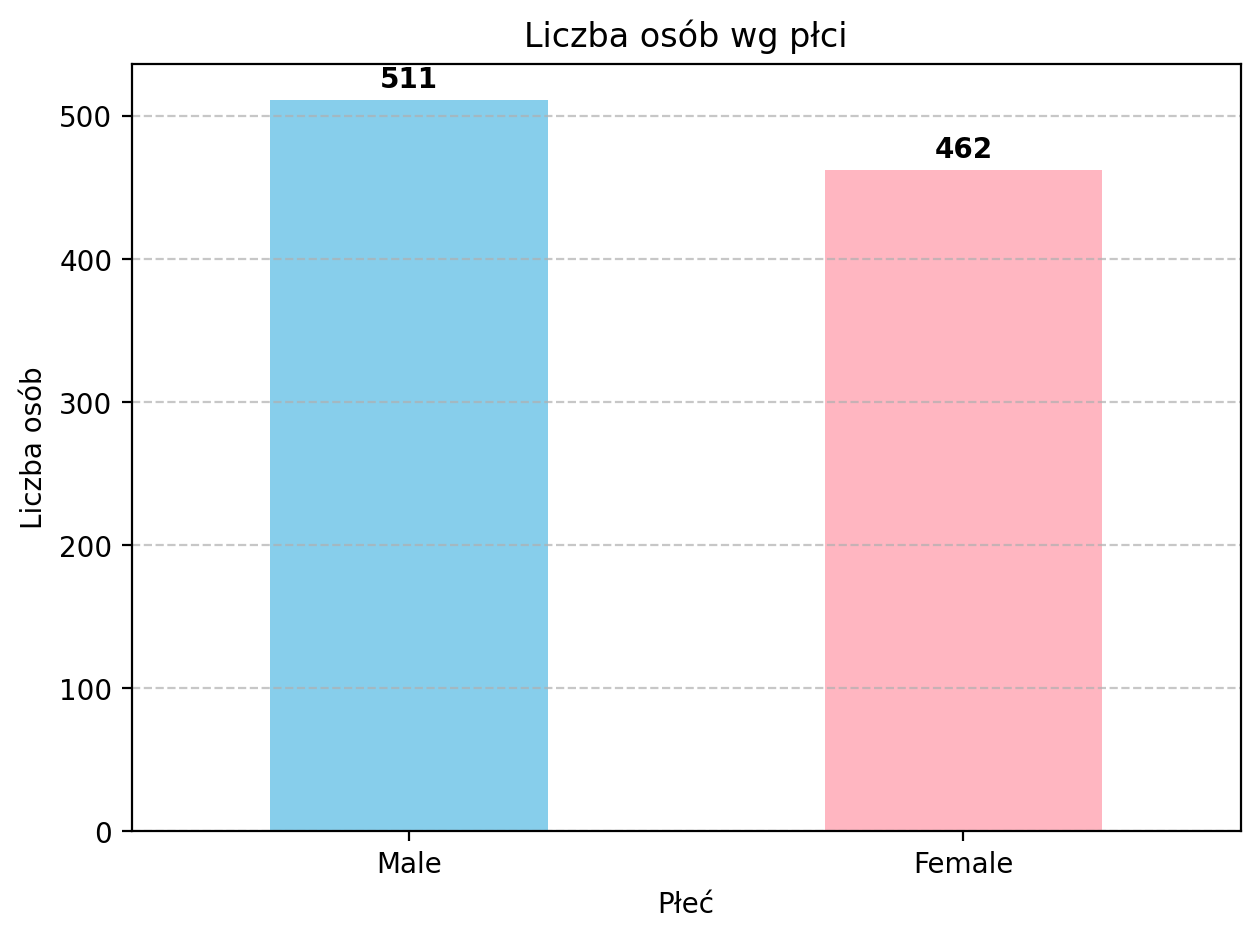

In [26]:
# import matplotlib.pyplot as plt

# Liczenie liczby osób wg płci
gender_counts = df['Gender'].value_counts()

# Tworzenie wykresu słupkowego
ax = gender_counts.plot(kind='bar', color=['skyblue', 'lightpink'])

# Dodanie tytułu i etykiet
plt.title("Liczba osób wg płci")
plt.ylabel("Liczba osób")
plt.xlabel("Płeć")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Dodanie wartości liczbowych nad słupkami
for i, value in enumerate(gender_counts):
    plt.text(i, value + 5, str(value), ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

#### 2.2.3.2 Histogramy rozkładów cech wg płci

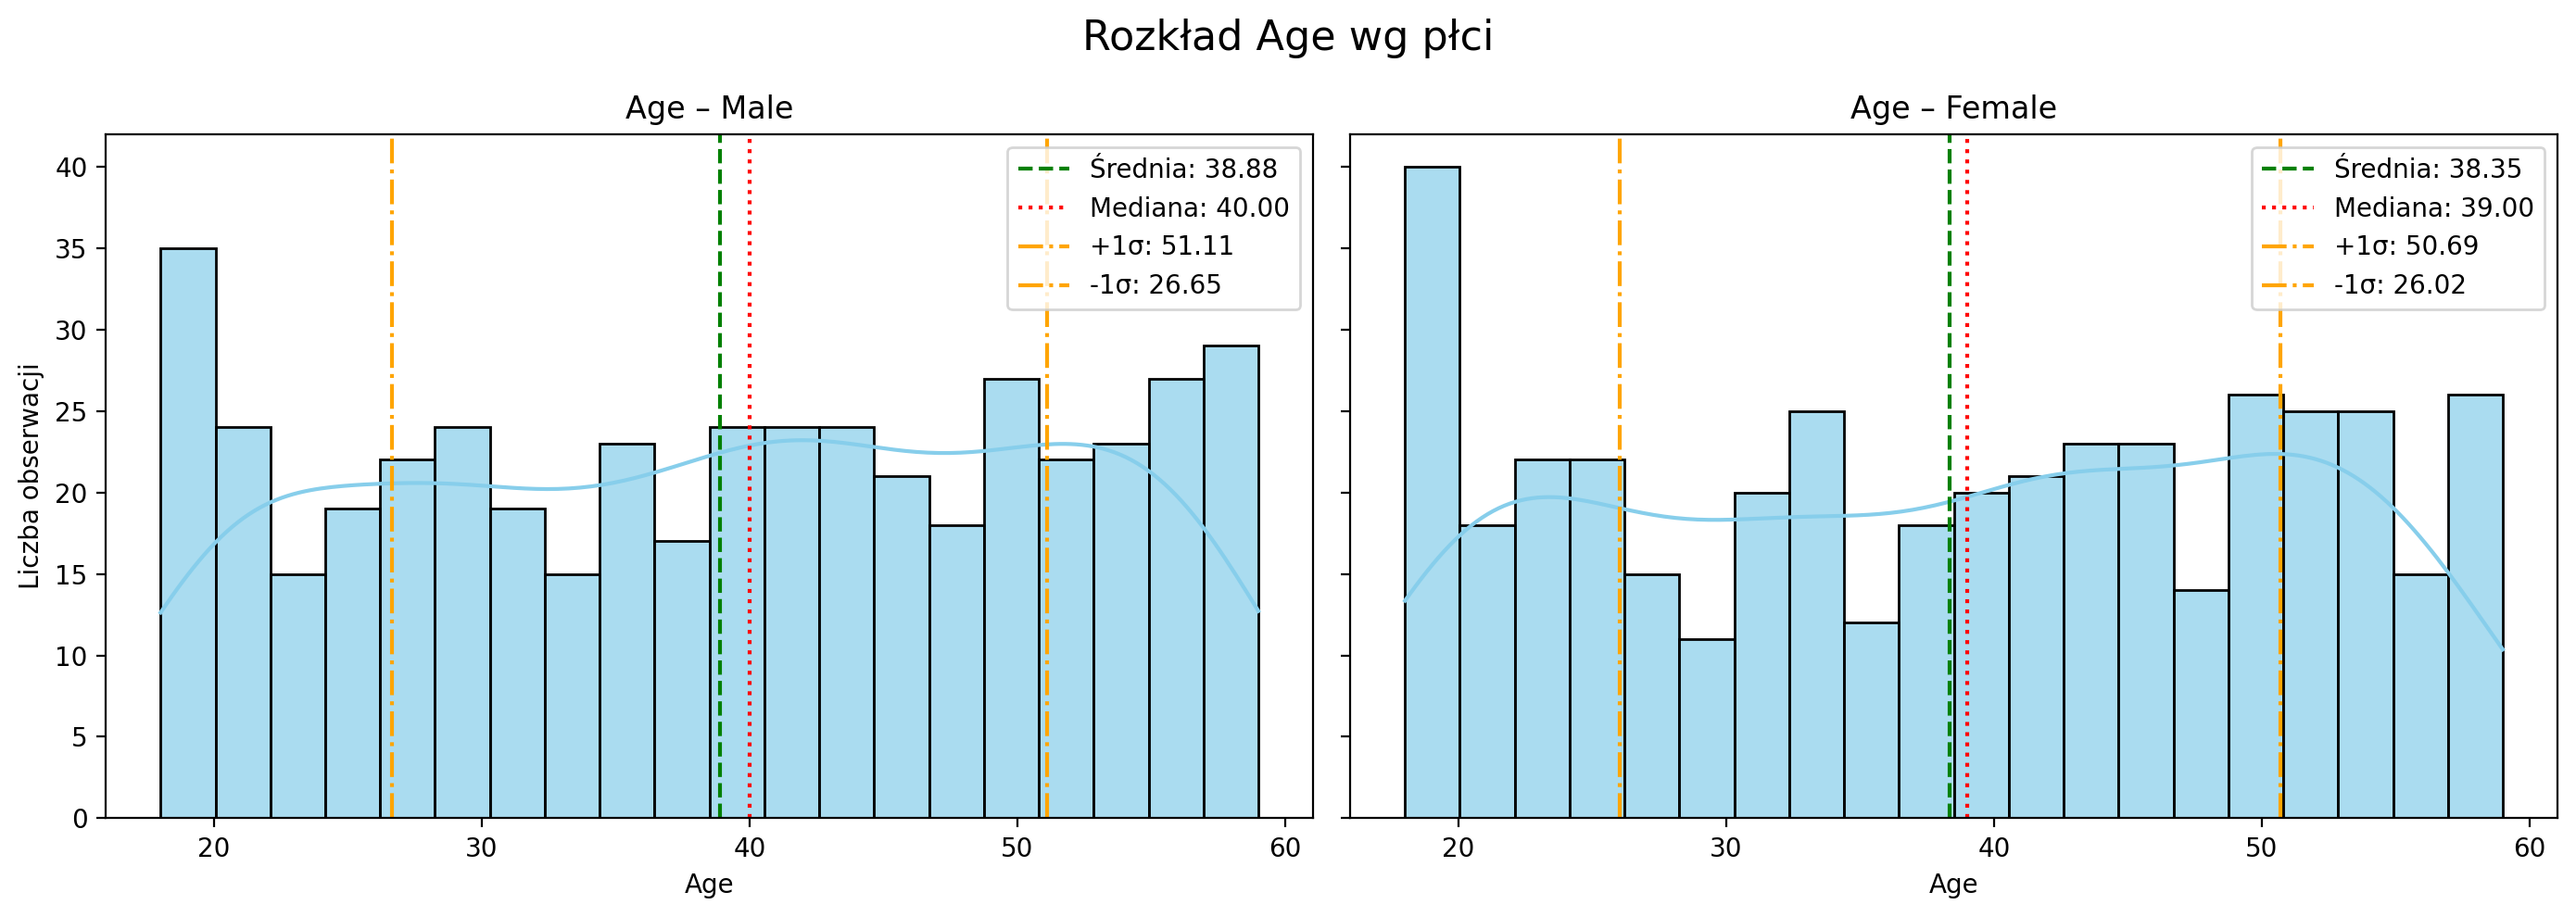

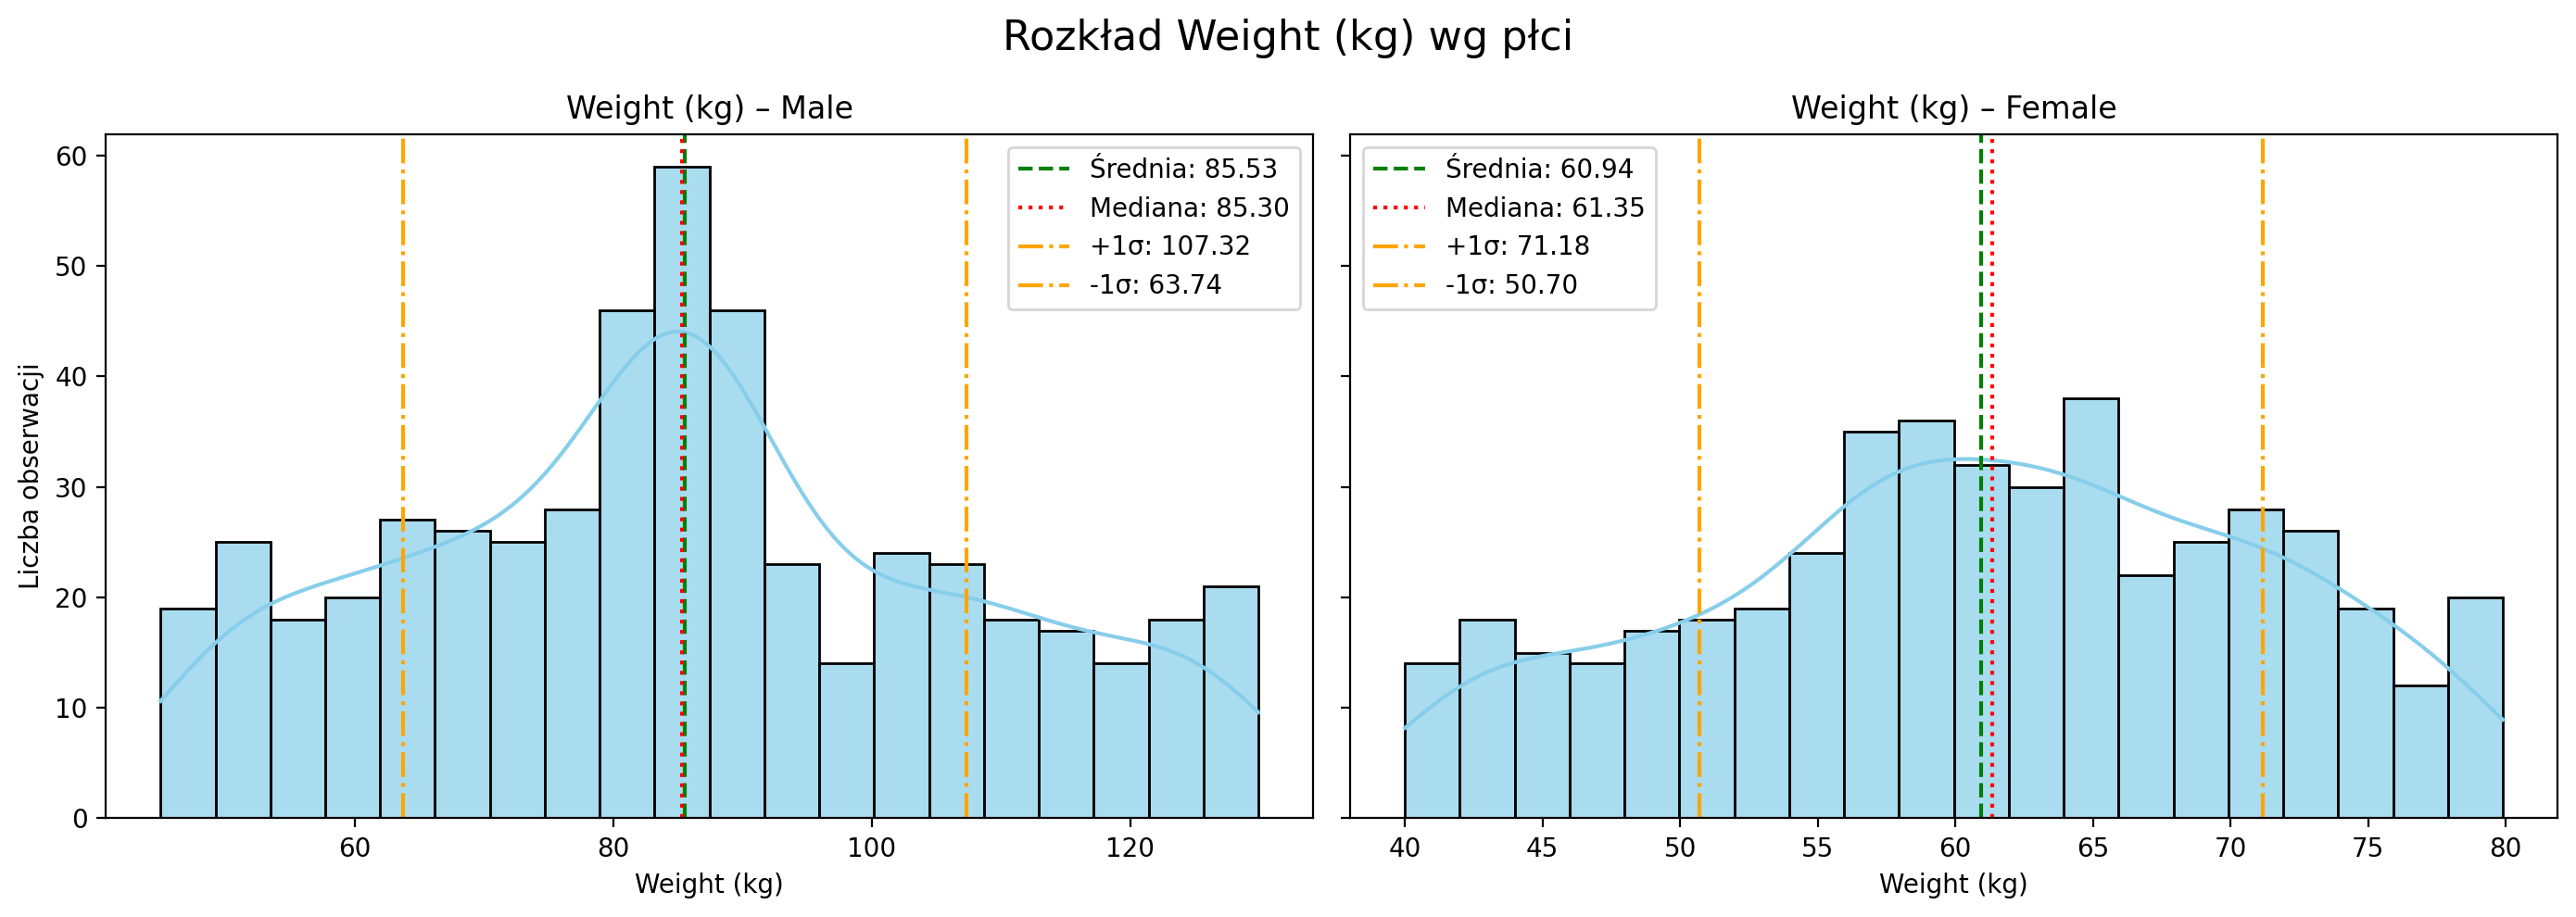

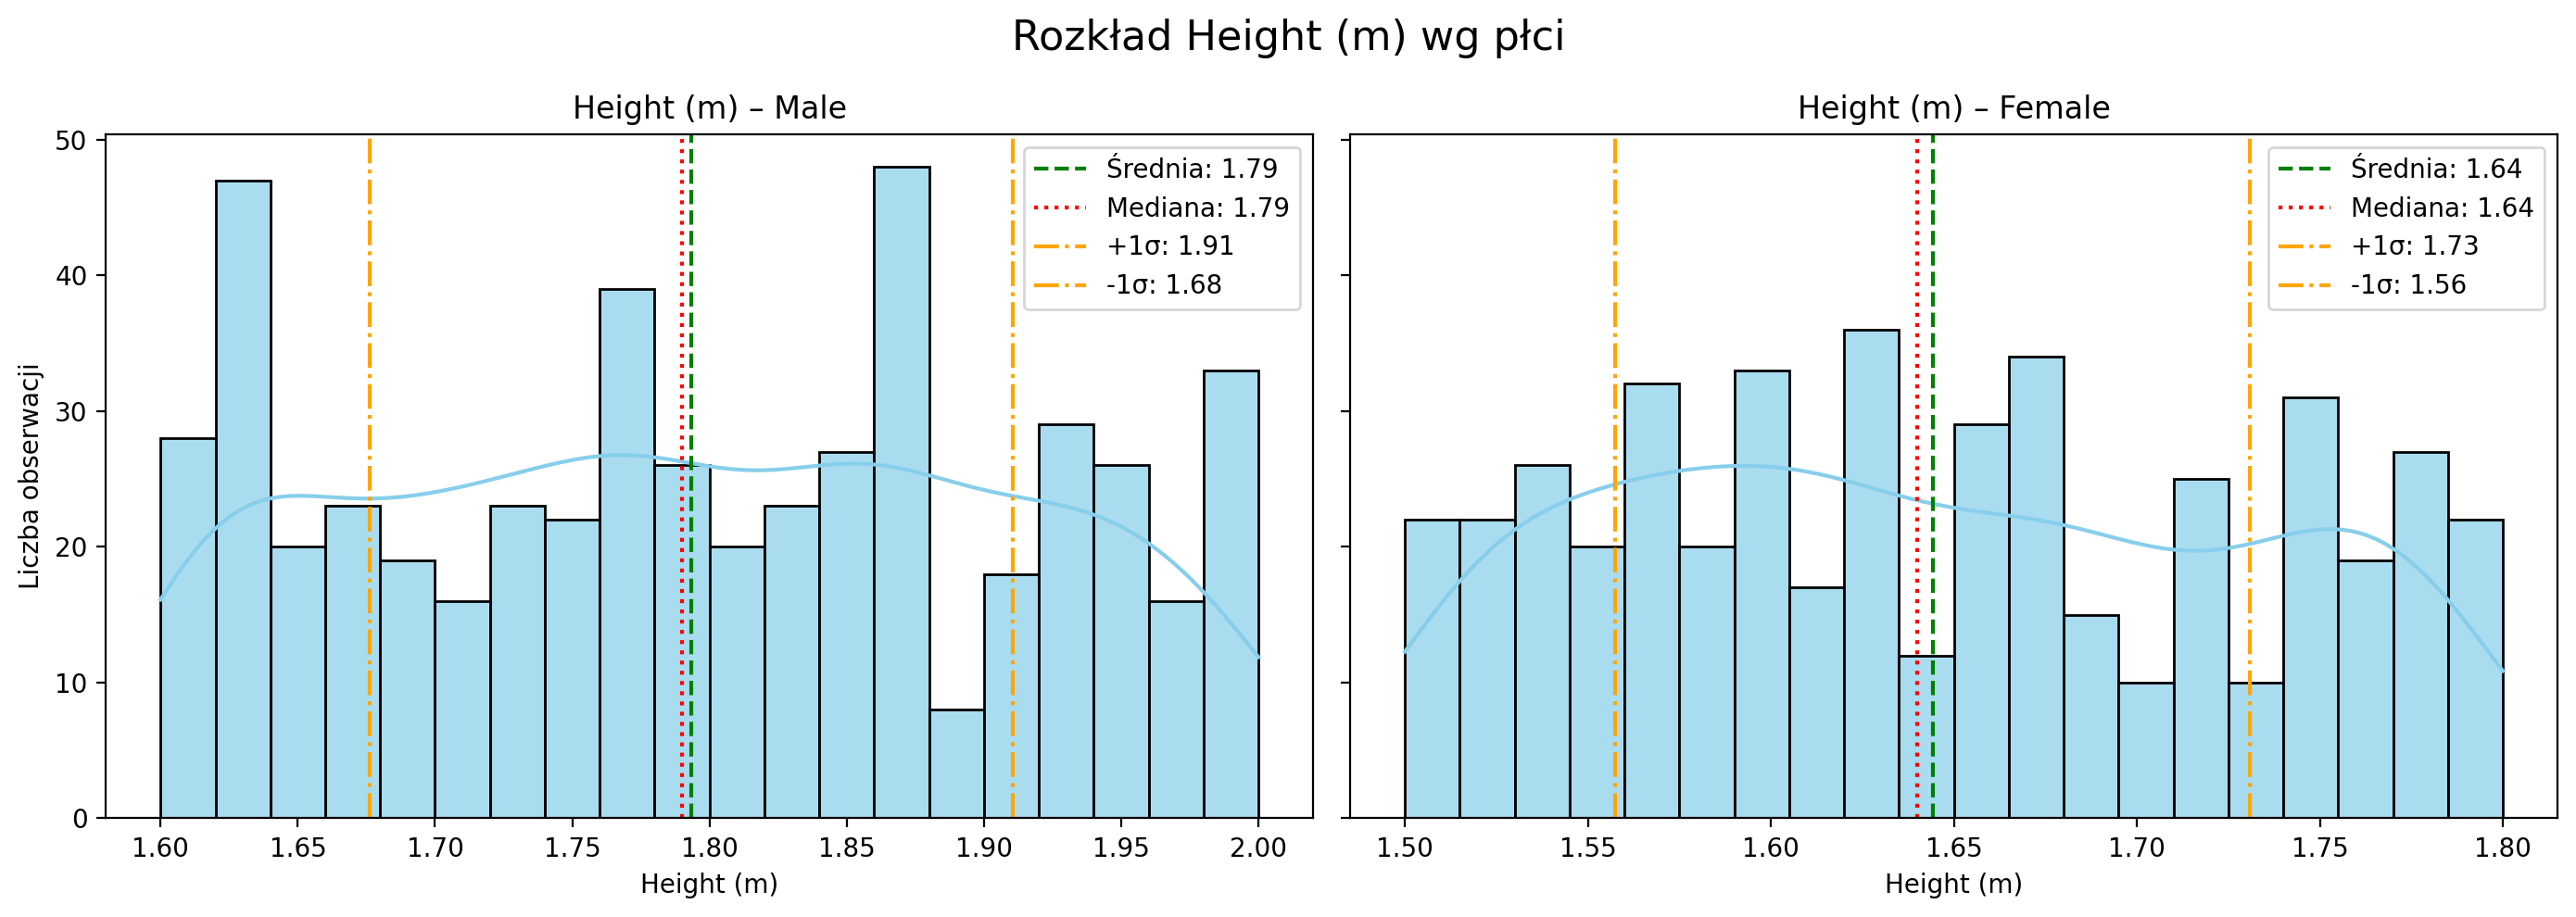

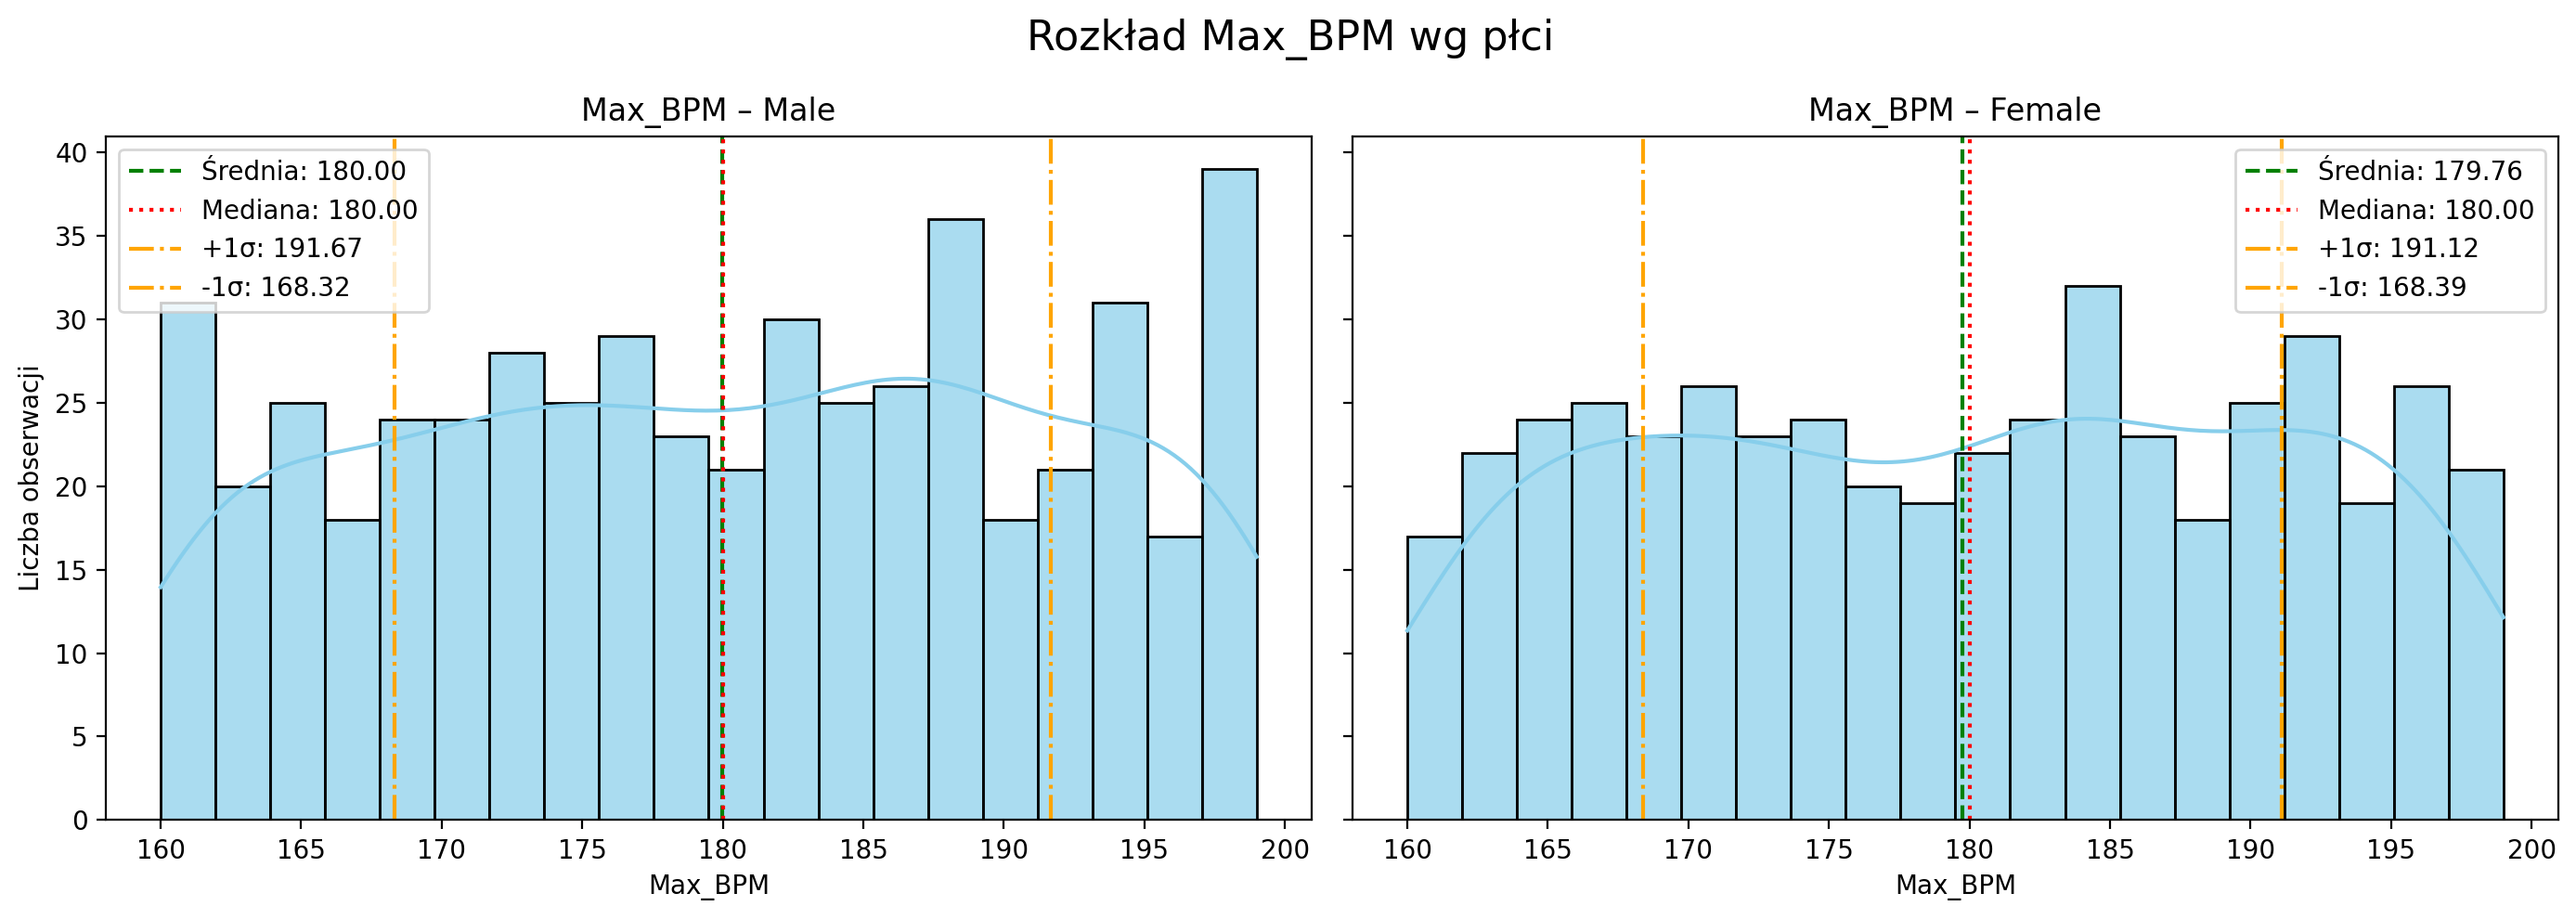

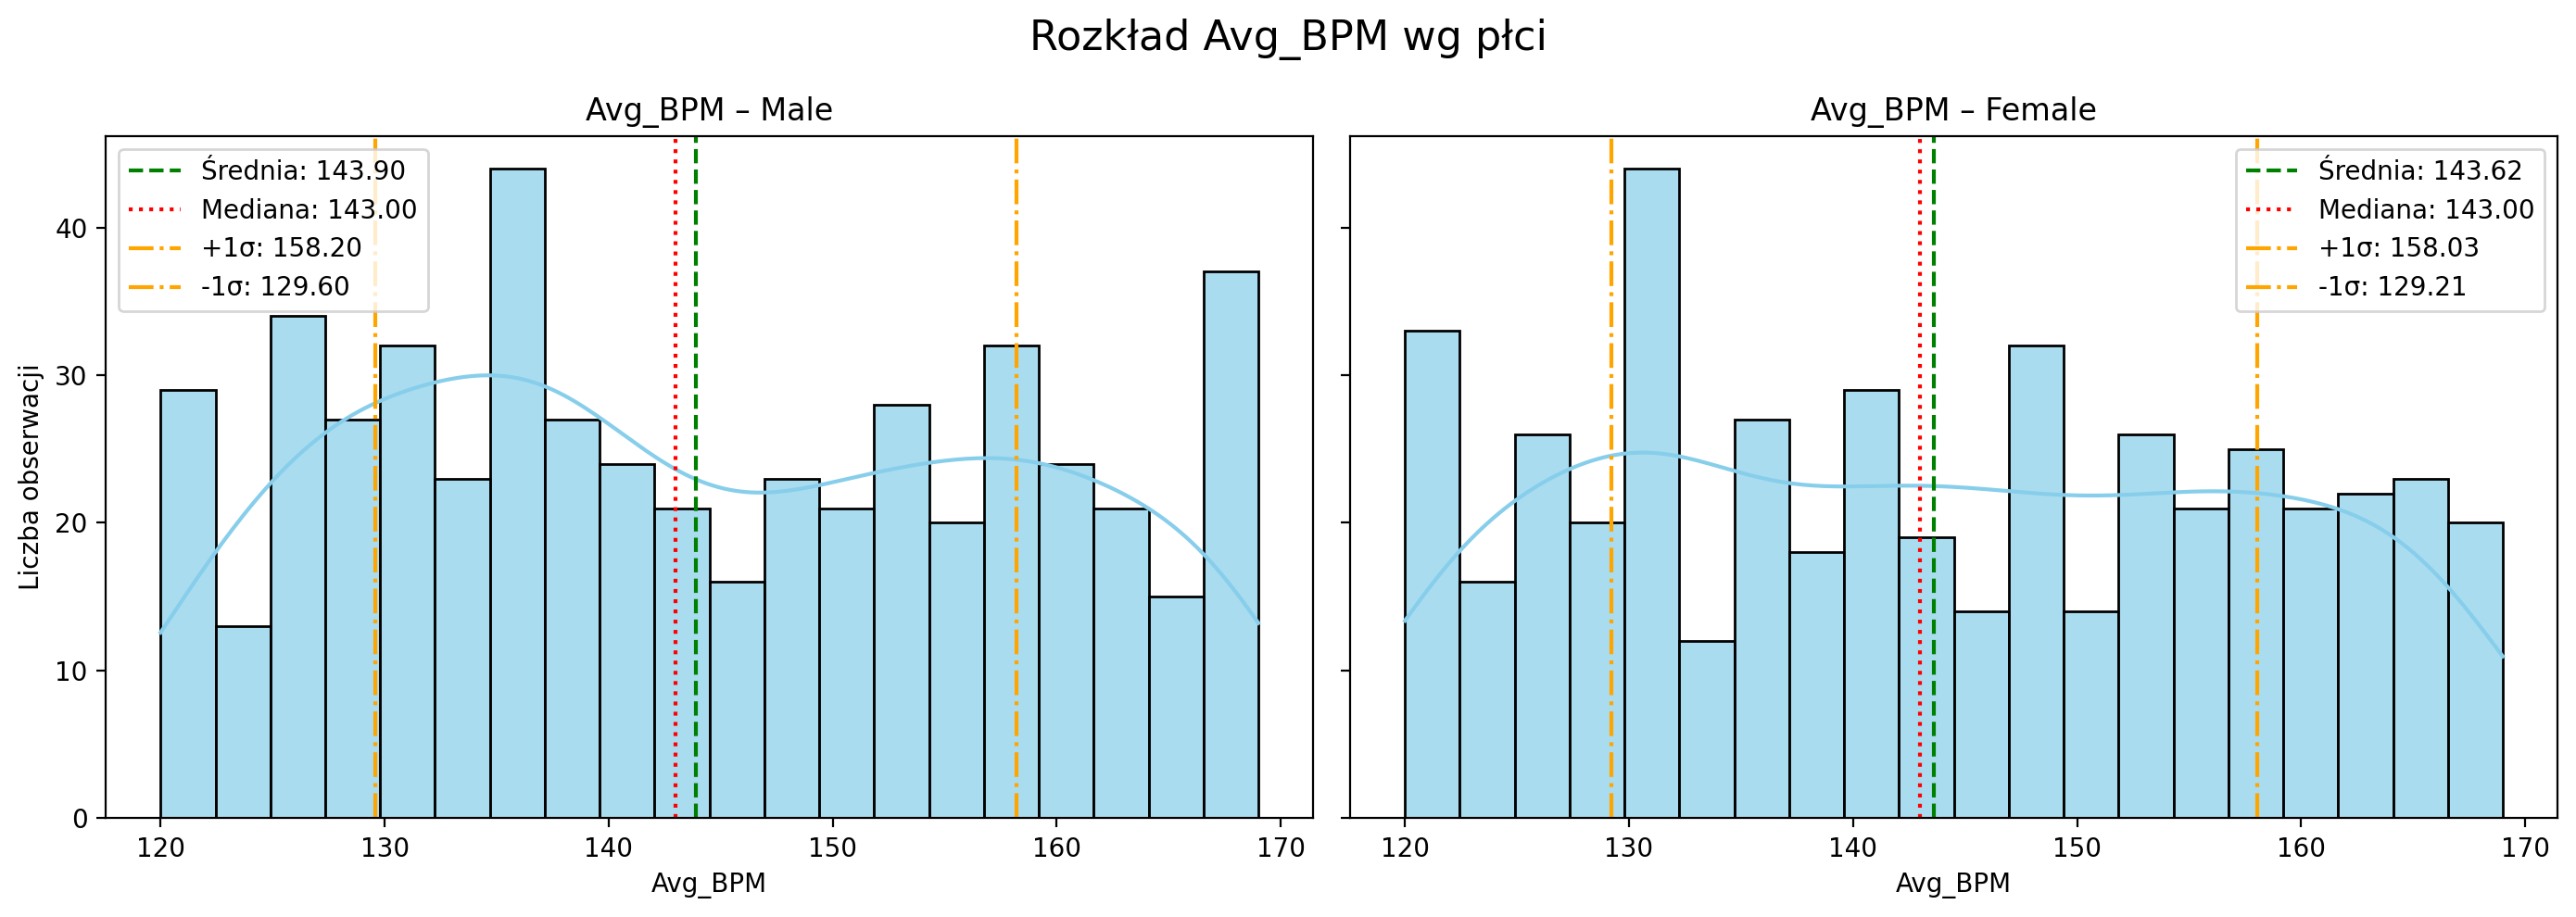

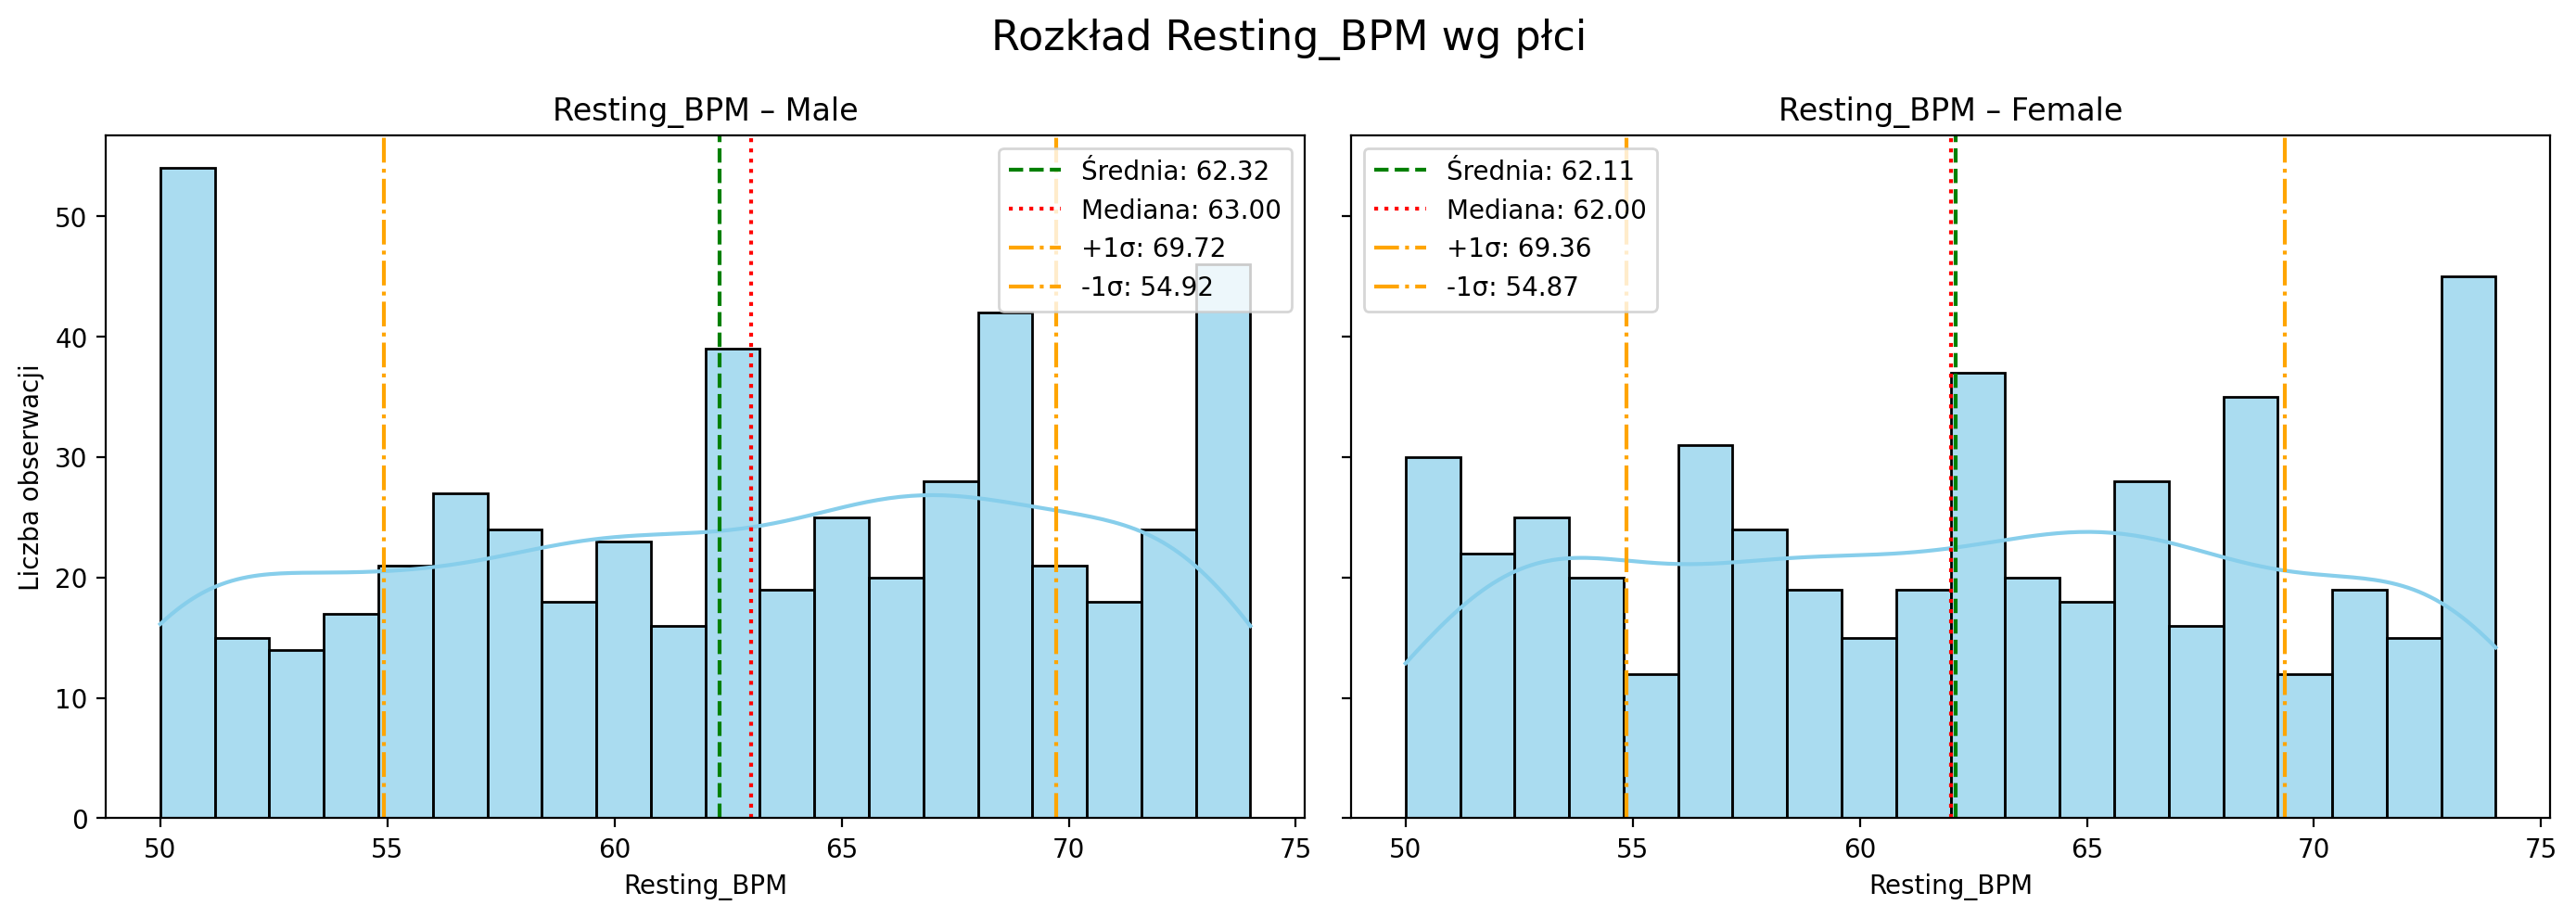

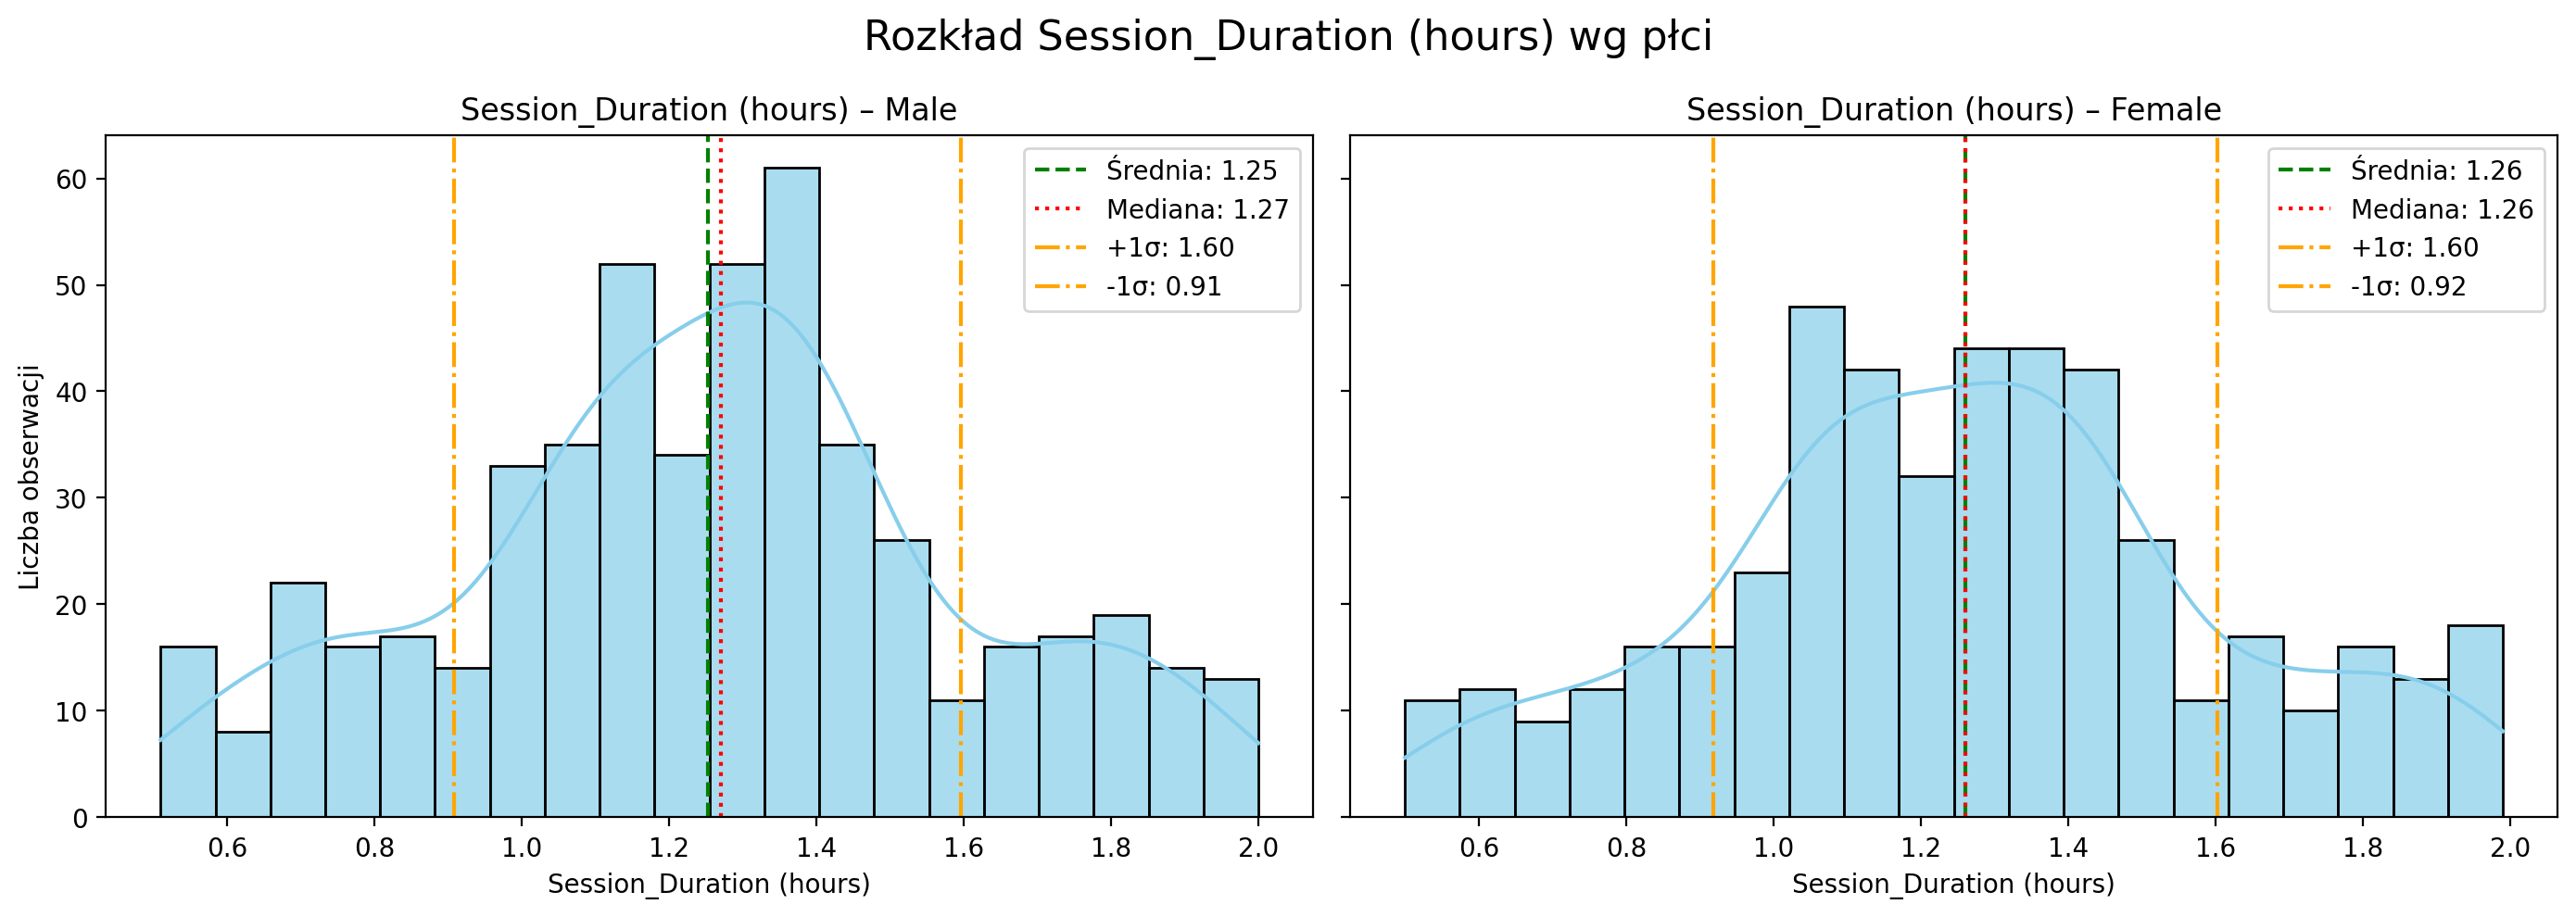

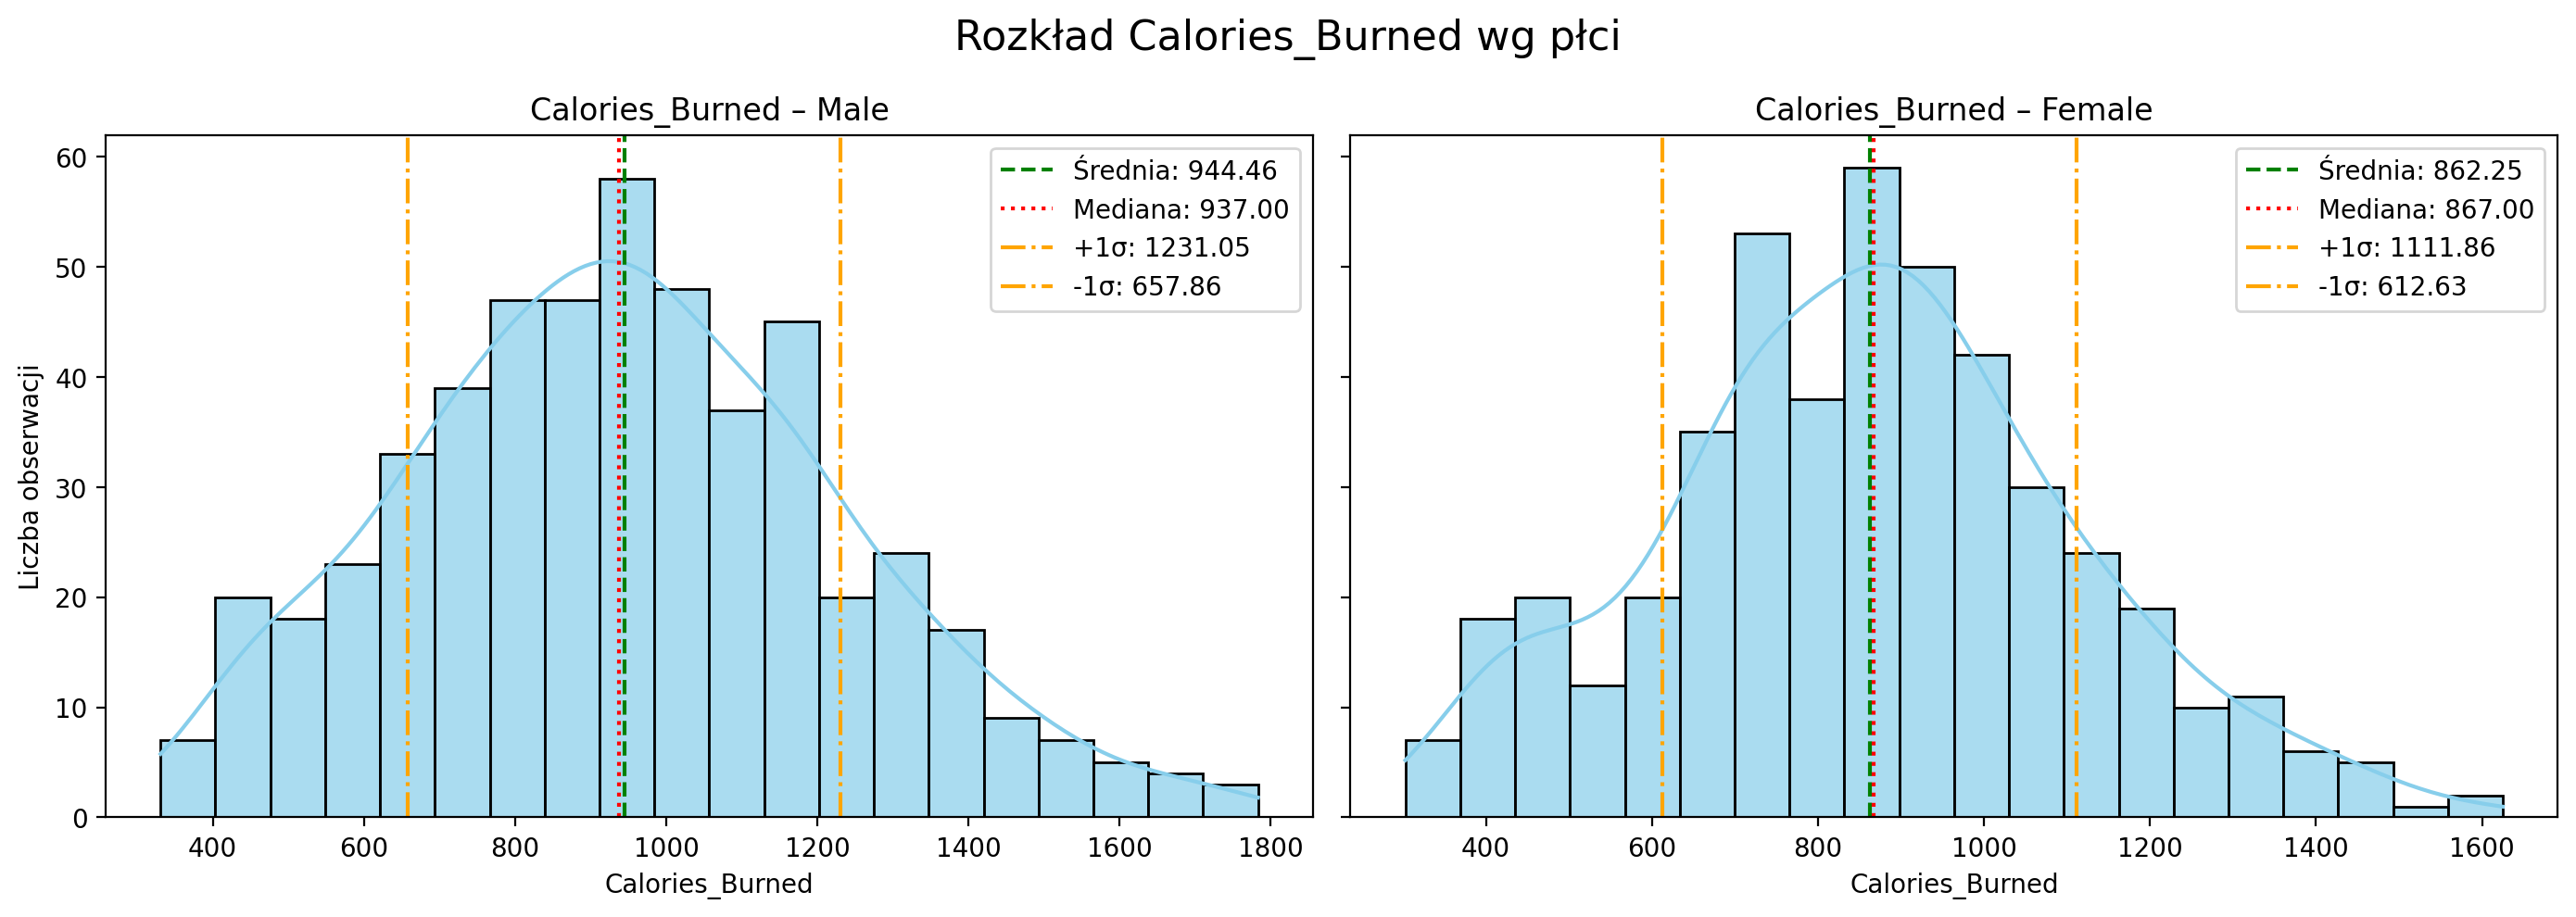

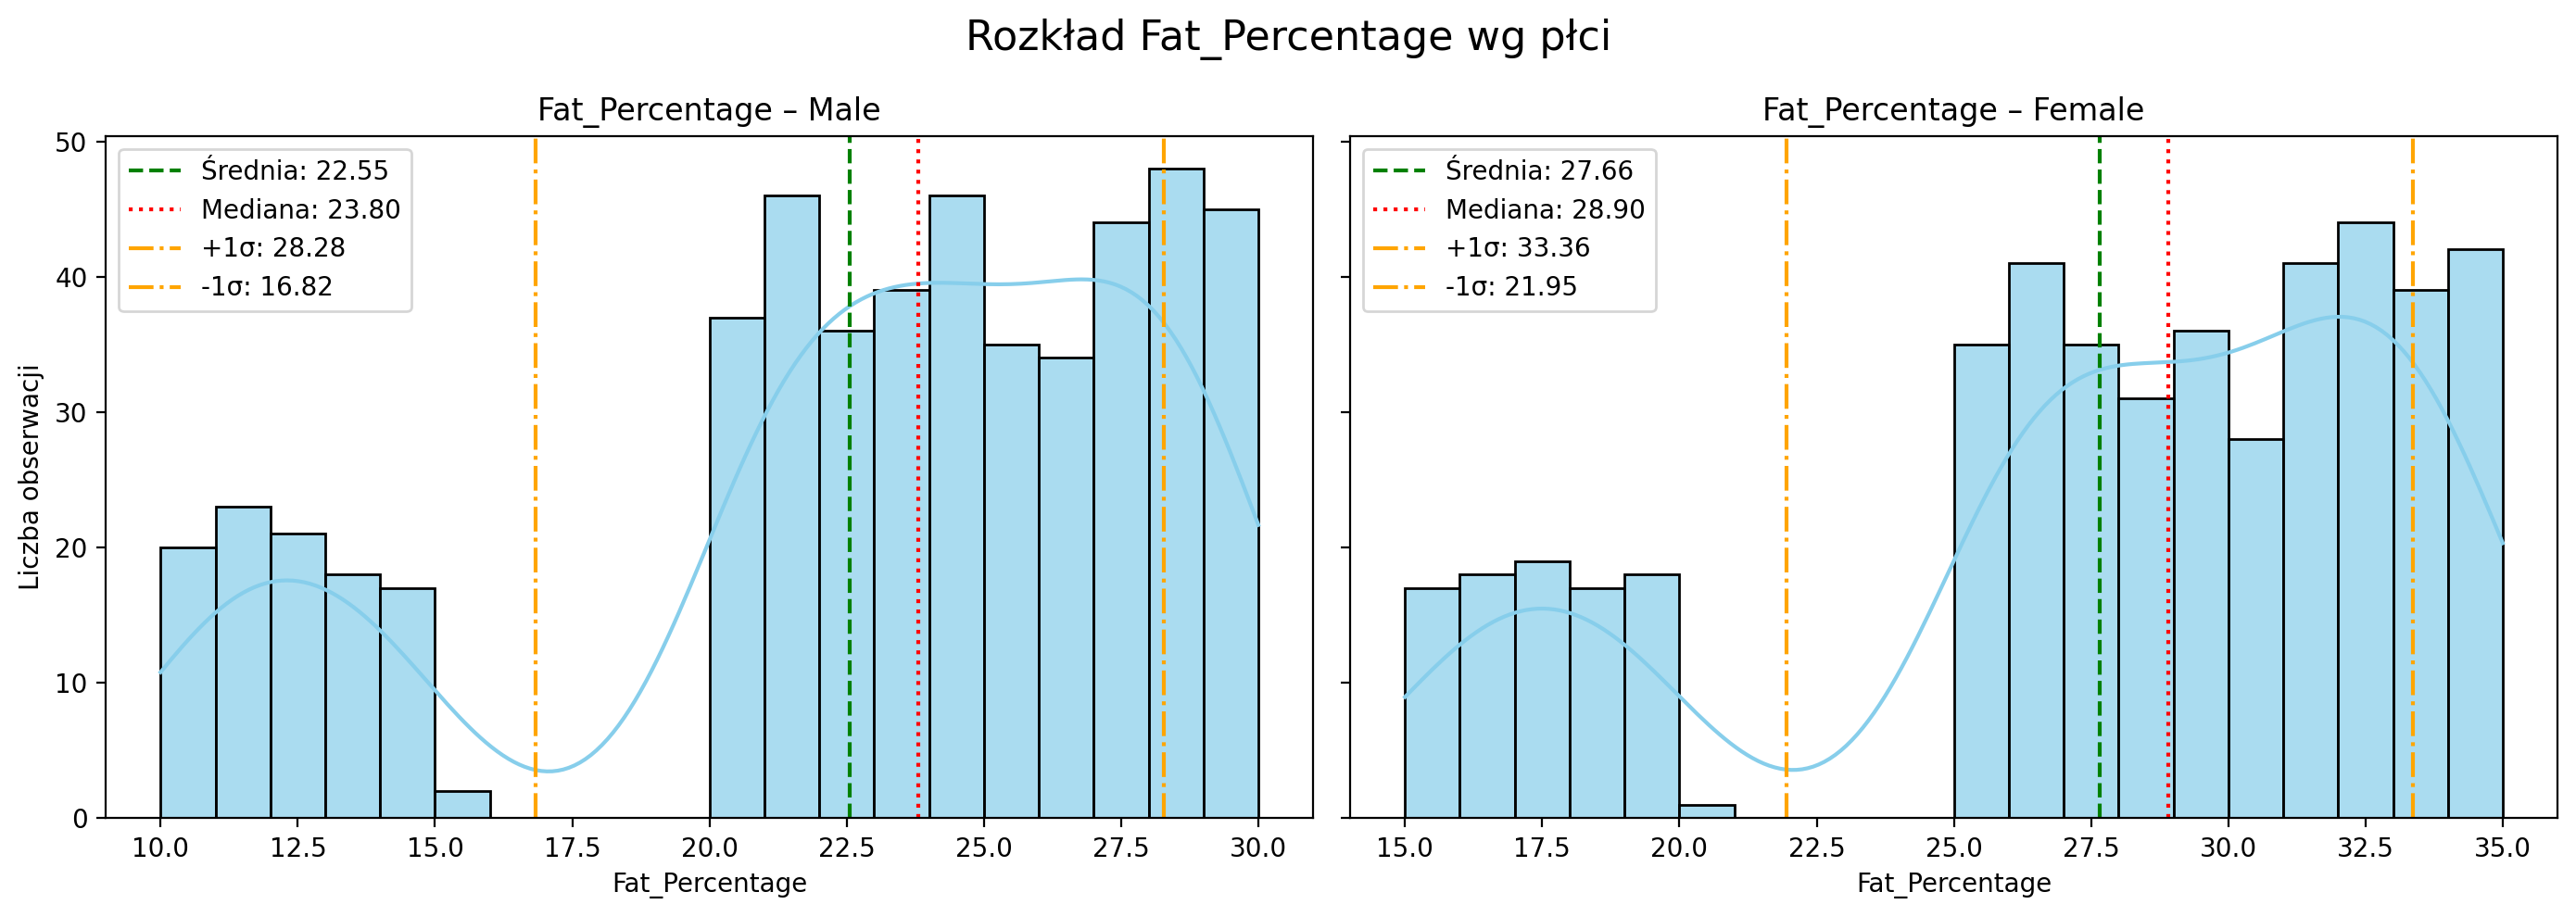

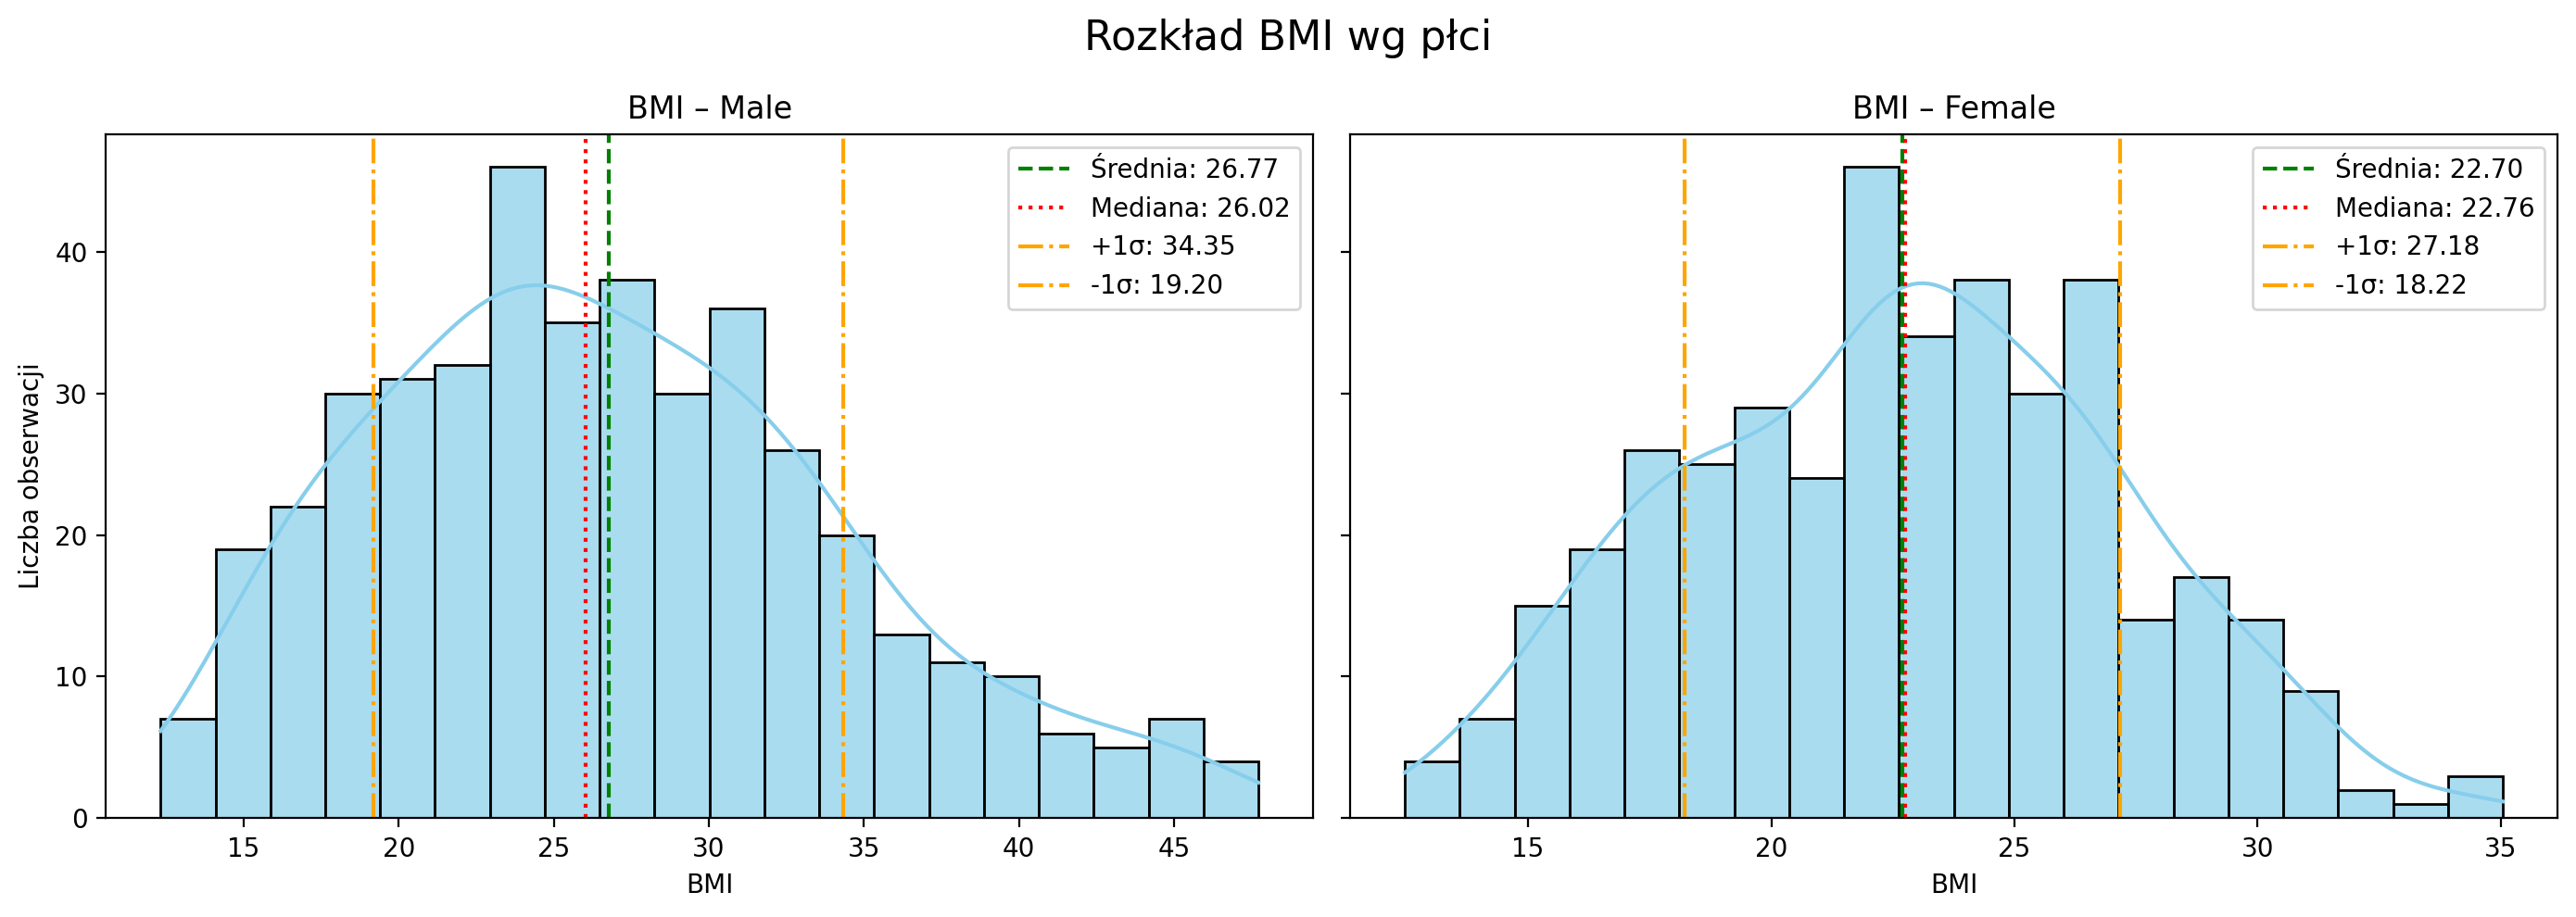

In [27]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# Kolumny do pominięcia
excluded_columns = ['Water_Intake (liters)', 'Workout_Frequency (days/week)', 'Experience_Level']

# Wybór kolumn numerycznych z pominięciem wybranych cech
df_out = df.select_dtypes(include='number').drop(columns=excluded_columns, errors='ignore')

# Funkcja tworząca wykresy obok siebie dla jednej cechy
def plot_gender_distribution(data, column):
    genders = ['Male', 'Female']
    fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

    for i, gender in enumerate(genders):
        subdata = data[data['Gender'] == gender][column].dropna()
        mean_val = subdata.mean()
        median_val = subdata.median()
        std_val = subdata.std()

        sns.histplot(subdata, kde=True, color='skyblue', bins=20, alpha=0.7, ax=axes[i])
        axes[i].axvline(mean_val, linestyle='dashed', color='green', label=f'Średnia: {mean_val:.2f}')
        axes[i].axvline(median_val, linestyle='dotted', color='red', label=f'Mediana: {median_val:.2f}')
        axes[i].axvline(mean_val + std_val, linestyle='dashdot', color='orange', label=f'+1σ: {(mean_val + std_val):.2f}')
        axes[i].axvline(mean_val - std_val, linestyle='dashdot', color='orange', label=f'-1σ: {(mean_val - std_val):.2f}')
        axes[i].set_title(f"{column} – {gender}")
        axes[i].set_xlabel(column)
        axes[i].set_ylabel("Liczba obserwacji")
        axes[i].legend()

    plt.suptitle(f"Rozkład {column} wg płci", fontsize=16)
    plt.tight_layout()
    plt.show()

# Pętla generująca wykresy dla każdej wybranej kolumny numerycznej
for col in df_out.columns:
    plot_gender_distribution(df, col)


In [28]:
# import plotly.express as px

included_columns = ['Water_Intake (liters)', 'Workout_Frequency (days/week)', 'Experience_Level', 'Fat_Percentage']

for col in included_columns:
    if col in df.columns:
        fig = px.histogram(
            df,
            x=col,
            color='Gender',  # rozdzielnie dla Male i Female
            barmode='overlay',  # słupki nakładają się
            nbins=20,  # można dopasować
            title=f"Histogram rozkładu {col} wg płci",
        )
        fig.update_layout(bargap=0.2)

        # # usunac polowki jesli chodzi o ilosc dni na silowni (nie ma sensu)
        # ticks = np.unique(np.round(np.histogram_bin_edges(x_vals, bins=20), 2))
        # ticks = [t for t in ticks if t not in [1.5, 2.5, 3.5, 4.5]]  # Remove .5 
        fig.show()

#### 2.2.3.3 Wartości odstające z wykorzystaniem IQR

In [29]:
# Wybierz kolumny liczbowe
numeric_columns = df.select_dtypes(include='number').columns

# Lista do przechowywania wyników
outlier_report_gender = []

# Podział na płeć i analiza IQR
for gender in df['Gender'].dropna().unique():
    df_gender = df[df['Gender'] == gender]
    
    for col in numeric_columns:
        data = df_gender[col].dropna()
        if data.empty:
            continue
        
        Q1 = data.quantile(0.25)
        Q3 = data.quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = data[(data < lower_bound) | (data > upper_bound)]

        outlier_report_gender.append({
            'Gender': gender,
            'Column': col,
            'Q1': Q1,
            'Q3': Q3,
            'IQR': IQR,
            'Lower Bound': lower_bound,
            'Upper Bound': upper_bound,
            'Outlier Count': len(outliers),
            'Outlier %': (len(outliers) / len(data)) * 100
        })

# Stwórz i wyświetl DataFrame
outlier_df_gender = pd.DataFrame(outlier_report_gender).round(2)
print(outlier_df_gender.to_string(index=False))
print()
df_male = df[df['Gender'] == 'Male'].shape[0]
df_female = df[df['Gender'] == 'Female'].shape[0]
print(f'W badanej grupie męczyźni stanowią {(df_male/len(df))*100:.2f}% ({df_male} obserwacji) a kobiety {(df_female/len(df))*100:.2f}% ({df_female} obserwacji).')


Gender                        Column     Q1      Q3    IQR  Lower Bound  Upper Bound  Outlier Count  Outlier %
  Male                           Age  28.00   50.00  22.00        -5.00        83.00              0       0.00
  Male                   Weight (kg)  69.75  101.60  31.85        21.98       149.38              0       0.00
  Male                    Height (m)   1.69    1.89   0.20         1.39         2.19              0       0.00
  Male                       Max_BPM 170.00  189.00  19.00       141.50       217.50              0       0.00
  Male                       Avg_BPM 132.00  157.00  25.00        94.50       194.50              0       0.00
  Male                   Resting_BPM  56.00   68.50  12.50        37.25        87.25              0       0.00
  Male      Session_Duration (hours)   1.04    1.45   0.41         0.43         2.06              0       0.00
  Male               Calories_Burned 742.00 1138.50 396.50       147.25      1733.25              2       0.39
 

#### 2.2.3.4 Boxploty cech liczbowych Calories_Burned, Fat_Percentage,  BMI z podziałem na płeć

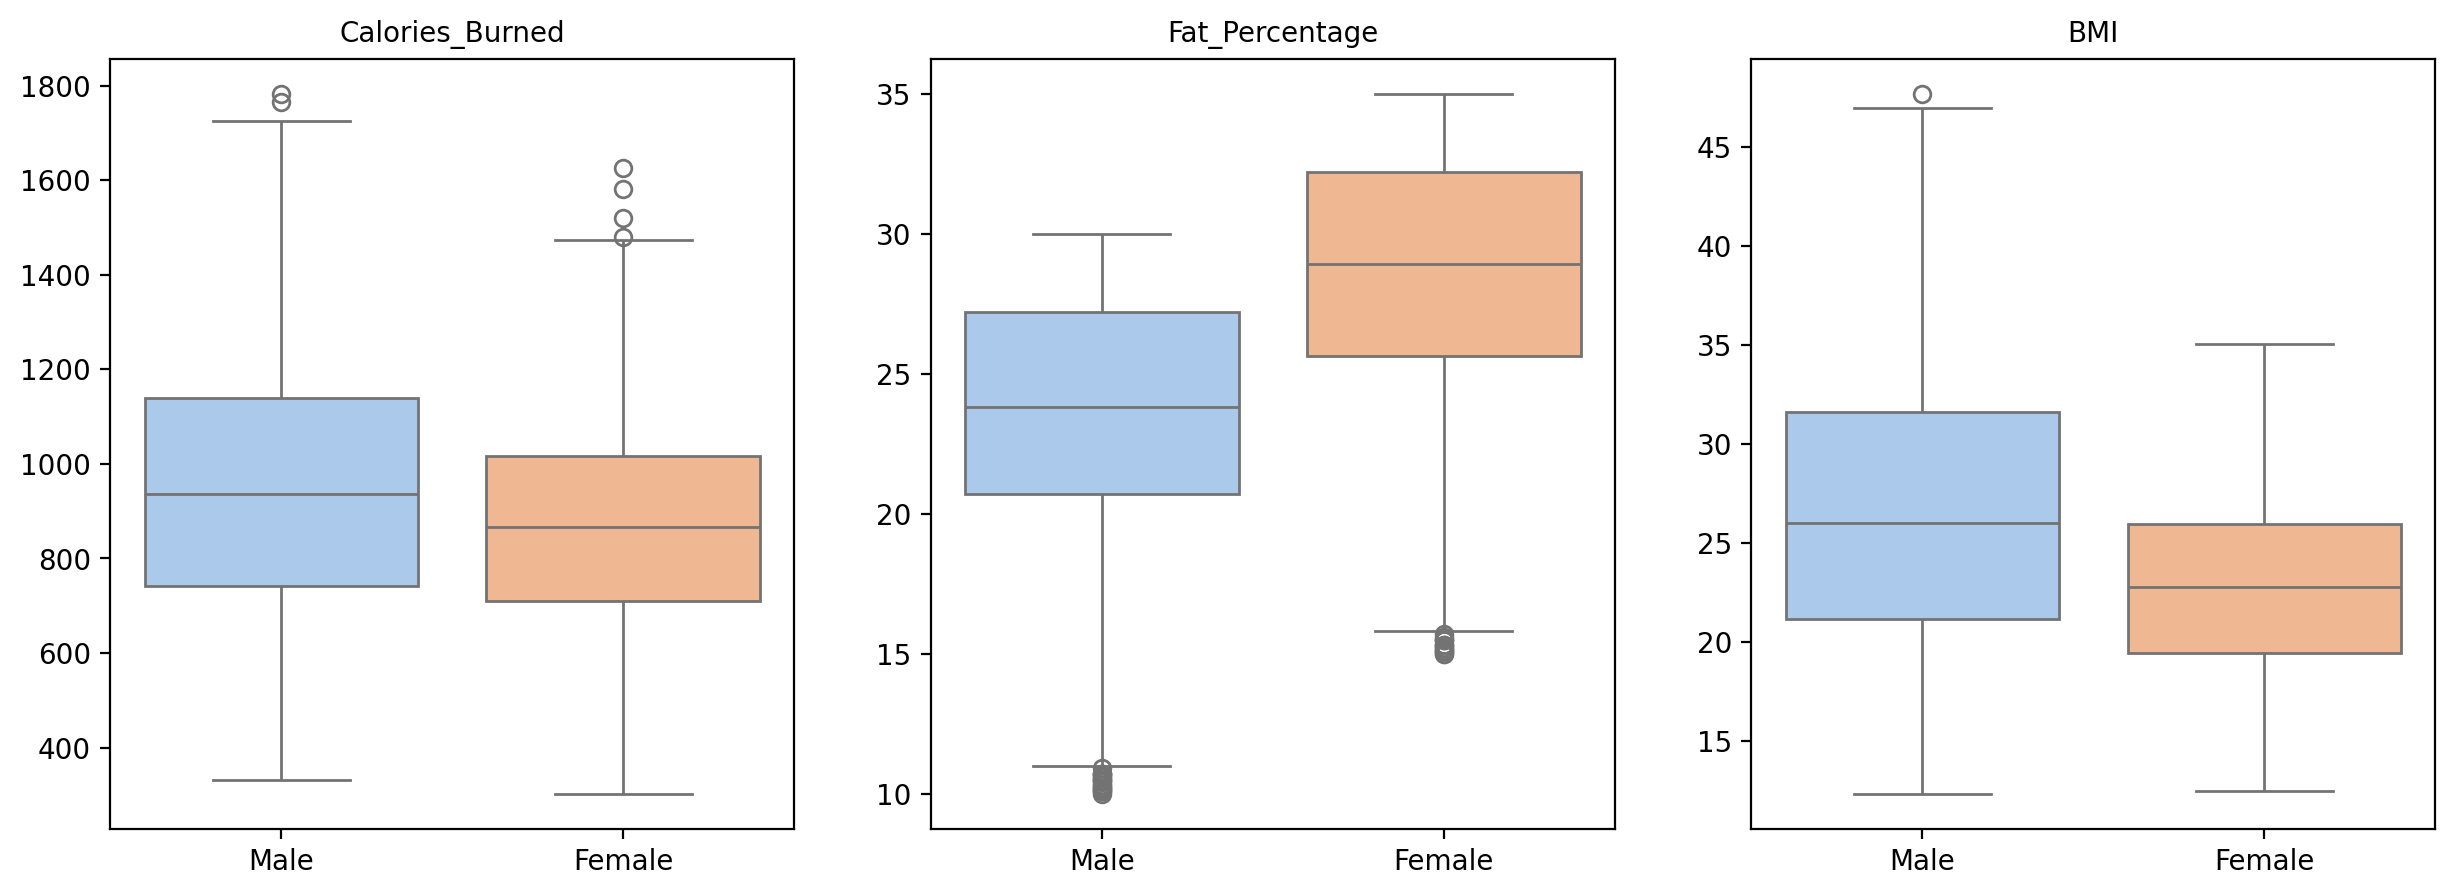

In [30]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns

# Wczytanie danych
df = pd.read_csv("silownia_new.csv")

# Wybrane kolumny liczbowe do analizy
selected_columns = ['Calories_Burned', 'Fat_Percentage', 'BMI']

# Parametry siatki wykresów
cols_per_row = 3
fig, axes = plt.subplots(1, len(selected_columns), figsize=(5 * len(selected_columns), 5))

# Upewniamy się, że axes to lista
if len(selected_columns) == 1:
    axes = [axes]

# Tworzenie boxplotów
for ax, col in zip(axes, selected_columns):
    sns.boxplot(
        data=df,
        x='Gender',
        y=col,
        hue='Gender',
        ax=ax,
        palette='pastel'
    )
    ax.set_title(f"{col}", fontsize=10)
    ax.set_xlabel("")
    ax.set_ylabel("")

    # Usunięcie powielonej legendy
    legend = ax.get_legend()
    if legend is not None:
        legend.remove()

# Układ i tytuł zbiorczy


#### 2.2.3.5 Wartości odstające dla cechy Fat_Percentage - dla kobiet i męzczyzn

In [31]:
print("Outliery Fat_Percentage < 10.95 dla kobiet:")
print()
# Ręczna granica dolna z tabeli
lower_bound = 15.76

# Filtruj outliery poniżej dolnej granicy
outliers_low = df[(df['Gender'] == 'Female') & (df['Fat_Percentage'] < lower_bound)]

# Wyświetl wszystkie kolumny
print(outliers_low.to_string(index=False))

Outliery Fat_Percentage < 10.95 dla kobiet:

 Age Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  Session_Duration (hours)  Calories_Burned Workout_Type  Fat_Percentage  Water_Intake (liters)  Workout_Frequency (days/week)  Experience_Level   BMI
56.0 Female         58.0        1.68      168      156           74                      1.59             1116         HIIT            15.5                    2.7                              5                 3 20.55
57.0 Female         64.0        1.52      170      129           52                      1.73             1004          NaN            15.2                    2.7                              5                 3 27.70
 NaN Female         61.5        1.69      160      152           63                      1.80             1231       Cardio            15.5                    2.7                              4                 3 21.53
41.0 Female         63.4        1.59      162      153           55                

In [32]:
print("Outliery Fat_Percentage < 10.95 dla mężczyzn:")
print()
# Ręczna granica dolna z tabeli
lower_bound = 10.95

# Filtruj outliery poniżej dolnej granicy
outliers_low = df[(df['Gender'] == 'Male') & (df['Fat_Percentage'] < lower_bound)]

# Wyświetl wszystkie kolumny
print(outliers_low.to_string(index=False))


Outliery Fat_Percentage < 10.95 dla mężczyzn:

 Age Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  Session_Duration (hours)  Calories_Burned Workout_Type  Fat_Percentage  Water_Intake (liters)  Workout_Frequency (days/week)  Experience_Level   BMI
38.0   Male         81.4        1.71      187      148           58                      1.52             1237         HIIT            10.2                    3.5                              5                 3 27.84
25.0   Male         81.5        1.61      170      159           63                      1.93             1688         HIIT            10.9                    3.5                              4                 3   NaN
30.0   Male         85.3        1.95      160      155           68                      1.61             1373         Yoga            10.4                    3.5                              5                 3 22.43
 NaN   Male         80.9        1.80      178      126           59              

#### 2.2.3.6 Wartości odstające dla cechy Calories_Burned - dla kobiet i męzczyzn

In [33]:
print("Outliery Calories_Burned  < 1474.62 dla kobiet:")
print()
# Ręczna granica dolna z tabeli
upper_bound = 1474.62 

# Filtruj outliery poniżej dolnej granicy
outliers_high = df[(df['Gender'] == 'Female') & (df['Calories_Burned'] > upper_bound)]

# Wyświetl wszystkie kolumny
print(outliers_high.to_string(index=False))

Outliery Calories_Burned  < 1474.62 dla kobiet:

 Age Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  Session_Duration (hours)  Calories_Burned Workout_Type  Fat_Percentage  Water_Intake (liters)  Workout_Frequency (days/week)  Experience_Level   BMI
 NaN Female         60.1        1.79      170      165           63                      1.97             1625       Cardio            15.9                    2.7                              4                 3 18.76
43.0 Female         57.3        1.79      175      166           62                      1.98             1479         Yoga            17.8                    2.7                              4                 3 17.88
28.0 Female         55.1        1.79      192      159           67                      1.99             1582         Yoga            17.0                    2.7                              5                 3   NaN
22.0 Female         61.8        1.52      169      166           61            

In [34]:
print("Outliery Calories_Burned  < 1474.62 dla męczyzn:")
print()
# Ręczna granica dolna z tabeli
upper_bound = 1733.25 

# Filtruj outliery poniżej dolnej granicy
outliers_high = df[(df['Gender'] == 'Male') & (df['Calories_Burned'] > upper_bound)]

# Wyświetl wszystkie kolumny
print(outliers_high.to_string(index=False))

Outliery Calories_Burned  < 1474.62 dla męczyzn:

 Age Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  Session_Duration (hours)  Calories_Burned Workout_Type  Fat_Percentage  Water_Intake (liters)  Workout_Frequency (days/week)  Experience_Level   BMI
19.0   Male         82.4        1.96      174      169           62                      1.90             1766         HIIT            10.1                    3.5                              5                 3 21.45
 NaN   Male         89.8        1.92      199      168           67                      1.93             1783     Strength            10.6                    3.5                              4                 3   NaN


#### 2.2.3.7 Wartości odstające dla cechy BMI - dla męzczyzn

In [35]:
# wczytanie danych (powtórnie przed zmianą, zeby nie wracać się do początku pliku w trakcie pracy z propjektem)
df = pd.read_csv('silownia_new.csv')
df.shape

(973, 15)

In [36]:
print("BMI  > 47.33 dla męczyzn:")
print()
# Ręczna granica dolna z tabeli
upper_bound = 47.33 

# Filtruj outliery poniżej dolnej granicy
outliers_high = df[(df['Gender'] == 'Male') & (df['BMI'] > upper_bound)]

# Wyświetl wszystkie kolumny
print(outliers_high.to_string(index=False))

BMI  > 47.33 dla męczyzn:

 Age Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  Session_Duration (hours)  Calories_Burned Workout_Type  Fat_Percentage  Water_Intake (liters)  Workout_Frequency (days/week)  Experience_Level   BMI
57.0   Male        126.8        1.63      161      133           73                      0.96              632         Yoga            20.8                    2.1                              2                 1 47.72


Dla Wartości odstającej dla cechy BMI, dla męzczyzn (BMI > 47.33):
- BMI = 47.72 mimo, ze jest poprawne, przy Fat_Percentage = 20.8% wskazuje na silną niespójność z innymi danymi (poziom tłuszczu przy BMI powinien wynosić od 35% do 45%).

**Do dalszych badań i imputacji brtakujących wartości ten wiersz zostanie usunięty.**

Wartości dla cechy Fat_Percentage dla kobiet i męzczyzn wydają się być realistyczne.

Nalezy przyjrzeć się wartością Calories_Burned dla Yogi dla całego zbioru, gdyz dla niskiej intensywności charakterystycznej dla Yogi **wydają się być zawyzone**.

**Tabela przedstawiająca spalane kalorie podczas godzinnego treningu**
| Aktywność   | kcal/min       | kcal/godzina             |
|-------------|----------------|--------------------------|
| **Yoga**    | 3–7            | 180–420 kcal             |
| **Cardio**  | 7–14           | 420–840 kcal             |
| **Strength**| 3–9            | 180–540 kcal             |
| **HIIT**    | 9–15           | 540–900 kcal             |

**Źródła:**

- [Harvard Medical School — Calories burned in 30 minutes](https://www.health.harvard.edu/diet-and-weight-loss/calories-burned-in-30-minutes-of-leisure-and-routine-activities)  
- [ACE Fitness](https://www.acefitness.org/)   



#### 2.2.3.8 Usunięcie wartości odstających dla męczyzn dla BMI > 47.33 oraz uzupełnienie brakujących danych BMI

In [37]:
upper_bound = 47.33
outliers_high = df[(df['Gender'] == 'Male') & (df['BMI'] > upper_bound)]

# pobieranie ideksów wierszy, które chcemy usunąć
outliers_to_drop = outliers_high.index

df = df.drop(outliers_to_drop)
df.shape
# df[(df['Gender'] == 'Male') & (df['BMI'] > 47.33)]

(972, 15)

**Uzupełnienie brakujących danych BMI**

BMI (Body Mass Index) to **wskaźnik masy ciała**, który pozwala oszacować, czy masa ciała osoby jest w proporcji do jej wzrostu.

Obliczamy go według wzoru:
$$
BMI = \frac{masa\ ciała\ [kg]}{(wzrost\ [m])^2}
$$

Czy w wierszach, w których BMI jest NaN, wartości cech dotyczących masy ciała (Weight (kg)) i wzrostu (Height (m)) są kompletne ?

In [38]:
count = df[ df['BMI'].isna() & (df['Height (m)'].isna() | df['Weight (kg)'].isna()) ].shape[0]
print(f"Liczba wierszy z brakującym BMI, ale niekompletnymi danymi o masie/wzroście: {count}.")

Liczba wierszy z brakującym BMI, ale niekompletnymi danymi o masie/wzroście: 0.


In [39]:
# Gdzie możemy obliczyć BMI
rows_to_update = df['BMI'].isna() & df['Weight (kg)'].notna() & df['Height (m)'].notna()
df[rows_to_update][['Weight (kg)', 'Height (m)', 'BMI']]

Weight (kg)  Height (m)  BMI
0           88.3        1.71  NaN
2           68.1        1.66  NaN
14         117.7        1.81  NaN
23         120.9        1.78  NaN
31          65.4        1.52  NaN
..           ...         ...  ...
957         57.7        1.57  NaN
958         66.5        1.69  NaN
962         83.4        1.65  NaN
969         66.6        1.61  NaN
970         60.4        1.76  NaN

[150 rows x 3 columns]

In [40]:
# Brakujące BMI
missing_bmi = df[df['BMI'].isna()]

# dostęp do wagai i wzrostu
weight = df['Weight (kg)'].notna()
height = df['Height (m)'].notna()

# Wyliczamy BMI tylko dla tych wierszy i zaokrąglamy do 2 miejsc
bmi_values = (
    df.loc[rows_to_update, 'Weight (kg)'] / (df.loc[rows_to_update, 'Height (m)'] ** 2)
).round(2)

# Uzupełniamy BMI
df.loc[rows_to_update, 'BMI'] = bmi_values

print("Uzupełniono brakujące wartości BMI.")

# Sprawdzamy zakres nowo wyliczonych wartości
min_bmi = bmi_values.min()
max_bmi = bmi_values.max()

print(f"Nowo wyliczone BMI mieszczą się w zakresie od {min_bmi:.2f} do {max_bmi:.2f}.")

Uzupełniono brakujące wartości BMI.
Nowo wyliczone BMI mieszczą się w zakresie od 12.85 do 49.84.


**Uzupełnione wartości BMI**

In [41]:
df[rows_to_update][['Weight (kg)', 'Height (m)', 'BMI']]

Weight (kg)  Height (m)    BMI
0           88.3        1.71  30.20
2           68.1        1.66  24.71
14         117.7        1.81  35.93
23         120.9        1.78  38.16
31          65.4        1.52  28.31
..           ...         ...    ...
957         57.7        1.57  23.41
958         66.5        1.69  23.28
962         83.4        1.65  30.63
969         66.6        1.61  25.69
970         60.4        1.76  19.50

[150 rows x 3 columns]

In [42]:
print("BMI  > 47.33 dla męczyzn:")
print()
# Ręczna granica dolna z tabeli
upper_bound = 47.33 

# Filtruj outliery poniżej dolnej granicy
outliers_high = df[(df['Gender'] == 'Male') & (df['BMI'] > upper_bound)]

# Wyświetl wszystkie kolumny
print(outliers_high.to_string(index=False))

BMI  > 47.33 dla męczyzn:

 Age Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  Session_Duration (hours)  Calories_Burned Workout_Type  Fat_Percentage  Water_Intake (liters)  Workout_Frequency (days/week)  Experience_Level   BMI
48.0   Male        129.2        1.61      193      167           62                      1.06              876         Yoga            21.4                    2.9                              4                 2 49.84
35.0   Male        127.1        1.62      187      128           69                      1.02              718     Strength            23.3                    3.4                              4                 2 48.43


**BMI 49 przy wzroście 1.6 m oraz 125 kg przy 20% tłuszczu oznacza, ze przypadeki są jest wysoce podejrzane i raczej nierealne, wartości zostaną usunięte.**

**BMI DO UPORZADKOWANIA !!! SA JESZCZE OUTLIERY ALE MOWIACE O CIEZKIM NIEDOWZYWIENIU, JAKIES REGUŁY DO NAPISANIA I BARDZIEJ ZAUTOMATYZOWAC BMI, RECZNIE TO ZA DUZO ROBOTY !!!**

#### 2.2.3.9 Analiza cech dla kobiet

In [43]:
df_female = df[df['Gender'] == 'Female']
df_female.head()

Age  Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
1   46.0  Female         74.9        1.53      179      151           66   
2   32.0  Female         68.1        1.66      167      122           54   
5   56.0  Female         58.0        1.68      168      156           74   
7   40.0  Female         69.7        1.51      189      141           64   
15  39.0  Female         42.5        1.75      181      131           52   

    Session_Duration (hours)  Calories_Burned Workout_Type  Fat_Percentage  \
1                       1.30              883          NaN            33.9   
2                       1.11              677       Cardio            33.4   
5                       1.59             1116         HIIT            15.5   
7                       1.27              895       Cardio            30.6   
15                      1.13              740     Strength            26.2   

    Water_Intake (liters)  Workout_Frequency (days/week)  Experience_Level  \
1                     2.1                              4                 2   
2                     2.3                              4                 2   
5                     2.7                              5                 3   
7                     1.9                              3                 2   
15                    2.1                              2                 1   

      BMI  
1   32.00  
2   24.71  
5   20.55  
7   30.57  
15  13.88

## 3 .....

Brakuje wartości w Age, Workout_Type i BMI, co było juz widać wyzej, w info. 
Brakuje 100 w Age i po 150 w Workout_Type i BMI.

Niska korelacja wskazuje na braki typu MAR.
Ponieważ w tym mechanizmie występuje związek, najlepszą opcją byłoby zastosowanie techniki imputacji - średniej, mediany, trybu lub wielokrotnej imputacji.

In [44]:
# Imputacja brakujących danych przy użyciu KNN

from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder

# Kopia danych, żeby nie nadpisać oryginału
df_knn = df_silownia.copy()

# Zakodowanie workout_type (kategorie = liczby)
le = LabelEncoder()
df_knn['Workout_Type_encoded'] = le.fit_transform(df_knn['Workout_Type'].astype(str))

# Kolumny do imputacji
cols = ['Age', 'BMI', 'Workout_Type_encoded']

# Imputer KNN 
imputer = KNNImputer(n_neighbors=20)
df_knn[cols] = imputer.fit_transform(df_knn[cols])

# Odkodowanie workout_type
df_knn['Workout_Type'] = le.inverse_transform(df_knn['Workout_Type_encoded'].round().astype(int))
df_knn = df_knn.drop(columns='Workout_Type_encoded')

# Sprawdenie braków danych po imputacji
print(df_knn[['Age', 'BMI', 'Workout_Type']].isnull().sum())

NameError: name 'df_silownia' is not defined

# 3. Wizualizacje
*4-5 wykresów przedstawiających określone wzorce lub cechy, które chcesz podkreślić. Każdej wizualizacji powinien towarzyszyć krótki (1-2 zdania) opis tego, co według Ciebie pokazuje.*

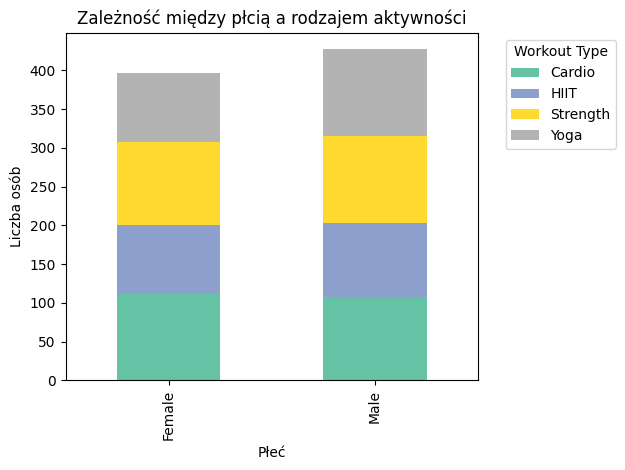

In [ ]:
import matplotlib.pyplot as plt

# Tabela zależności
ct = pd.crosstab(df_silownia['Gender'], df_silownia['Workout_Type'])

# Wykres skumulowany
ct.plot(kind='bar', stacked=True, colormap='Set2')
plt.title('Zależność między płcią a rodzajem aktywności')
plt.xlabel('Płeć')
plt.ylabel('Liczba osób')
plt.legend(title='Workout Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Interpretacja: Kobiety częściej wybierają cardio, a mężczyźni siłownię i treningi mieszane oraz jogę. Jednak rónice są niewielkie.

Text(45.11413975694444, 0.5, 'Liczba spalonych kalorii')

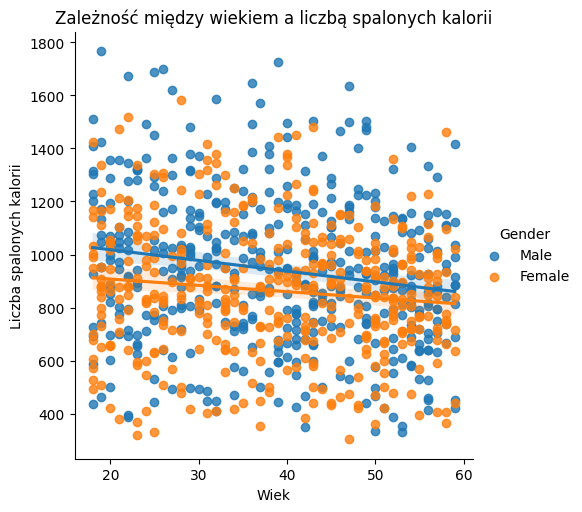

In [ ]:
# Czy wiek wpływa na liczbę spalonych kalorii?

sns.lmplot(data=df_silownia, x='Age', y='Calories_Burned', hue='Gender')
plt.title('Zależność między wiekiem a liczbą spalonych kalorii')
plt.xlabel('Wiek')
plt.ylabel('Liczba spalonych kalorii')

Interpretacja: Wraz z wiekiem można zauważyć spadek intensywności spalania kalorii. U kobiet wydaje się być delikatniejszy, u męczyzn rónica jest większa, ale nadal nie drastyczna.

Text(43.190944444444426, 0.5, 'Średnie tętno (BPM)')

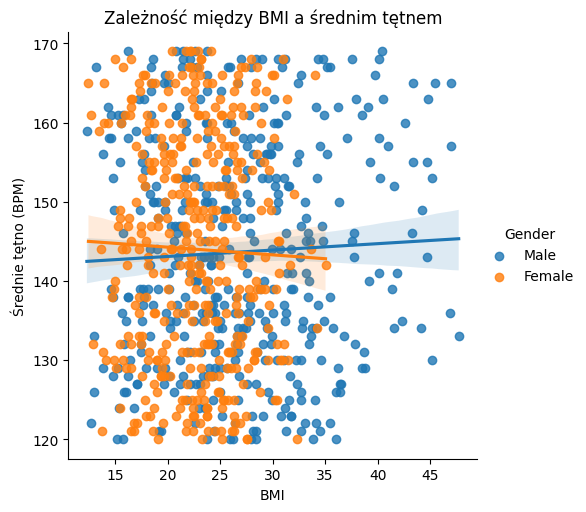

In [ ]:
# Czy BMI wpływa na średnie tętno?

sns.lmplot(data=df_silownia, x='BMI', y='Avg_BPM', hue='Gender')
plt.title('Zależność między BMI a średnim tętnem')
plt.xlabel('BMI')
plt.ylabel('Średnie tętno (BPM)')

Interpretacja: Widać, że u męzczyzn, wraz ze wzrostem BMI średnie tętno rośnie, co może sugerować większe obciążenie organizmu. U kobiet sytuacja jest odwrotna. Moze im mają większe BMI, tym mniej intensywne treningi wykoują.

/var/folders/mv/gl_0swbd1d7b76j07453s1n80000gn/T/ipykernel_17248/3344823215.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_silownia, x='Experience_Level', y='Calories_Burned', palette='Set3')


Text(0.5, 0, 'Poziom doświadczenia')

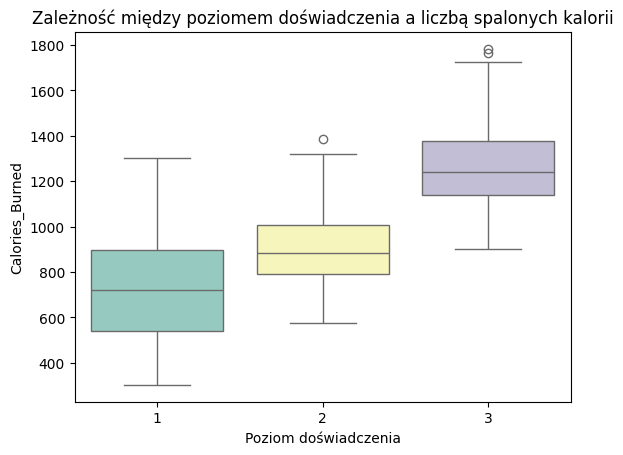

In [ ]:
# Zalezność między poziomem doświadczenia a liczbą spalonych kalorii
sns.boxplot(data=df_silownia, x='Experience_Level', y='Calories_Burned', palette='Set3')
plt.title('Zależność między poziomem doświadczenia a liczbą spalonych kalorii')
plt.xlabel('Poziom doświadczenia')

Interpretacja: Bardziej zaawansowani użytkownicy spalają więcej kalorii, ale z większym rozrzutem wyników.


Text(0, 0.5, 'Spożycie wody (litry)')

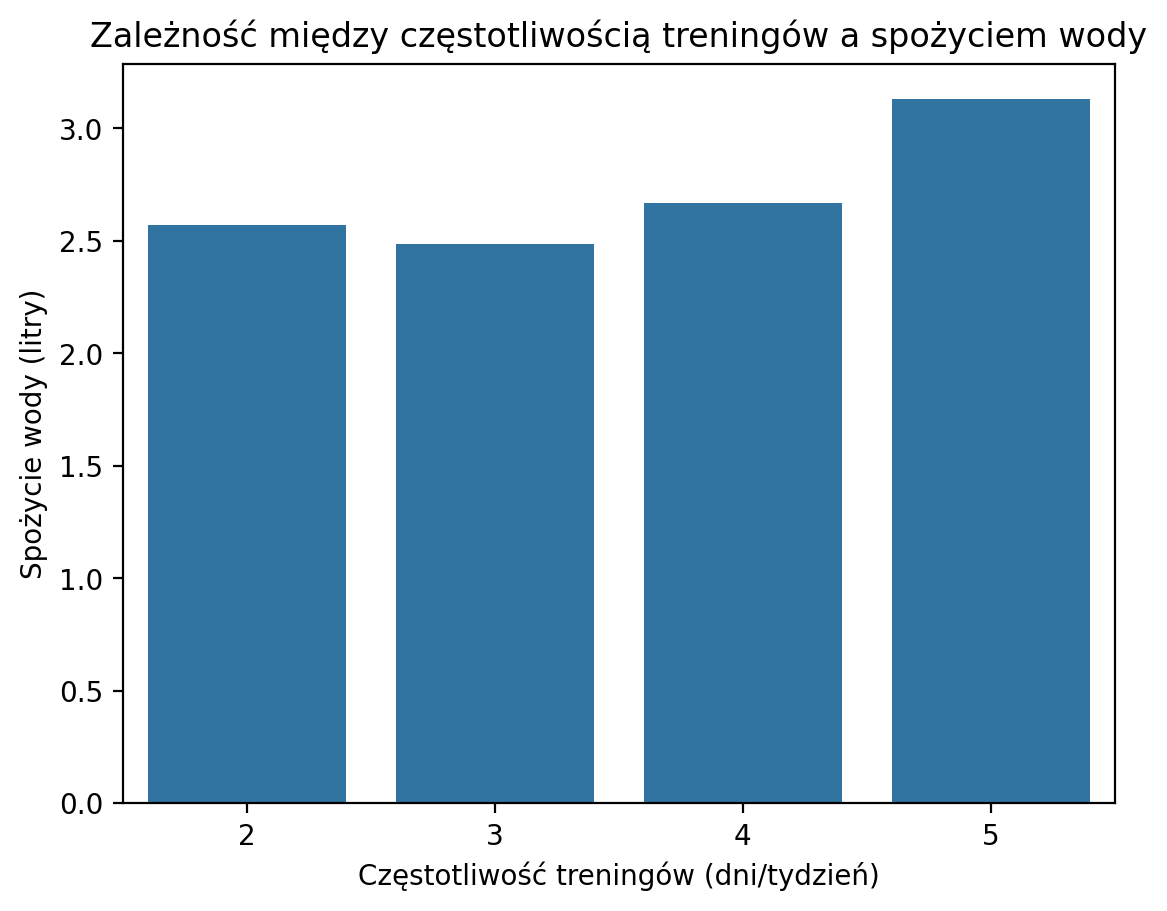

In [98]:
# Zależność między częstotliwością treningów a spożyciem wody

sns.barplot(data=df, x='Workout_Frequency (days/week)', y='Water_Intake (liters)', errorbar=None)
plt.title('Zależność między częstotliwością treningów a spożyciem wody')
plt.xlabel('Częstotliwość treningów (dni/tydzień)')
plt.ylabel('Spożycie wody (litry)')

Interpretacja: Osoby trenujące częściej wypijają średnio więcej wody.


# 4. Analiza opisowa
*2-3 analizy opisowe, odnoszące się do pytania badawczego (pytań). Każdej analizie powinna towarzyszyć krótka (1-3 zdania) interpretacja.*

Pytania badawcze

Czy płeć wpływa na wybór rodzaju aktywności fizycznej?
Czy jest zależność między rodzajem aktywności a średnim BMI ?
Czy średni % tkanki tłuszczowej jest różny dla kobiet i mężczyzn?
Czy wiek, poziom doświadczenia i częstotliwość treningów mają wpływ na spalanie kalorii?
Czy osoby o wyższym BMI mają wyższe tętno spoczynkowe lub niższą wydolność (niższy max BPM)?

Statystki opisowane zmiennych ilościowych: 


In [105]:
df.describe()

Age  Weight (kg)  Height (m)     Max_BPM     Avg_BPM  \
count  872.000000   972.000000  972.000000  972.000000  972.000000   
mean    38.605505    73.800206    1.722675  179.903292  143.777778   
std     12.264699    21.150210    0.127751   11.515668   14.348322   
min     18.000000    40.000000    1.500000  160.000000  120.000000   
25%     28.000000    58.100000    1.620000  170.000000  131.000000   
50%     39.000000    69.950000    1.710000  180.000000  143.000000   
75%     50.000000    85.925000    1.800000  190.000000  156.000000   
max     59.000000   129.900000    2.000000  199.000000  169.000000   

       Resting_BPM  Session_Duration (hours)  Calories_Burned  Fat_Percentage  \
count   972.000000                972.000000       972.000000      972.000000   
mean     62.211934                  1.256728       905.703704       24.981070   
std       7.322661                  0.343078       272.640566        6.261205   
min      50.000000                  0.500000       303.000000       10.000000   
25%      56.000000                  1.040000       720.000000       21.300000   
50%      62.000000                  1.265000       893.500000       26.200000   
75%      68.000000                  1.460000      1076.500000       29.300000   
max      74.000000                  2.000000      1783.000000       35.000000   

       Water_Intake (liters)  Workout_Frequency (days/week)  Experience_Level  \
count             972.000000                     972.000000        972.000000   
mean                2.627160                       3.323045          1.810700   
std                 0.600243                       0.912531          0.739617   
min                 1.500000                       2.000000          1.000000   
25%                 2.200000                       3.000000          1.000000   
50%                 2.600000                       3.000000          2.000000   
75%                 3.100000                       4.000000          2.000000   
max                 3.700000                       5.000000          3.000000   

              BMI  
count  972.000000  
mean    24.888673  
std      6.623934  
min     12.320000  
25%     20.110000  
50%     24.160000  
75%     28.560000  
max     49.840000

Interpretacja: Przeciętny uzytkownik siłowni trenuje 3 razy w tygodniu, spozywa 2,6 listrow wody dziennie i ma 21 % tkanki tłuszczowej 

### 1. Porównanie udziału kobiet i mężczyzn wg rodzaju aktywności fizycznej

In [71]:

from scipy.stats import norm

# Porównanie udziału kobiet i mężczyzn wg rodzaju aktywności fizycznej
activities = df['Workout_Type'].dropna().unique()

# Liczba kobiet i mężczyzn
n_female = df[df['Gender'] == 'Female'].shape[0]
n_male = df[df['Gender'] == 'Male'].shape[0]

# Wyniki
results = []

for activity in activities:
    # Liczba kobiet i mężczyzn wybierających daną aktywność
    y_female = df[(df['Gender'] == 'Female') & (df['Workout_Type'] == activity)].shape[0]
    y_male = df[(df['Gender'] == 'Male') & (df['Workout_Type'] == activity)].shape[0]

    # Proporcje
    p_female = y_female / n_female
    p_male = y_male / n_male
    diff = p_female - p_male

    # Błąd standardowy różnicy proporcji
    se_diff = np.sqrt(p_female*(1-p_female)/n_female + p_male*(1-p_male)/n_male)

    # 95% CI dla różnicy proporcji (Wald, Z=1.96)
    z = norm.ppf(0.975)
    ci_low = diff - z * se_diff
    ci_upp = diff + z * se_diff

    istotna = "TAK" if (ci_low > 0 or ci_upp < 0) else "NIE"

    results.append({
        'Aktywność': activity,
        'Proporcja kobiet': f"{p_female:.3f}",
        'Proporcja mężczyzn': f"{p_male:.3f}",
        'Różnica proporcji': f"{diff:.3f}",
        'Błąd standardowy': f"{se_diff:.3f}",
        '95% CI': f"({ci_low:.3f}, {ci_upp:.3f})",
        'Istotna różnica': istotna
        })
    
# Tworzenie DataFrame z wynikami
results_df = pd.DataFrame(results) 
print(results_df.to_string(index=False))

Aktywność Proporcja kobiet Proporcja mężczyzn Różnica proporcji Błąd standardowy          95% CI Istotna różnica
     Yoga            0.190              0.218            -0.027            0.026 (-0.078, 0.023)             NIE
   Cardio            0.242              0.212             0.031            0.027 (-0.022, 0.083)             NIE
 Strength            0.232              0.220             0.012            0.027 (-0.041, 0.065)             NIE
     HIIT            0.193              0.186             0.006            0.025 (-0.043, 0.056)             NIE


Interpretacja: W zbiorze różnice w proporcjach kobiet i mezczyzna dla poszczegolnych aktywnosci nie sa istotne statystycznie.

### 2. Zależność między rodzajem aktywności a średnim BMI

Średnie BMI dla każdej aktywności:
Workout_Type
Cardio      25.239273
HIIT        25.160000
Strength    24.671279
Yoga        24.525578
Name: BMI, dtype: float64


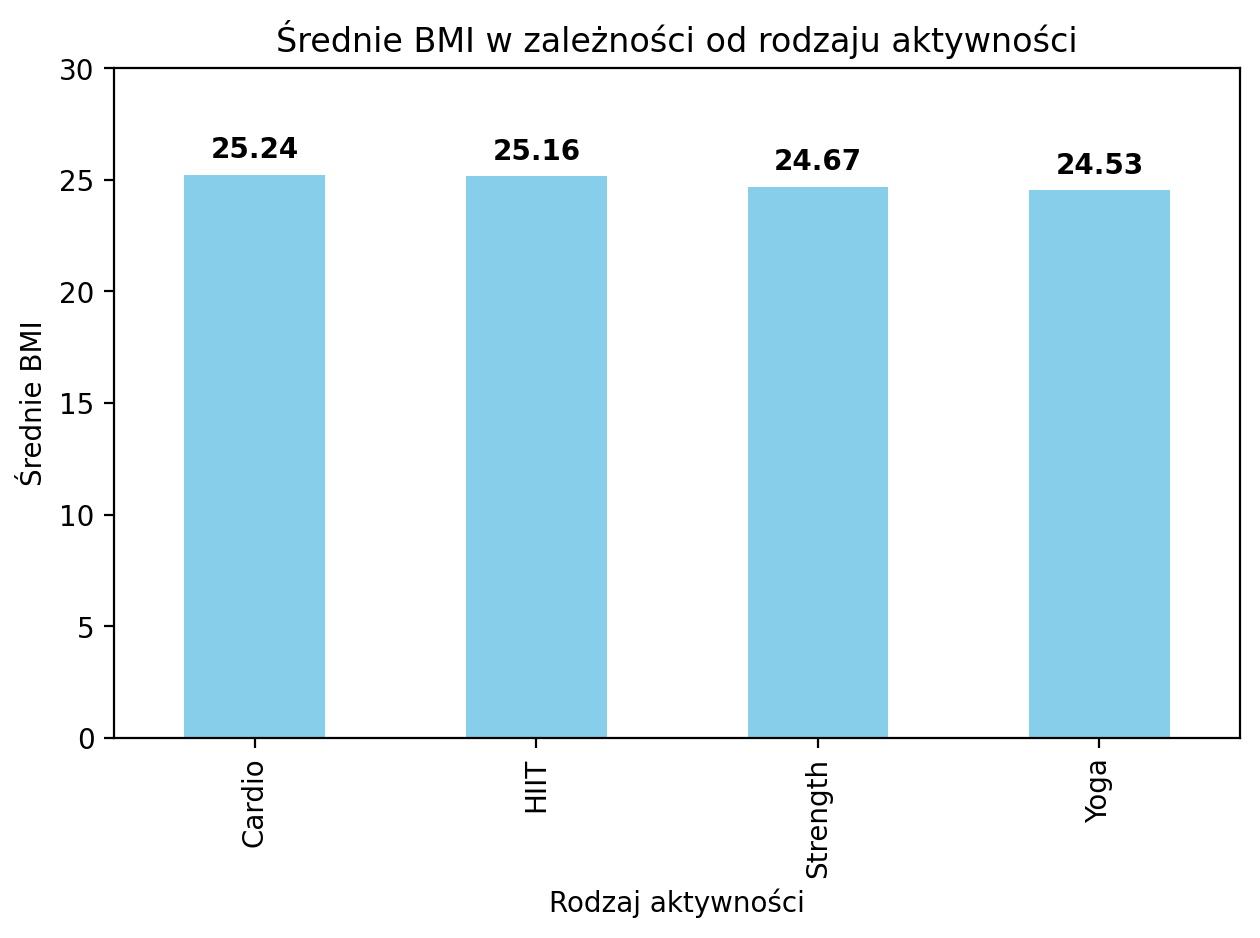

In [72]:
# Zależność między rodzajem aktywności a średnim BMI

bmi_by_activity = df.groupby('Workout_Type')['BMI'].mean().sort_values(ascending=False)
print("Średnie BMI dla każdej aktywności:")
print(bmi_by_activity)
bmi_by_activity.plot(kind='bar', color='skyblue')
plt.title('Średnie BMI w zależności od rodzaju aktywności')
plt.ylabel('Średnie BMI')
plt.xlabel('Rodzaj aktywności')
plt.ylim(0, 30)


# Dodanie wartości liczbowych nad słupkami
for i, v in enumerate(bmi_by_activity):
    plt.text(i, v + 0.5, f"{v:.2f}", ha='center', va='bottom', fontweight='bold')
plt.tight_layout()
plt.show()

Interpreteacja: Nie zaobserwowano istotnych różnic w średnim BMI pomiędzy osobami wybierającymi różne rodzaje aktywności fizycznej. Średnie wartości BMI dla poszczególnych aktywności są bardzo zbliżone.

### 3. Czy średni % tkanki tłuszczowej jest różny dla kobiet i mężczyzn?

In [78]:
# Porównanie mężczyzn i kobiet
group_m = df[df['Gender'] == 'Male']['Fat_Percentage'].dropna()
group_f = df[df['Gender'] == 'Female']['Fat_Percentage'].dropna()

mean_m, mean_f = group_m.mean(), group_f.mean()
se_m = group_m.std(ddof=1) / np.sqrt(len(group_m))
se_f = group_f.std(ddof=1) / np.sqrt(len(group_f))
se_diff = np.sqrt(se_m**2 + se_f**2)

diff = mean_m - mean_f
ci_low = diff - 1.96 * se_diff
ci_high = diff + 1.96 * se_diff

print(f"Średni % tkanki tłuszczowej dla mężczyzn: {mean_m:.2f}")
print(f"Średni % tkanki tłuszczowej dla kobiet: {mean_f :.2f}")
print(f"Różnica średnich: {diff:.2f}")
print(f"95% przedział ufności: ({ci_low:.2f}, {ci_high:.2f})")

Średni % tkanki tłuszczowej dla mężczyzn: 22.56
Średni % tkanki tłuszczowej dla kobiet: 27.66
Różnica średnich: -5.10
95% przedział ufności: (-5.82, -4.38)


Interpretacja: </br>
Różnica średnich % tkanki tłuszczowej wynosi 5.10 punktów procentowych i jest istotna praktycznie. 

### 4. Zależność między płcią a poziomem doświadczenia

Średni poziom doświadczenia według płci:
Gender
Female    1.807359
Male      1.813725
Name: Experience_Level, dtype: float64


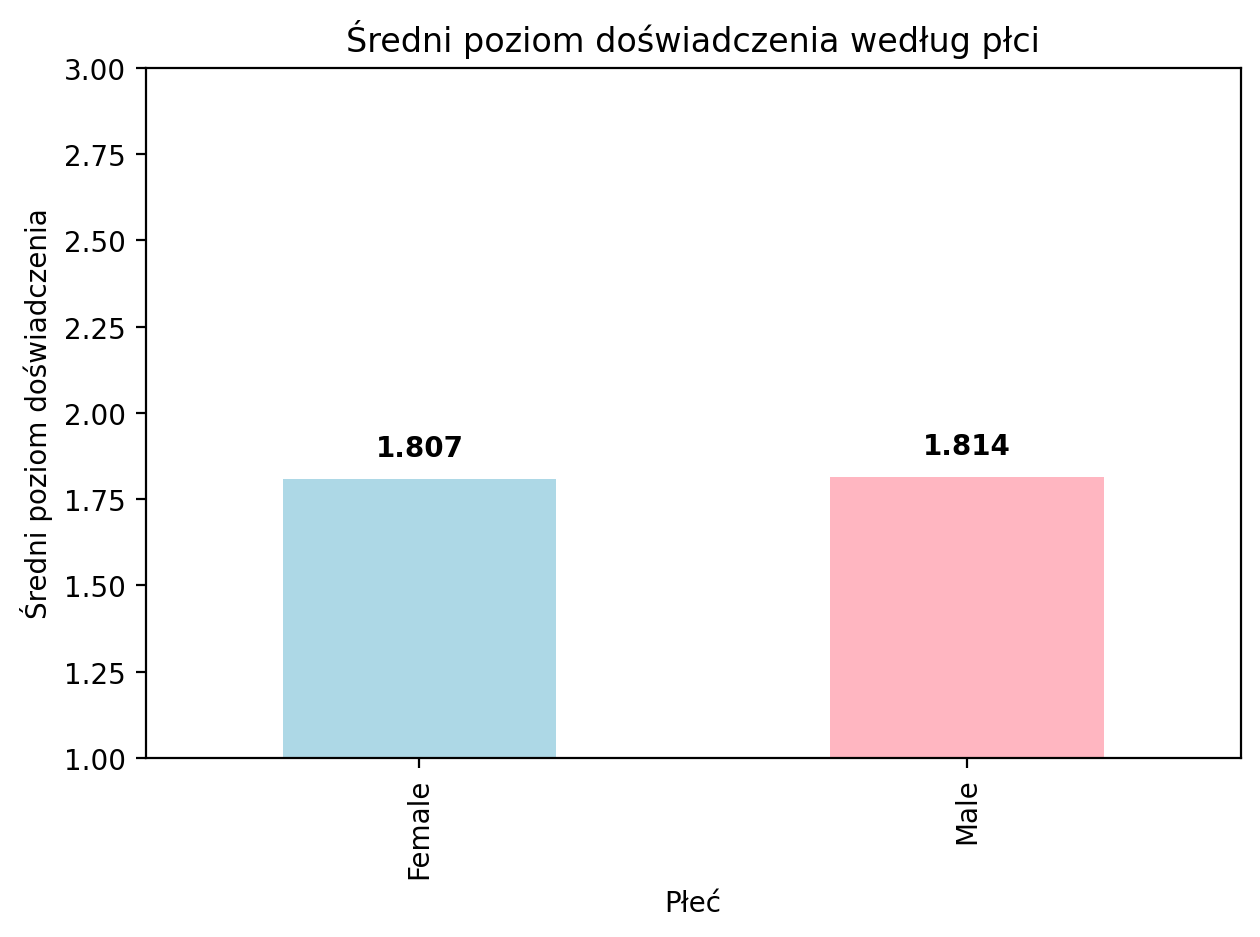

In [79]:
# Zależność między płcią a poziomem doświadczenia

exp_by_gender = df.groupby('Gender')['Experience_Level'].mean()
print("Średni poziom doświadczenia według płci:")
print(exp_by_gender)

ax = exp_by_gender.plot(kind='bar', color=['lightblue', 'lightpink'])
plt.title('Średni poziom doświadczenia według płci')
plt.ylabel('Średni poziom doświadczenia')
plt.xlabel('Płeć')
plt.ylim(1, 3)
plt.tight_layout()

# Dodanie wartości liczbowych nad słupkami
for i, v in enumerate(exp_by_gender):
    plt.text(i, v + 0.05, f"{v:.3f}", ha='center', va='bottom', fontweight='bold')

plt.show()

Interpretacja: Mężczyźni w tym zbiorze mają minimalnie wyższy poziom doświadczenia treningowego od kobiet.

### 5. Czy osoby z wysokim % tkanki tłuszczowej mają niższą aktywność?

Średnia liczba treningów w tygodniu:
High_Fat
False    3.635246
True     3.008264
Name: Workout_Frequency (days/week), dtype: float64


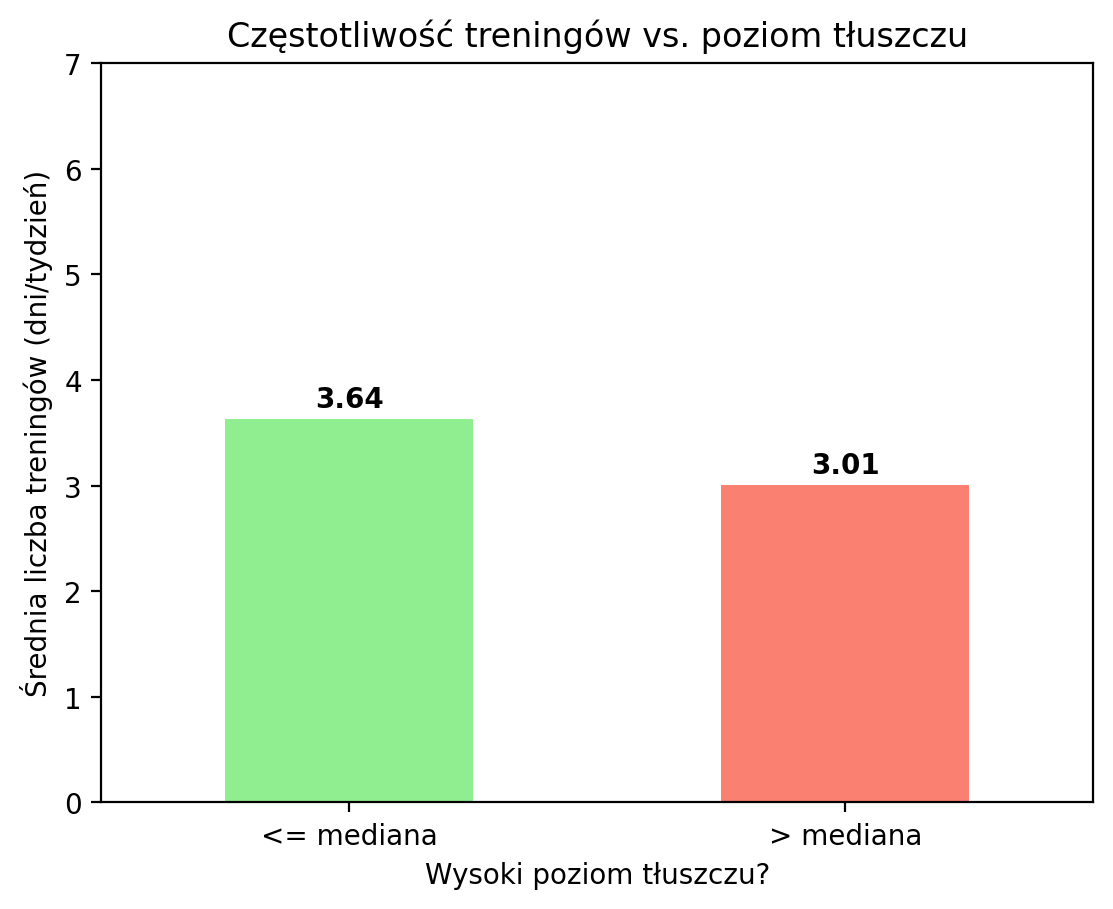

In [80]:
# Czy osoby z wysokim Fat_Percentage mają niższą aktywność?

# Dodajemy kolumnę: True jeśli powyżej mediany, False jeśli poniżej lub równej
df['High_Fat'] = df['Fat_Percentage'] > df['Fat_Percentage'].median()

# Średnia liczba treningów w tygodniu dla obu grup
mean_freq = df.groupby('High_Fat')['Workout_Frequency (days/week)'].mean()
print("Średnia liczba treningów w tygodniu:")
print(mean_freq)

# Wykres
ax = mean_freq.plot(kind='bar', color=['lightgreen', 'salmon'])
plt.title('Częstotliwość treningów vs. poziom tłuszczu')
plt.ylabel('Średnia liczba treningów (dni/tydzień)')
plt.xlabel('Wysoki poziom tłuszczu?')
plt.xticks([0, 1], ['<= mediana', '> mediana'], rotation=0)
plt.ylim(0, 7)
for i, v in enumerate(mean_freq):
    plt.text(i, v + 0.05, f"{v:.2f}", ha='center', va='bottom', fontweight='bold')


Interpretacja: Osoby z wyższym poziomem tłuszczu trenują rzadziej niż pozostałe osoby.

### 5. Czy wiek, poziom doświadczenia i częstotliwość treningów mają wpływ na spalanie kalorii?

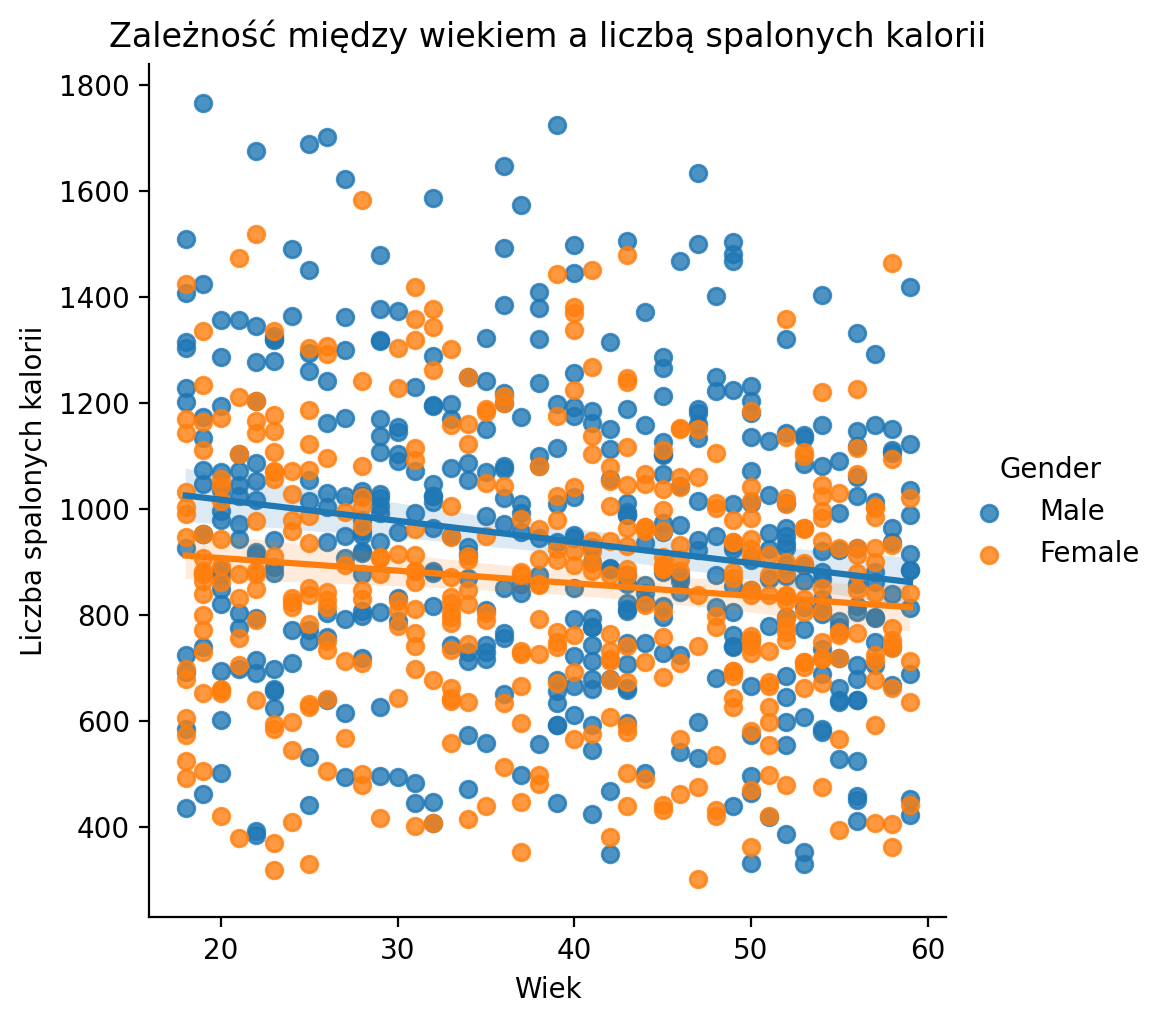

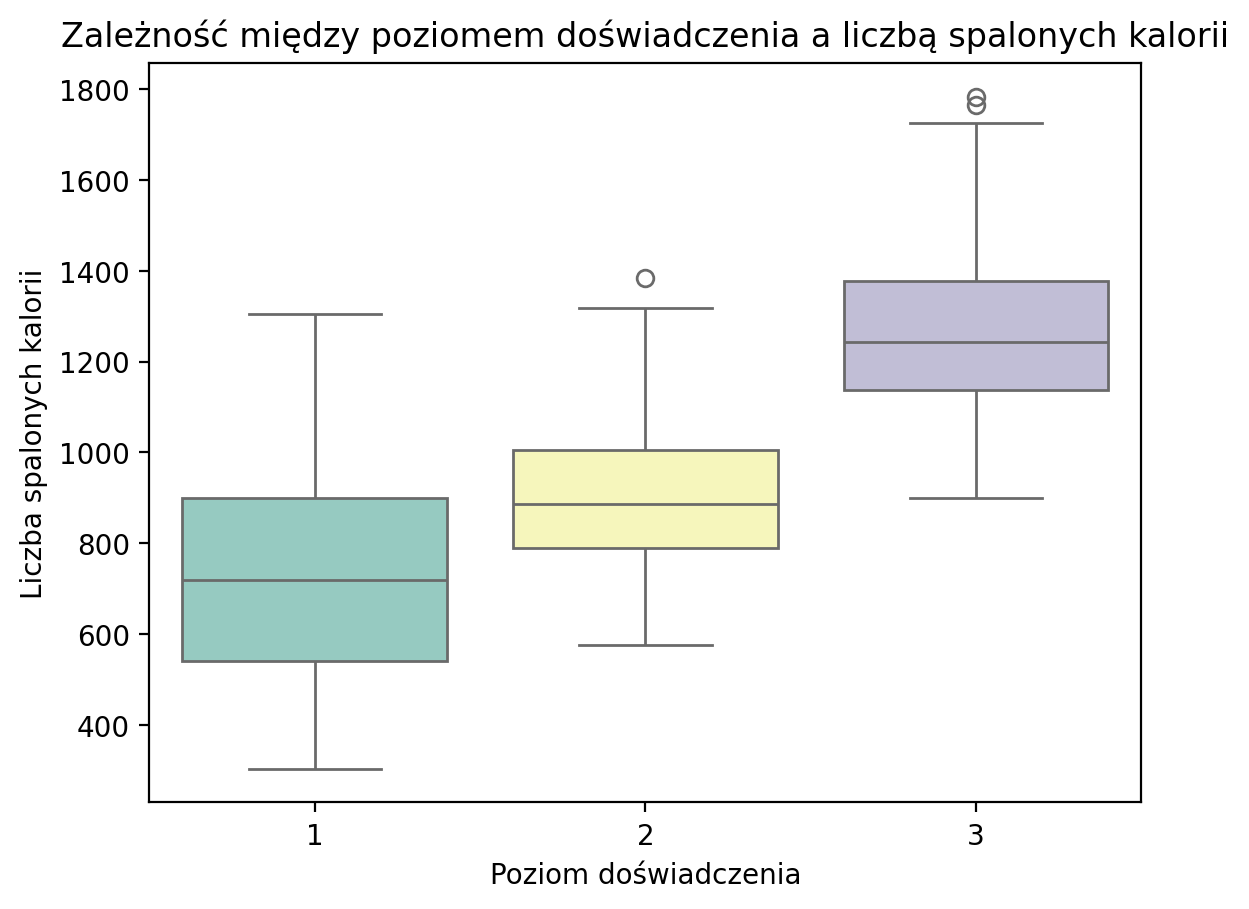

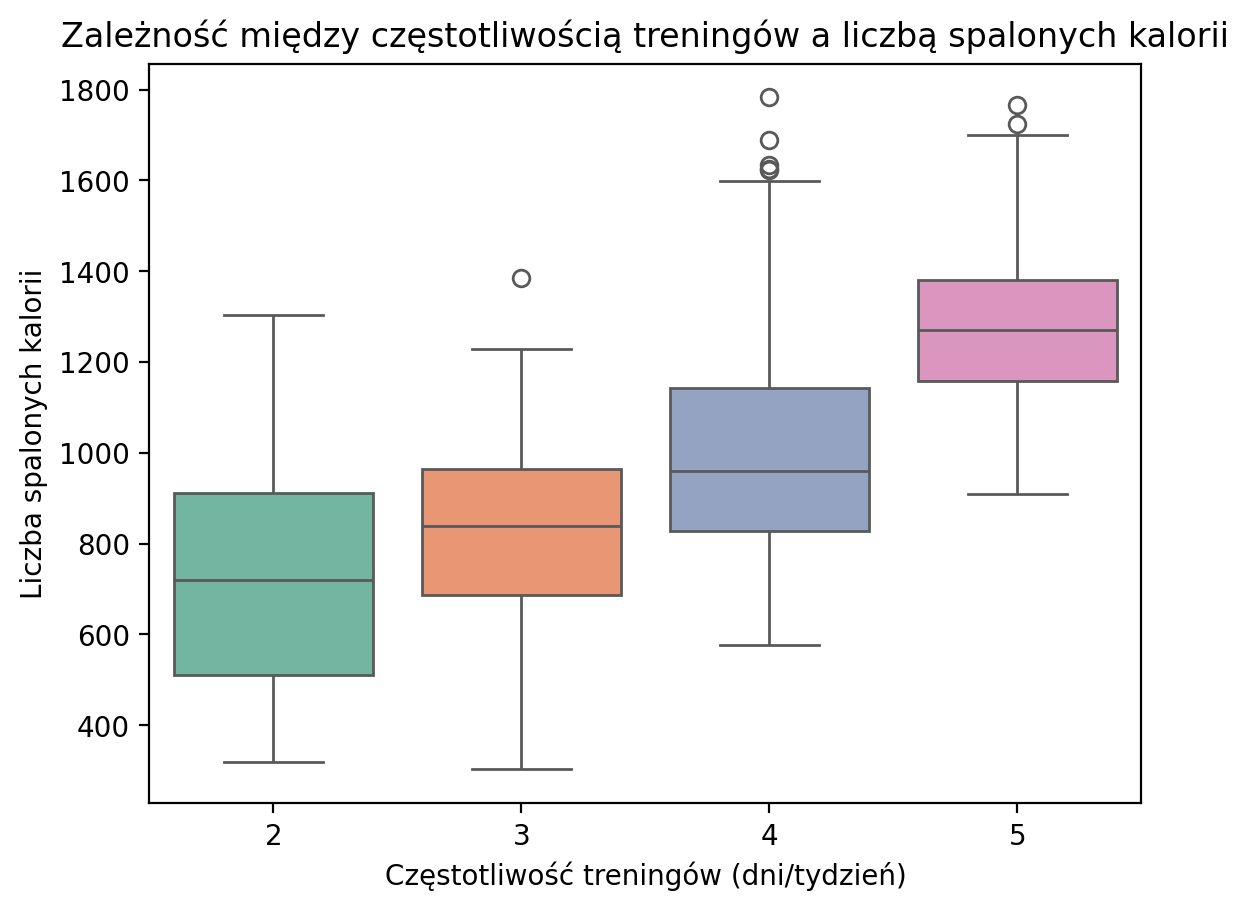

In [103]:
# Czy wiek, poziom doświadczenia i częstotliwość treningów mają wpływ na spalanie kalorii?

import seaborn as sns
import matplotlib.pyplot as plt

# Wiek vs. Calories_Burned
sns.lmplot(data=df, x='Age', y='Calories_Burned', hue='Gender')
plt.title('Zależność między wiekiem a liczbą spalonych kalorii')
plt.xlabel('Wiek')
plt.ylabel('Liczba spalonych kalorii')
plt.show()

# Poziom doświadczenia vs. Calories_Burned
sns.boxplot(data=df, x='Experience_Level', y='Calories_Burned', hue='Experience_Level', palette='Set3', legend=False)
plt.title('Zależność między poziomem doświadczenia a liczbą spalonych kalorii')
plt.xlabel('Poziom doświadczenia')
plt.ylabel('Liczba spalonych kalorii')
plt.show()

# Częstotliwość treningów vs. Calories_Burned
sns.boxplot(data=df, x='Workout_Frequency (days/week)', y='Calories_Burned', hue='Workout_Frequency (days/week)', palette='Set2', legend=False)
plt.title('Zależność między częstotliwością treningów a liczbą spalonych kalorii')
plt.xlabel('Częstotliwość treningów (dni/tydzień)')
plt.ylabel('Liczba spalonych kalorii')
plt.show()

Interpretacja: </br>Statystycznie mężczyzni spalają wiecej kalorii podczas treningu. </br>
Osoby doświadczone spalają wiecej kalorii. </br>
Osoby trenujące częściej spalaja wiecej kalorii. </br>

__Korelacja danych liczbowych__

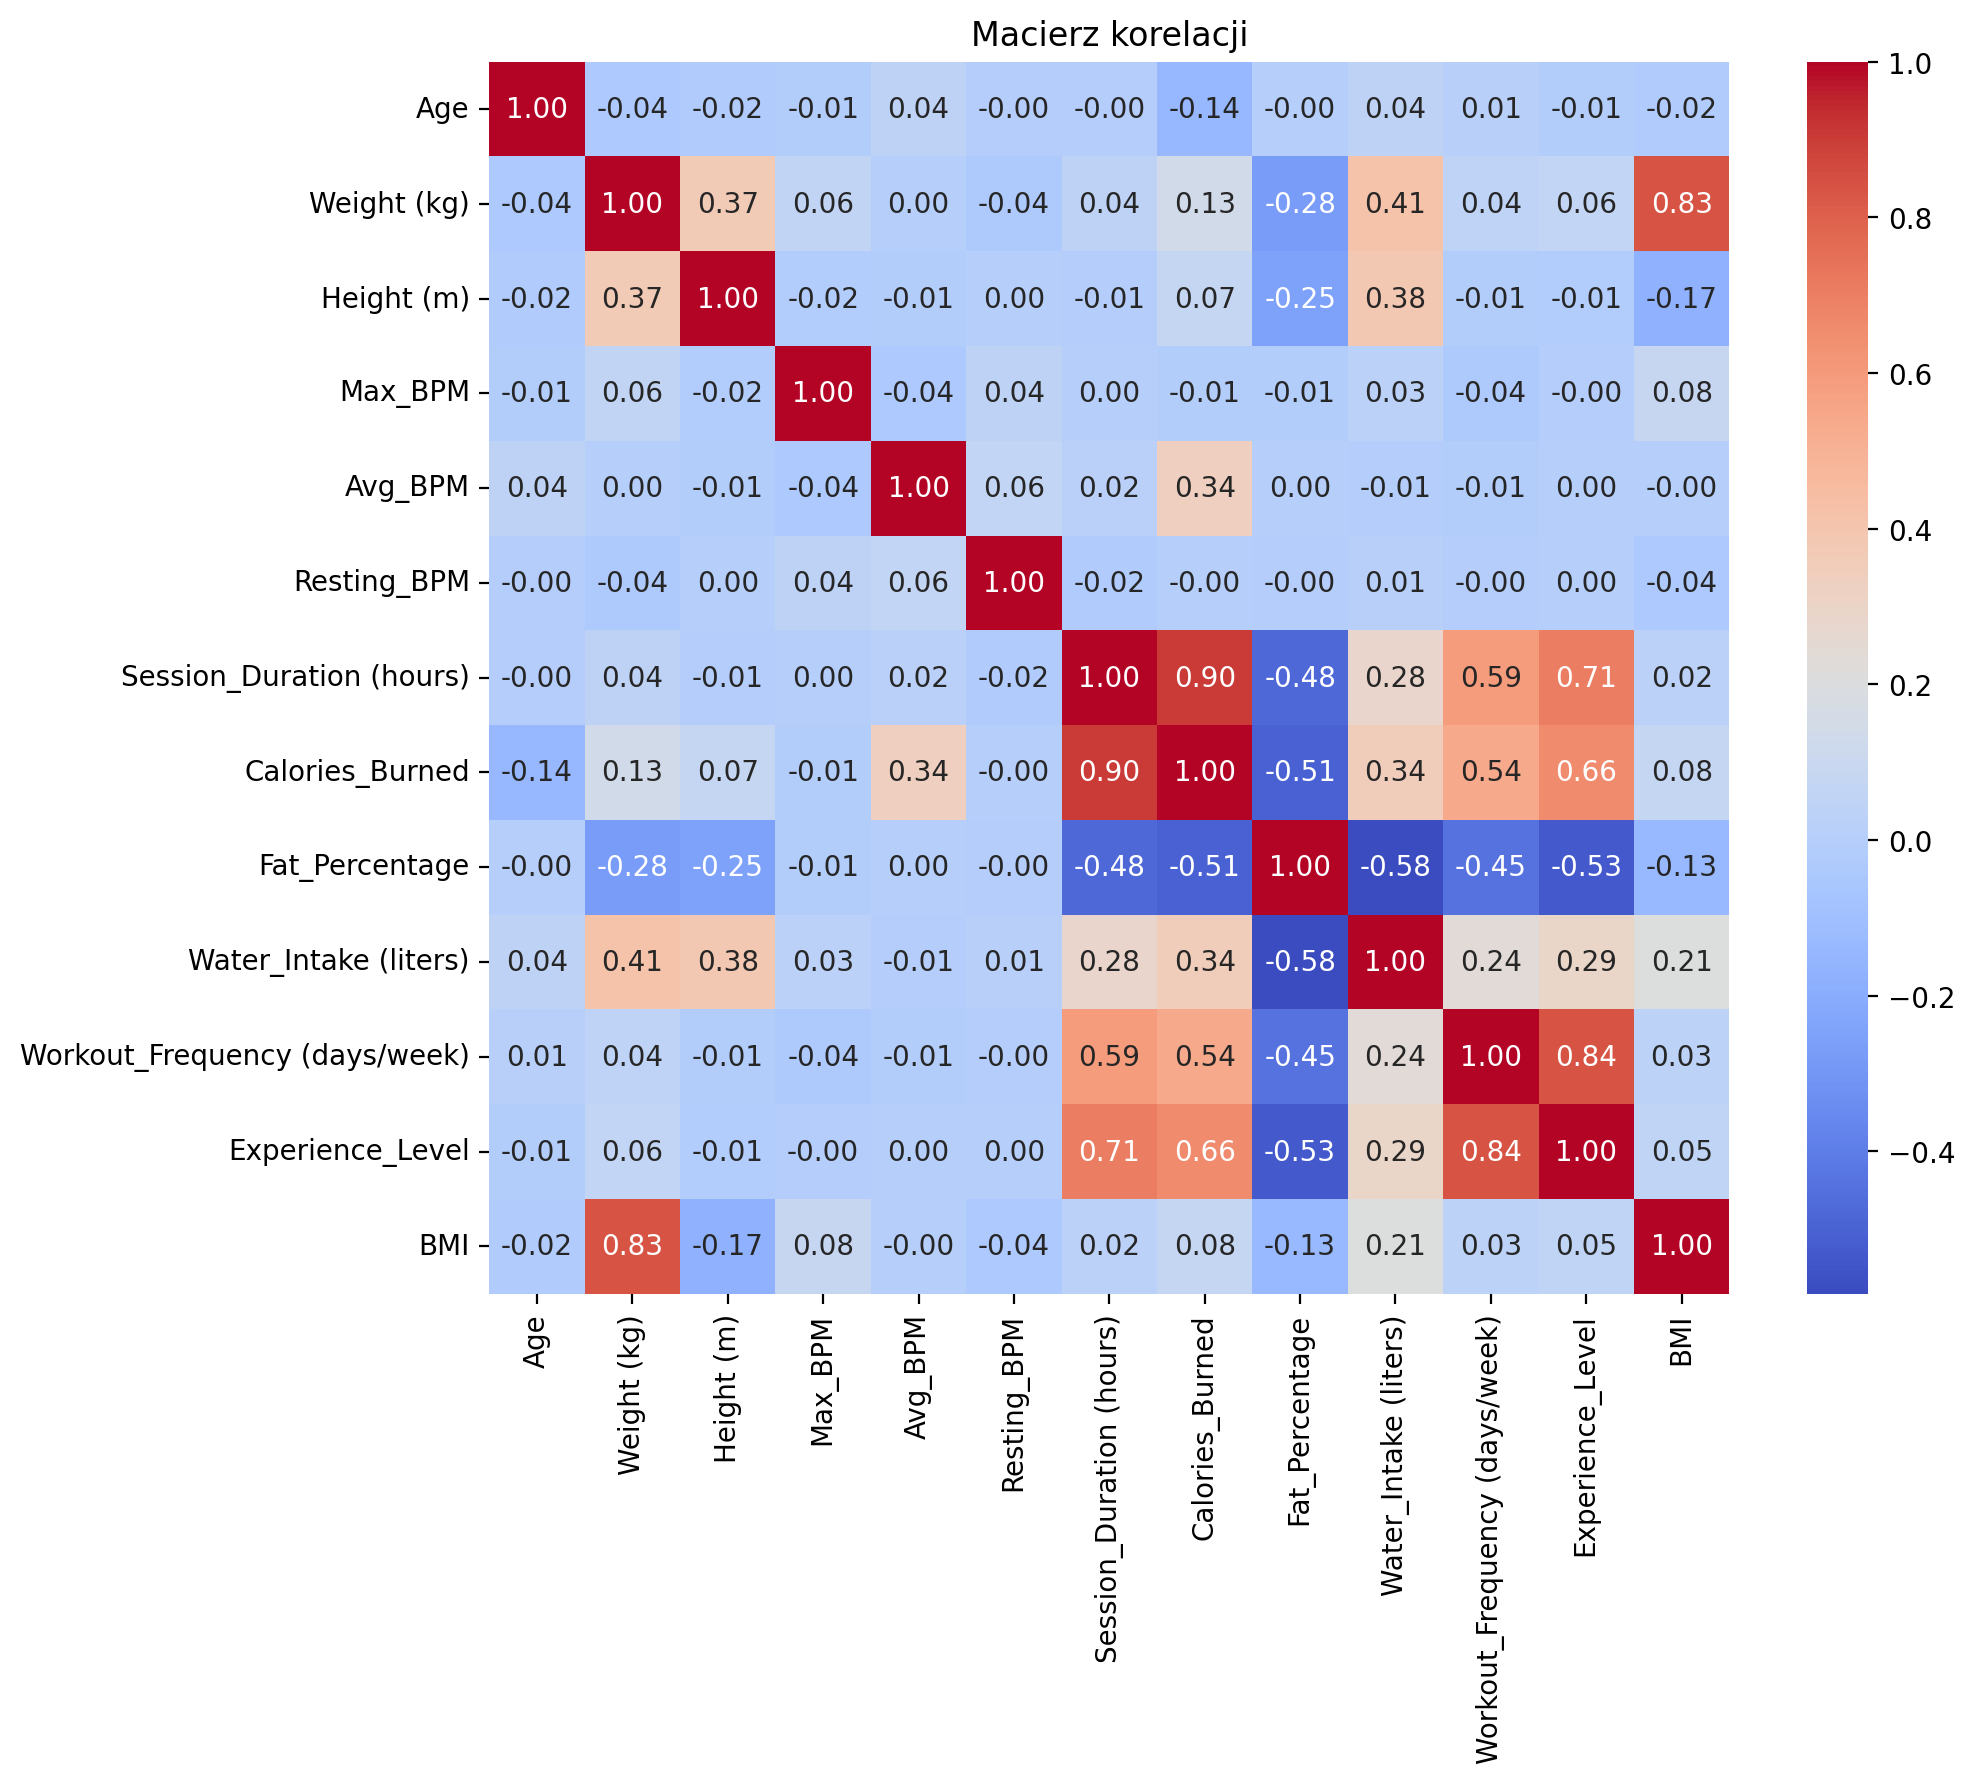

In [104]:
df_temp = df.select_dtypes(include = ['number'])
corr_matrix = df_temp.corr('spearman')
#print(corr_matrix)

# import seaborn as sns
# import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Macierz korelacji')
plt.show()



Interpretacja: Najsliniejsze korelacje wystepują między Wagą a BMI, Spalonymi Kaloriami a dlugością treningu, częstotliwością treningów a doświadczeniem.

# 5. Wnioskowanie statystyczne
*Odnoszące się do pytań badawczych testy statystyczne (w tabeli lub na wizualizacjach) odpowiednie do załozeń, danych.*

### 1. Cele ninijszego rozdziału: 
1. Czy zaobserwowane różnice między grupami są przypadkowe, czy można je uogólnić na całą populację?

# 6. Wnioski
*Wyciągnięcie wniosków na temat zbioru danych i postawionych pytań.*

__Różnice między płciami__ </br>
W takich zmiennych jak poziom doświadczenia czy procent tkanki tłuszczowej okazały się niewielkie (np. średni poziom doświadczenia kobiety: 1.807359, mężczyźni: 1.813725), a testy statystyczne potwierdziły, że te różnice nie są istotne statystycznie. 

__Wystąpiły pewne zależności między zmiennymi ilościowymi:__ </br>

-Częstotliwość treningów (Workout_Frequency) a procent tkanki tłuszczowej (Fat_Percentage):
Zazwyczaj obserwuje się ujemną korelację — im częstsze treningi, tym niższy procent tkanki tłuszczowej.
współczynnik korelacji Pearsona r ≈ -0.45 (umiarkowana korelacja ujemna), co wskazuje, że regularne ćwiczenia są powiązane z niższym poziomem tłuszczu.

-Poziom nawodnienia (Water_Intake) a procent tkanki tłuszczowej:
Może występować umiarkowana ujemna korelacja (np. r ≈ -0.58), sugerująca, że osoby bardziej nawodnione mają nieco niższy poziom tłuszczu, choć związek jest dość słaby i wymaga dalszej analizy.

-Poziom doświadczenia (Experience_Level) a częstotliwość treningów (Workout_Frequency):
Można zaobserwować dodatnią korelację (np. r ≈ 0.84), co sugeruje, że osoby bardziej doświadczone trenują częściej.

__Analiza zmiennych kategorialnych__</br>
 (np. płci i poziomu doświadczenia) za pomocą testu chi-kwadrat nie wykazała silnych zależności między tymi kategoriami, co wskazuje na względną niezależność tych cech w badanej grupie.




### Ograniczenia 

Wykorzystane testy statystyczne, zakładają m.in. normalność rozkładu i homogeniczność wariancji, które nie zawsze były w pełni spełnione, co może wpłynąć na wiarygodność wniosków.

Korelacja Pearsona wymaga liniowego związku między zmiennymi, a dane w niektórych przypadkach wykazały nieliniowość lub obecność wartości odstających, co może zaburzać interpretację.

Dane kategorialne, takie jak płeć, wymagały specjalnego traktowania, gdyż nie mogą być bezpośrednio uwzględniane w korelacjach numerycznych.

## Propozycje dalszej pracy i modelowania

-Modelowanie predykcyjne: Można rozważyć budowę modeli regresyjnych (np. regresja liniowa, regresja logistyczna) do przewidywania procentu tkanki tłuszczowej lub poziomu doświadczenia na podstawie innych cech (np. płci, nawyków treningowych, nawodnienia).

-Analiza nieliniowych zależności: Zastosowanie metod nieliniowych, takich jak modele drzew decyzyjnych lub sieci neuronowe, które mogą lepiej uchwycić złożone wzorce w danych.

-Segmentacja użytkowników siłowni: Grupowanie (clustering) uczestników na podstawie ich cech w celu identyfikacji profili użytkowników i dostosowania programów treningowych.

-Rozszerzenie zbioru danych o dodatkowe zmienne (np. dieta, stan zdrowia) mogłoby zwiększyć trafność i wartość analizy.

-Walidacja założeń statystycznych: W przyszłości warto przeprowadzić testy normalności (np. Shapiro-Wilka) oraz testy homogeniczności wariancji, aby dobrać jeszcze lepiej odpowiednie metody statystyczne.